Assignment 1:

Question 1:
A.    The data has 120 classes (120 dog breeds) ,10222 train sample images and 10357 test sample images

B.     Each data sample image we insert needs to be 224x224 image with 3 RGB channels.so we need to preprocess the data before using it by resizing the images to the wanted size.

C.    Partly balanced, the number of samples per class varied from 60 to 130.
D.    No


Question 2:

A.    VGG19, without the weights of image-net, we used randomized weights instead due to inability to import it to the jupyter notenook (we tried to look for a solution but the results with the imported image-net database made the results worse)

C.    
- simply resizing the image at preprocessing might negatively impact the accuracy. Padding the images might improve the results.
- freezing the weights of the first 10 layers so that they remain intact throughout the fine-tuning process.
-  Applying the stochastic gradient descent optimizer to minimize the cross entropy loss .
D.    We chose to try to modify the model to get better results


Question 3:

D.    The classic ML algorithm we chose is SVM.    
    

Question 4:

The dataset we chose to work with is the Dog Breed Identification datasets. The dataset includes 120 dog breeds and about 20000 samples. The dataset is partly balanced as the range of samples per breed is 60-120. Each sample had to be resized in order to fit for processing.

The model we chose was VGG19 with changing the last layer of the network to dense and flatten correspond to the task at hand The model has trained and achieved the loss of 4.8%. We wanted to improve this by 3 methods and decided to implement 2. 
We Chose to run the models for 50 epochs for each model.

First, we froze the weights of the 10 first layers of the network. This change yielded a improvement to 4.7% loss.  The other method was to apply the stochastic gradient descent optimizer, this change yielded a improvement to 4.7% loss too. 
The improvents are minor for 50 epochs but if we run each model for more time the improvements will yield better results.

To see how the model compares with different approaches, we use the predictions of the last lair as features with the SVM machine learning algorithm. 
* NOTE: The performance of each module is heavily impacted by our hardware constraints.




In [1]:
import numpy as np
import pandas as pd 
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from random import randint
import matplotlib.pyplot as plt
import cv2
import PIL

import os
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('../input/labels.csv')
df_test = pd.read_csv('../input/sample_submission.csv')

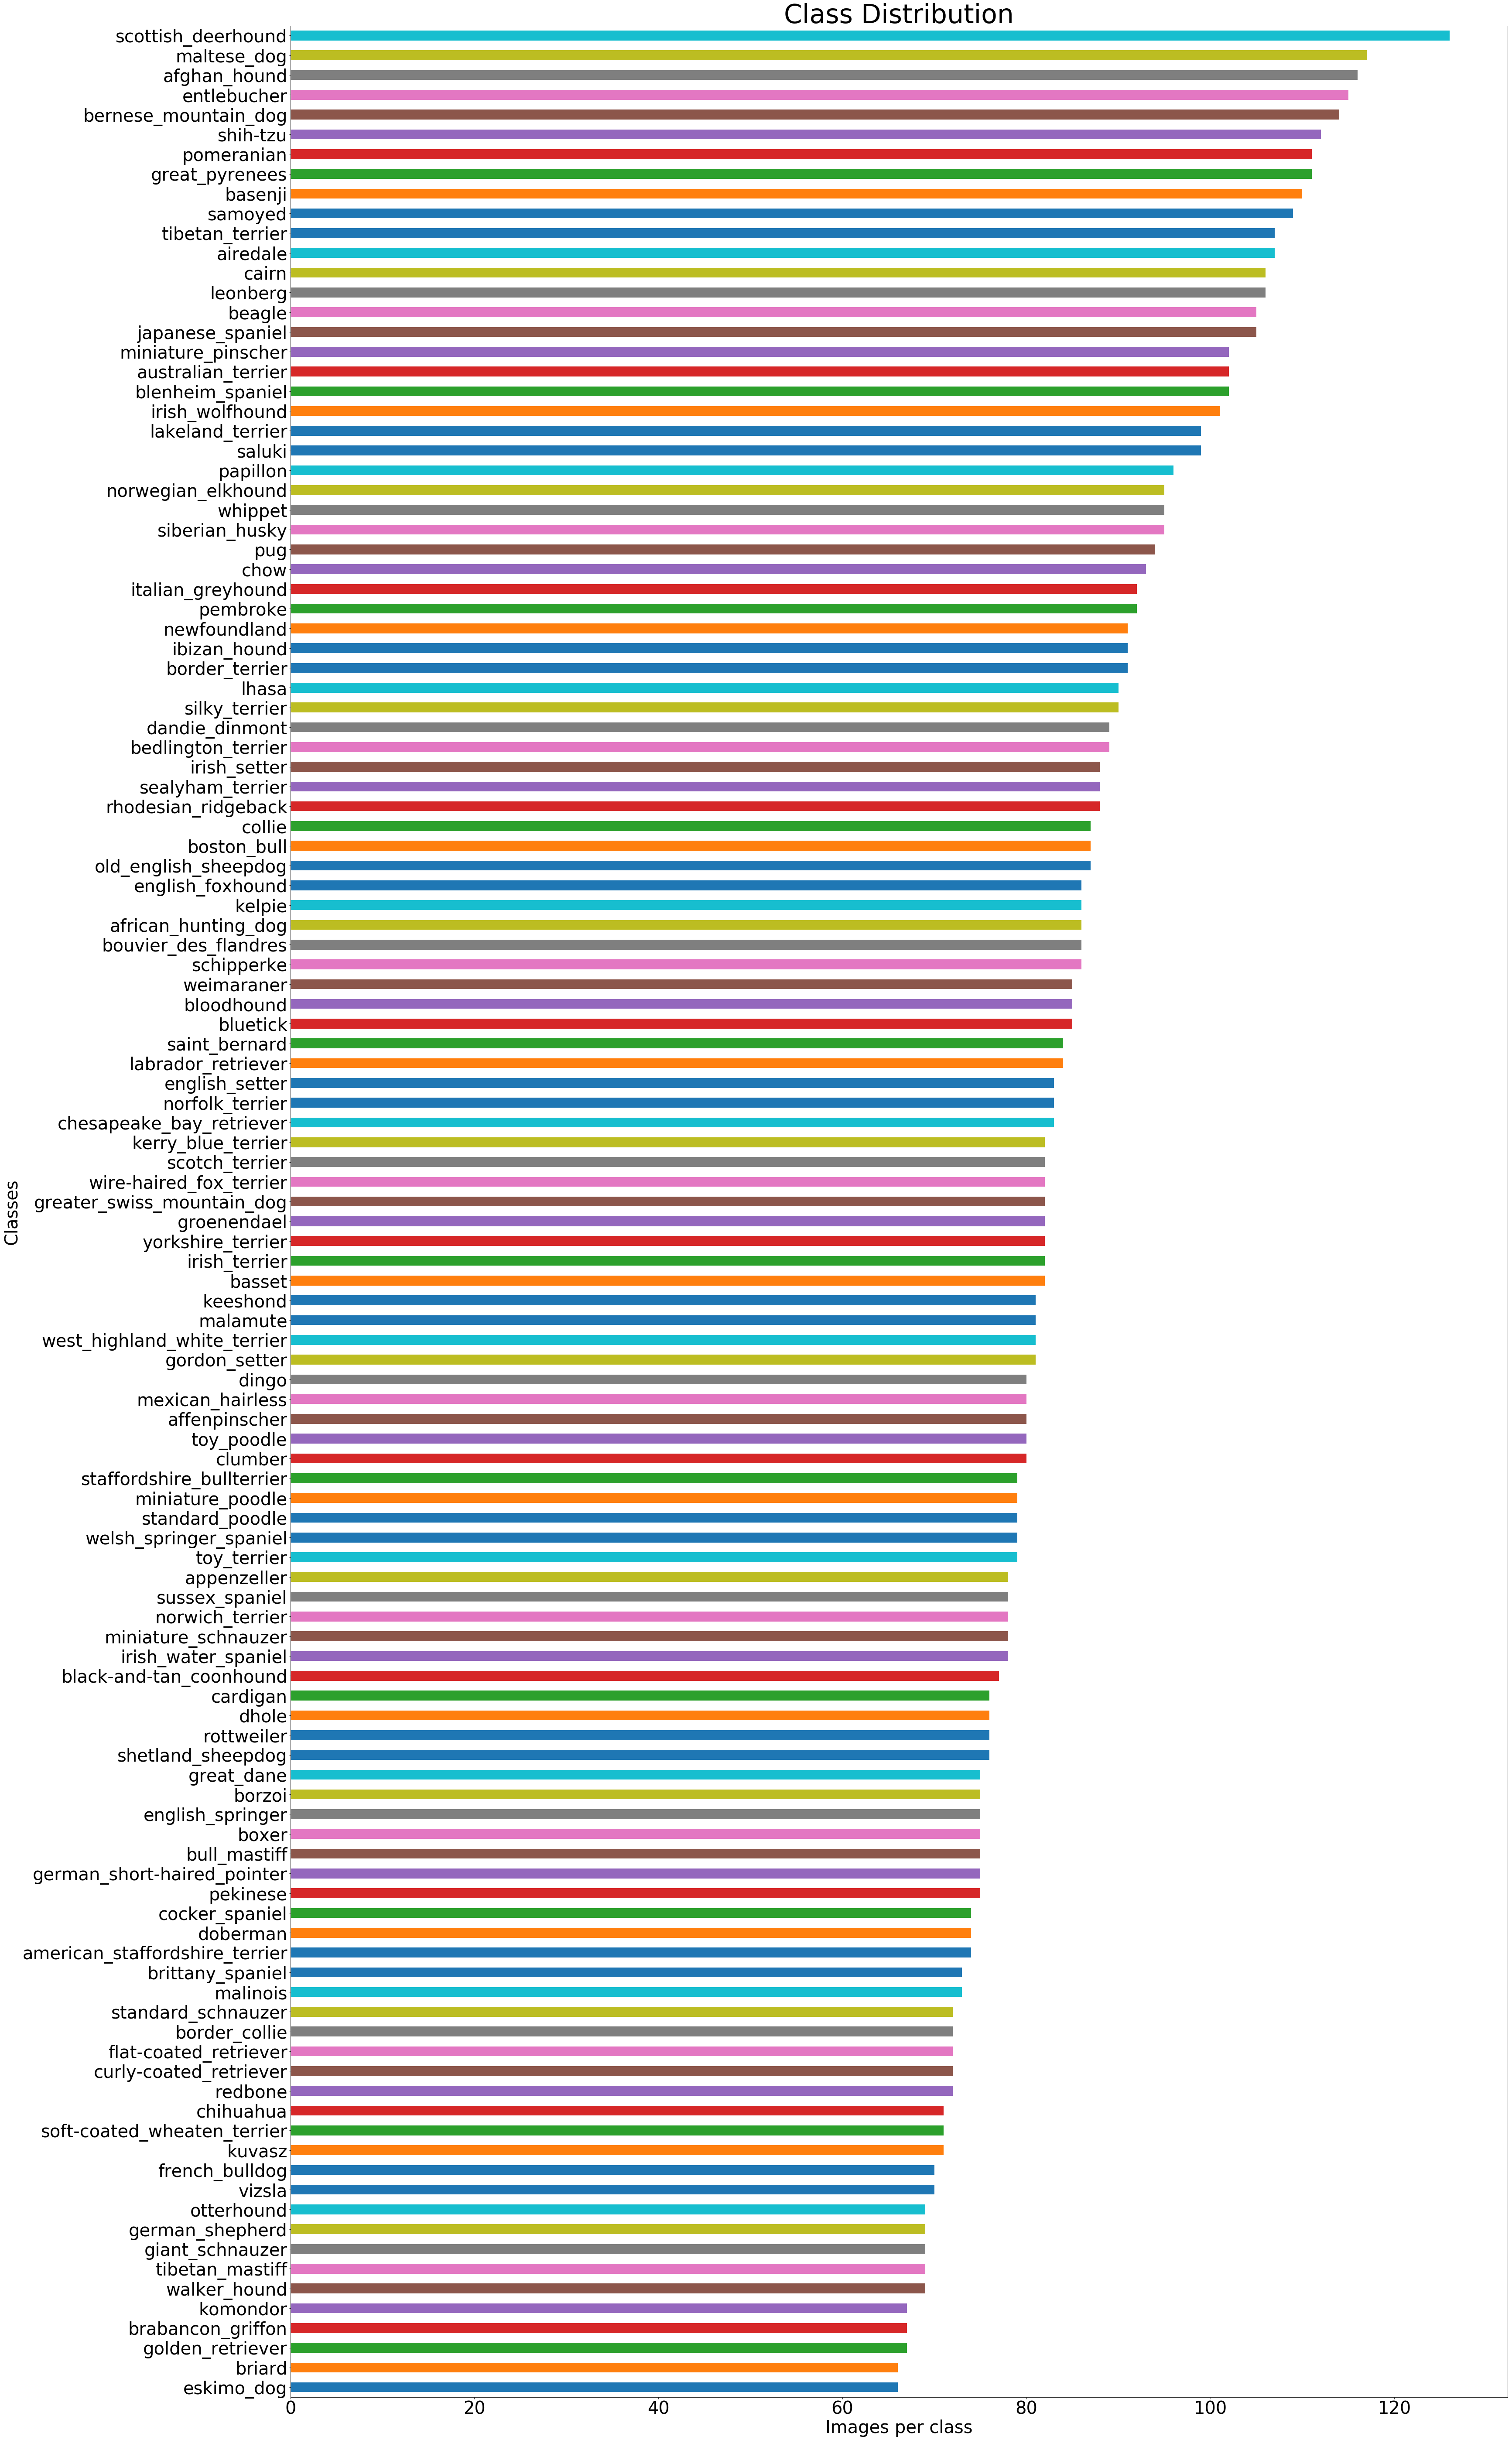

In [3]:
ax=pd.value_counts(df_train['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)

In [4]:
targets_series = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [5]:
one_hot_labels = np.asarray(one_hot)

In [6]:
def read_and_resize_images(df,nrow=224,ncol=224,channels=3):
    i = 0
    x = []
    y = []
    breeds = []
    for f, breed in tqdm(df.values):
        img = PIL.Image.open(os.path.join('../input/train/' + f +'.jpg'))
        label = one_hot_labels[i]
        x.append(img.resize((nrow,ncol)))
        y.append(label)
        breeds.append(breed)
        i += 1
    return x,y,breeds

In [7]:
x_train,y_train,breeds_train = read_and_resize_images(df_train)

100%|██████████| 10222/10222 [00:40<00:00, 253.52it/s]


In [8]:
def read_and_resize_images_test(df,nrow=224,ncol=224,channels=3):
    x = []
    for f in tqdm(df['id'].values):
        img = PIL.Image.open(os.path.join('../input/test/' + f +'.jpg'))
        x.append(img.resize((nrow,ncol)))
    return x

In [9]:
x_test = read_and_resize_images_test(df_test)

100%|██████████| 10357/10357 [00:48<00:00, 212.49it/s]


In [10]:
#y_train_raw = np.array(y_train, dtype=np.uint8)
#x_train_raw = np.array(x_train, dtype=np.float32) / 255.
#x_test  = np.array(x_test, dtype=np.float32) / 255.
x_train_raw = []
x_test_raw = []
y_train_raw = np.asarray(y_train) 
for img in x_train:
    x_train_raw.append(np.array(img))
for img in x_test:
    x_test_raw.append(np.array(img))
    
x_train_raw = np.array(x_train_raw)
x_test_raw = np.array(x_test_raw)

In [11]:
print(x_train_raw.shape)
print(y_train_raw.shape)
print(x_test_raw.shape)

(10222, 224, 224, 3)
(10222, 120)
(10357, 224, 224, 3)


In [12]:
def plot_images(images, classes):
    assert len(images) == len(classes) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3,figsize=(60,60),sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
   
    for i, ax in enumerate(axes.flat):
        # Plot image.
        
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR).reshape(224,224,3), cmap='hsv')    
        xlabel = "Breed: {0}".format(classes[i])
    
        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_size(60)
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    
    plt.show()

Images to show: 9
Classes to show: 9


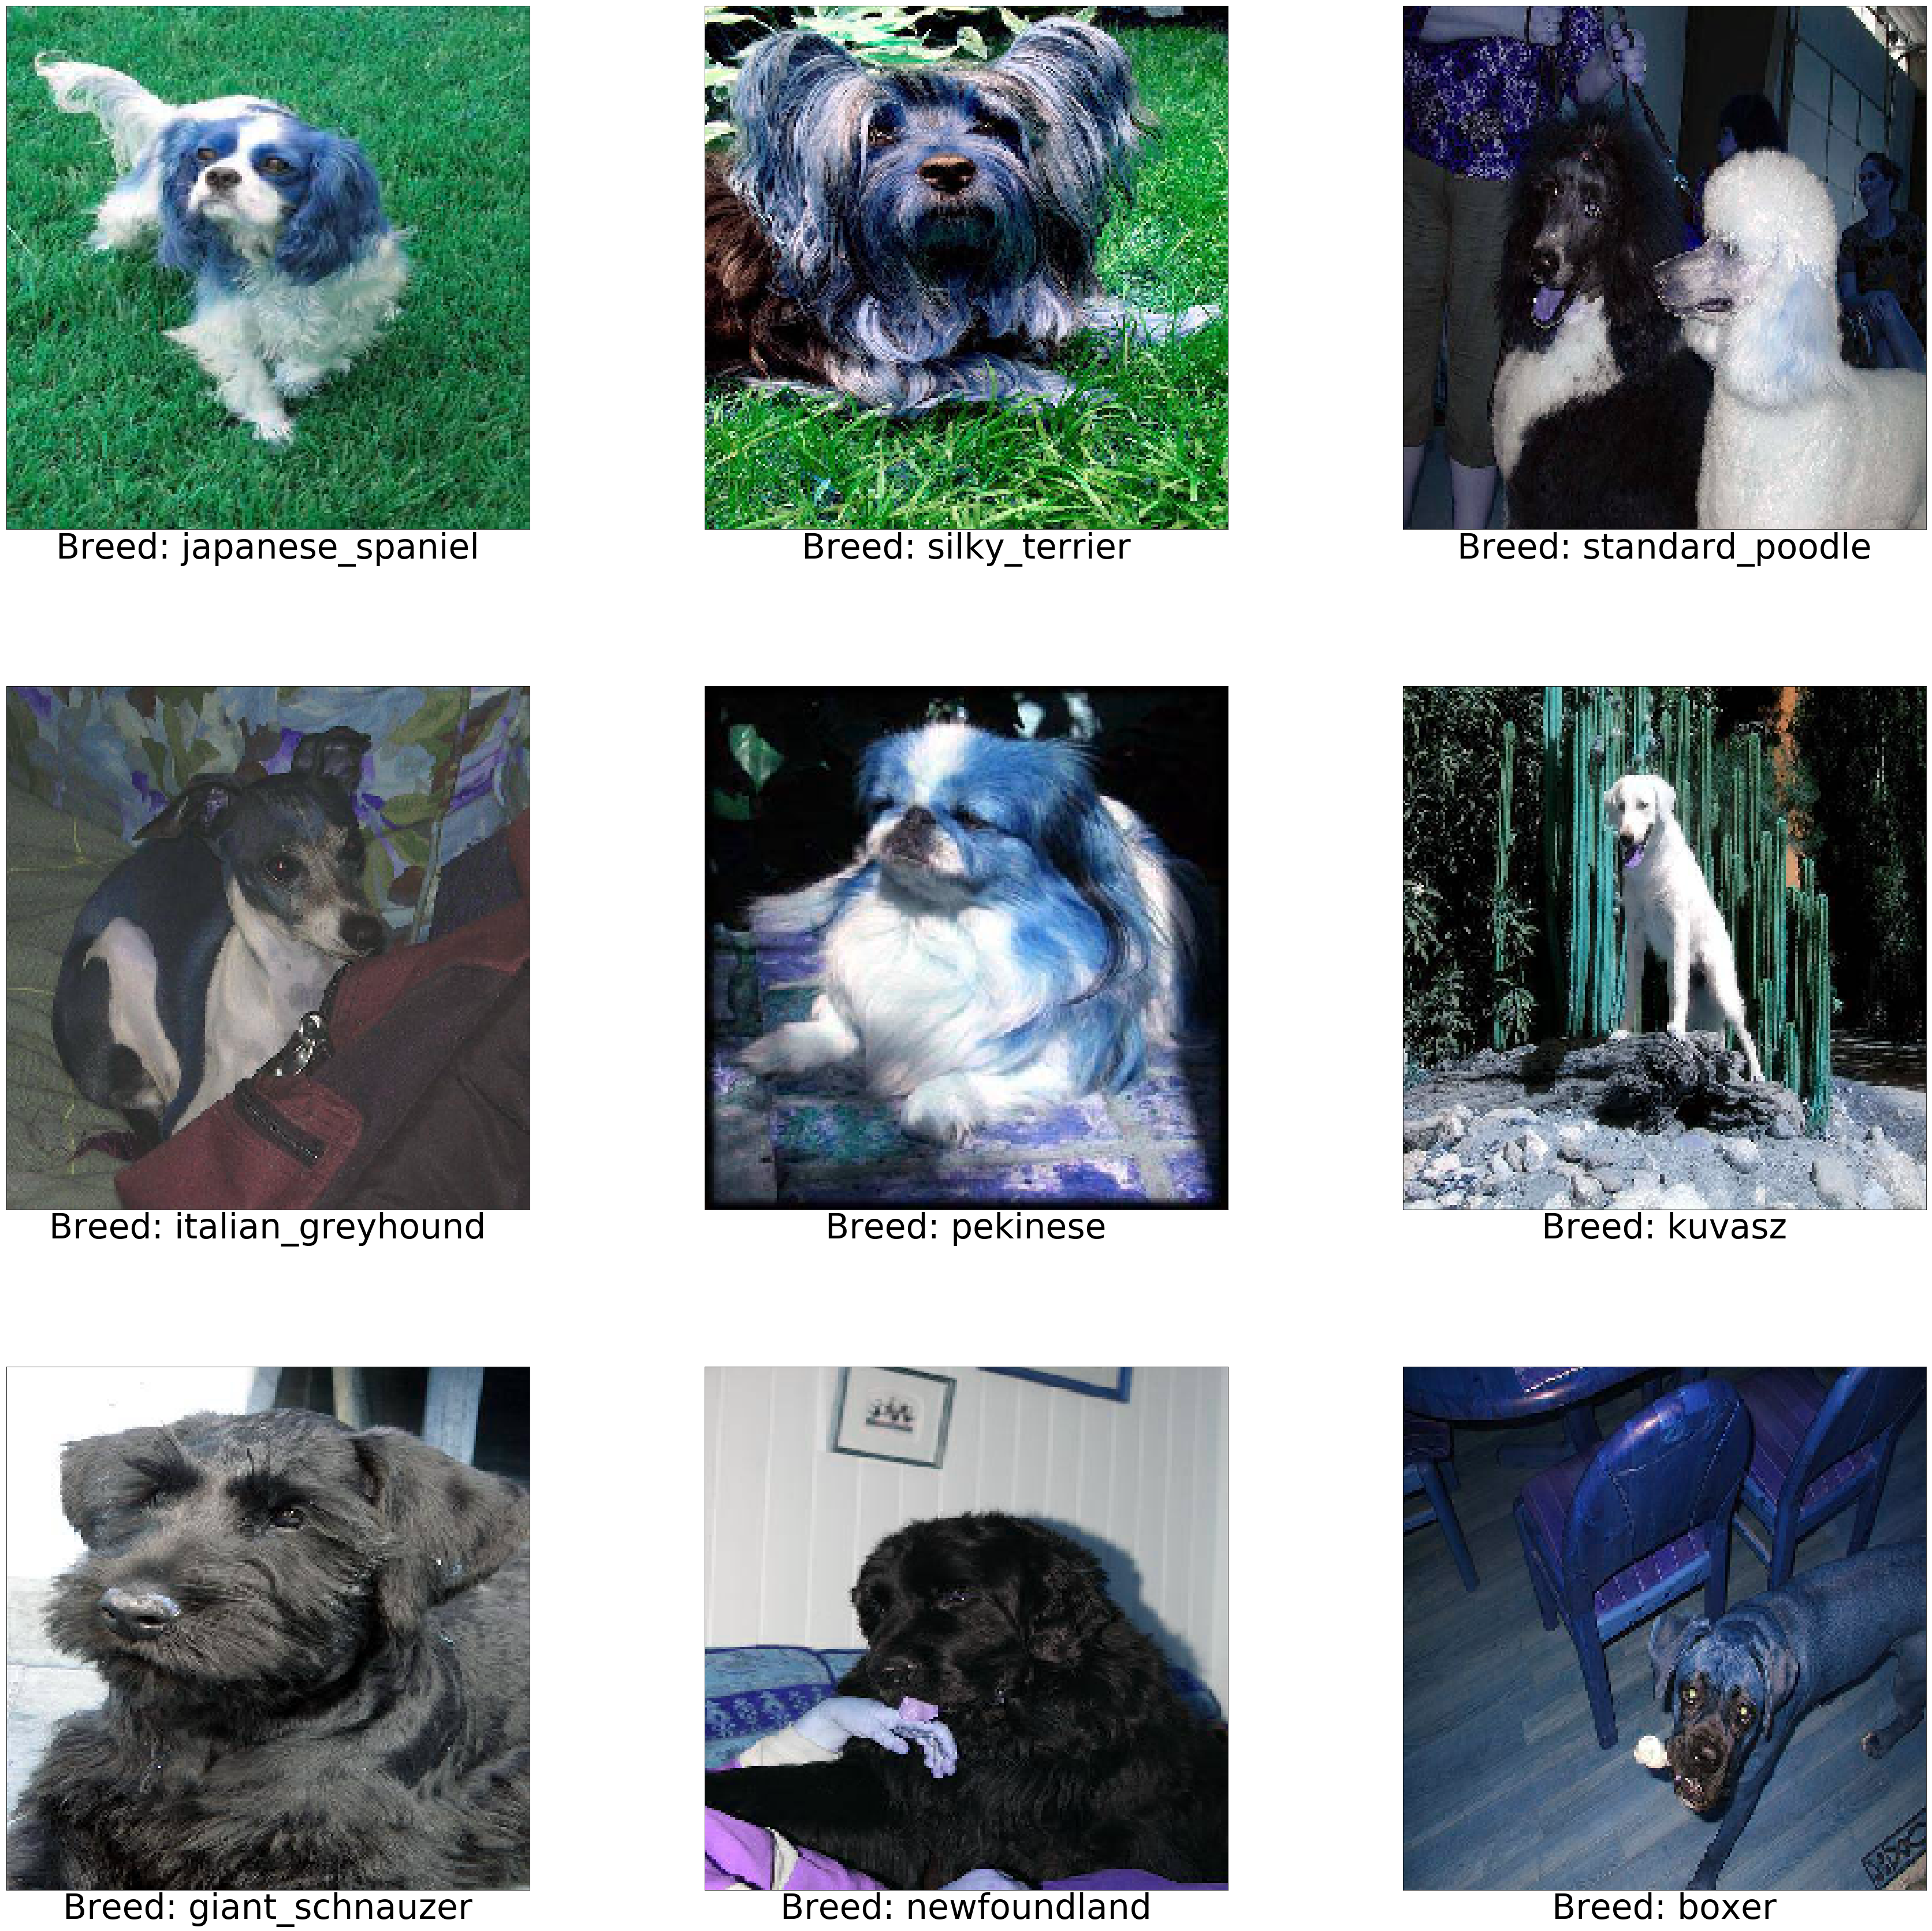

In [13]:

random_numbers = [randint(0, len(x_train)) for p in range(0,9)]
x_train_to_show = [x_train_raw[i] for i in random_numbers]
breeds_train_to_show = [breeds_train[i] for i in random_numbers]
print("Images to show: {0}".format(len(x_train_to_show)))
print("Classes to show: {0}".format(len(breeds_train_to_show)))

plot_images(x_train_to_show, breeds_train_to_show)

In [14]:
num_class = y_train_raw[1]


In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

In [17]:
def prepareModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [18]:
firstModel = prepareModel(120)
firstModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
firstModel.fit(X_train, Y_train, epochs=70, validation_data=(X_valid, Y_valid), verbose=1)

Train on 7155 samples, validate on 3067 samples
Epoch 1/70


6656/7155 [==========================>...] - ETA: 1:21:19 - loss: 4.8282 - acc: 0.0000e+ - ETA: 40:58 - loss: 5.2907 - acc: 0.0000e+00 - ETA: 27:30 - loss: 5.7083 - acc: 0.0000e+ - ETA: 20:47 - loss: 5.8823 - acc: 0.0078   - ETA: 16:44 - loss: 6.1220 - acc: 0.00 - ETA: 14:01 - loss: 6.3299 - acc: 0.00 - ETA: 12:03 - loss: 6.3539 - acc: 0.00 - ETA: 10:34 - loss: 6.3291 - acc: 0.01 - ETA: 9:27 - loss: 6.2898 - acc: 0.0104 - ETA: 8:31 - loss: 6.3640 - acc: 0.009 - ETA: 7:46 - loss: 6.3823 - acc: 0.008 - ETA: 7:09 - loss: 6.3934 - acc: 0.007 - ETA: 6:37 - loss: 6.3685 - acc: 0.007 - ETA: 6:09 - loss: 6.3324 - acc: 0.006 - ETA: 5:46 - loss: 6.3551 - acc: 0.008 - ETA: 5:25 - loss: 6.3770 - acc: 0.007 - ETA: 5:06 - loss: 6.4021 - acc: 0.007 - ETA: 4:50 - loss: 6.3891 - acc: 0.008 - ETA: 4:35 - loss: 6.3520 - acc: 0.008 - ETA: 4:22 - loss: 6.3395 - acc: 0.007 - ETA: 4:10 - loss: 6.3282 - acc: 0.007 - ETA: 3:59 - loss: 6.3576 - acc: 0.007 - ETA: 3:49 - loss: 6.3385 - acc: 0.006 - ETA: 3:40 - lo

7155/7155 [==============================] - ETA: 4s - loss: 5.6433 - acc: 0.013 - ETA: 3s - loss: 5.6443 - acc: 0.013 - ETA: 3s - loss: 5.6424 - acc: 0.013 - ETA: 3s - loss: 5.6433 - acc: 0.013 - ETA: 2s - loss: 5.6429 - acc: 0.013 - ETA: 2s - loss: 5.6423 - acc: 0.013 - ETA: 2s - loss: 5.6445 - acc: 0.013 - ETA: 2s - loss: 5.6417 - acc: 0.013 - ETA: 1s - loss: 5.6402 - acc: 0.013 - ETA: 1s - loss: 5.6404 - acc: 0.013 - ETA: 1s - loss: 5.6409 - acc: 0.013 - ETA: 1s - loss: 5.6391 - acc: 0.013 - ETA: 0s - loss: 5.6371 - acc: 0.013 - ETA: 0s - loss: 5.6379 - acc: 0.013 - ETA: 0s - loss: 5.6383 - acc: 0.013 - 80s 11ms/step - loss: 5.6379 - acc: 0.0137 - val_loss: 5.6497 - val_acc: 0.0258
Epoch 2/70


6880/7155 [===========================>..] - ETA: 39s - loss: 5.1633 - acc: 0.06 - ETA: 39s - loss: 5.4616 - acc: 0.04 - ETA: 39s - loss: 5.3611 - acc: 0.06 - ETA: 38s - loss: 5.3566 - acc: 0.04 - ETA: 38s - loss: 5.3656 - acc: 0.03 - ETA: 38s - loss: 5.3706 - acc: 0.03 - ETA: 38s - loss: 5.3674 - acc: 0.04 - ETA: 38s - loss: 5.2939 - acc: 0.03 - ETA: 38s - loss: 5.2749 - acc: 0.04 - ETA: 38s - loss: 5.2720 - acc: 0.04 - ETA: 37s - loss: 5.2355 - acc: 0.04 - ETA: 37s - loss: 5.2182 - acc: 0.04 - ETA: 37s - loss: 5.1756 - acc: 0.04 - ETA: 37s - loss: 5.2105 - acc: 0.03 - ETA: 37s - loss: 5.2253 - acc: 0.03 - ETA: 36s - loss: 5.2400 - acc: 0.03 - ETA: 36s - loss: 5.2095 - acc: 0.03 - ETA: 36s - loss: 5.1784 - acc: 0.03 - ETA: 36s - loss: 5.1687 - acc: 0.03 - ETA: 36s - loss: 5.1730 - acc: 0.03 - ETA: 36s - loss: 5.1694 - acc: 0.03 - ETA: 35s - loss: 5.1760 - acc: 0.03 - ETA: 35s - loss: 5.1953 - acc: 0.03 - ETA: 35s - loss: 5.2212 - acc: 0.03 - ETA: 35s - loss: 5.2236 - acc: 0.03 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 5.1545 - acc: 0.037 - ETA: 1s - loss: 5.1540 - acc: 0.037 - ETA: 0s - loss: 5.1557 - acc: 0.037 - ETA: 0s - loss: 5.1602 - acc: 0.037 - ETA: 0s - loss: 5.1609 - acc: 0.037 - ETA: 0s - loss: 5.1633 - acc: 0.037 - ETA: 0s - loss: 5.1608 - acc: 0.037 - ETA: 0s - loss: 5.1597 - acc: 0.037 - 56s 8ms/step - loss: 5.1595 - acc: 0.0373 - val_loss: 5.3562 - val_acc: 0.0163
Epoch 3/70


6880/7155 [===========================>..] - ETA: 39s - loss: 5.2373 - acc: 0.0000e+ - ETA: 39s - loss: 5.0992 - acc: 0.0000e+ - ETA: 39s - loss: 5.0252 - acc: 0.0208   - ETA: 39s - loss: 5.0327 - acc: 0.02 - ETA: 38s - loss: 5.0588 - acc: 0.03 - ETA: 38s - loss: 4.9656 - acc: 0.04 - ETA: 38s - loss: 4.9484 - acc: 0.04 - ETA: 38s - loss: 4.9772 - acc: 0.04 - ETA: 38s - loss: 5.0033 - acc: 0.04 - ETA: 38s - loss: 4.9567 - acc: 0.05 - ETA: 37s - loss: 5.0041 - acc: 0.04 - ETA: 37s - loss: 4.9475 - acc: 0.04 - ETA: 37s - loss: 4.9165 - acc: 0.05 - ETA: 37s - loss: 4.8923 - acc: 0.05 - ETA: 37s - loss: 4.8797 - acc: 0.05 - ETA: 36s - loss: 4.8897 - acc: 0.05 - ETA: 36s - loss: 4.9130 - acc: 0.05 - ETA: 36s - loss: 4.9276 - acc: 0.05 - ETA: 36s - loss: 4.9512 - acc: 0.05 - ETA: 36s - loss: 4.9771 - acc: 0.05 - ETA: 36s - loss: 4.9755 - acc: 0.04 - ETA: 35s - loss: 4.9517 - acc: 0.04 - ETA: 35s - loss: 4.9678 - acc: 0.04 - ETA: 35s - loss: 4.9532 - acc: 0.04 - ETA: 35s - loss: 4.9285 - acc: 

7155/7155 [==============================] - ETA: 1s - loss: 4.9214 - acc: 0.052 - ETA: 1s - loss: 4.9219 - acc: 0.052 - ETA: 0s - loss: 4.9215 - acc: 0.052 - ETA: 0s - loss: 4.9188 - acc: 0.052 - ETA: 0s - loss: 4.9198 - acc: 0.052 - ETA: 0s - loss: 4.9172 - acc: 0.053 - ETA: 0s - loss: 4.9157 - acc: 0.053 - ETA: 0s - loss: 4.9139 - acc: 0.053 - 56s 8ms/step - loss: 4.9131 - acc: 0.0534 - val_loss: 5.2728 - val_acc: 0.0362
Epoch 4/70


6880/7155 [===========================>..] - ETA: 39s - loss: 5.0182 - acc: 0.03 - ETA: 39s - loss: 4.9638 - acc: 0.01 - ETA: 39s - loss: 4.7673 - acc: 0.03 - ETA: 39s - loss: 4.6766 - acc: 0.03 - ETA: 39s - loss: 4.6168 - acc: 0.05 - ETA: 38s - loss: 4.6070 - acc: 0.05 - ETA: 38s - loss: 4.6851 - acc: 0.04 - ETA: 38s - loss: 4.6725 - acc: 0.05 - ETA: 38s - loss: 4.7113 - acc: 0.05 - ETA: 38s - loss: 4.6591 - acc: 0.05 - ETA: 37s - loss: 4.6460 - acc: 0.05 - ETA: 37s - loss: 4.6387 - acc: 0.05 - ETA: 37s - loss: 4.6019 - acc: 0.06 - ETA: 37s - loss: 4.5797 - acc: 0.07 - ETA: 37s - loss: 4.6288 - acc: 0.07 - ETA: 37s - loss: 4.6133 - acc: 0.07 - ETA: 36s - loss: 4.5964 - acc: 0.07 - ETA: 36s - loss: 4.5782 - acc: 0.07 - ETA: 36s - loss: 4.5905 - acc: 0.07 - ETA: 36s - loss: 4.5774 - acc: 0.08 - ETA: 36s - loss: 4.5779 - acc: 0.08 - ETA: 36s - loss: 4.5820 - acc: 0.08 - ETA: 35s - loss: 4.5856 - acc: 0.09 - ETA: 35s - loss: 4.5827 - acc: 0.09 - ETA: 35s - loss: 4.5967 - acc: 0.09 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.7338 - acc: 0.073 - ETA: 1s - loss: 4.7351 - acc: 0.073 - ETA: 0s - loss: 4.7368 - acc: 0.073 - ETA: 0s - loss: 4.7364 - acc: 0.073 - ETA: 0s - loss: 4.7376 - acc: 0.073 - ETA: 0s - loss: 4.7379 - acc: 0.073 - ETA: 0s - loss: 4.7355 - acc: 0.072 - ETA: 0s - loss: 4.7348 - acc: 0.072 - 56s 8ms/step - loss: 4.7367 - acc: 0.0727 - val_loss: 5.4117 - val_acc: 0.0342
Epoch 5/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.2228 - acc: 0.09 - ETA: 39s - loss: 4.1723 - acc: 0.12 - ETA: 39s - loss: 4.3618 - acc: 0.12 - ETA: 38s - loss: 4.4754 - acc: 0.11 - ETA: 38s - loss: 4.6278 - acc: 0.11 - ETA: 38s - loss: 4.5568 - acc: 0.11 - ETA: 38s - loss: 4.5600 - acc: 0.11 - ETA: 38s - loss: 4.5059 - acc: 0.10 - ETA: 38s - loss: 4.5728 - acc: 0.10 - ETA: 38s - loss: 4.5577 - acc: 0.10 - ETA: 37s - loss: 4.6021 - acc: 0.09 - ETA: 37s - loss: 4.6306 - acc: 0.09 - ETA: 37s - loss: 4.6040 - acc: 0.08 - ETA: 37s - loss: 4.5814 - acc: 0.08 - ETA: 37s - loss: 4.5521 - acc: 0.09 - ETA: 37s - loss: 4.5345 - acc: 0.08 - ETA: 36s - loss: 4.5670 - acc: 0.08 - ETA: 36s - loss: 4.6004 - acc: 0.07 - ETA: 36s - loss: 4.5878 - acc: 0.08 - ETA: 36s - loss: 4.5670 - acc: 0.08 - ETA: 36s - loss: 4.5823 - acc: 0.08 - ETA: 36s - loss: 4.5893 - acc: 0.08 - ETA: 35s - loss: 4.5868 - acc: 0.08 - ETA: 35s - loss: 4.5630 - acc: 0.08 - ETA: 35s - loss: 4.5360 - acc: 0.08 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.5443 - acc: 0.091 - ETA: 1s - loss: 4.5447 - acc: 0.092 - ETA: 1s - loss: 4.5462 - acc: 0.091 - ETA: 0s - loss: 4.5499 - acc: 0.091 - ETA: 0s - loss: 4.5518 - acc: 0.091 - ETA: 0s - loss: 4.5508 - acc: 0.092 - ETA: 0s - loss: 4.5497 - acc: 0.092 - ETA: 0s - loss: 4.5502 - acc: 0.092 - 56s 8ms/step - loss: 4.5504 - acc: 0.0922 - val_loss: 5.2875 - val_acc: 0.0293
Epoch 6/70


6880/7155 [===========================>..] - ETA: 38s - loss: 4.3761 - acc: 0.09 - ETA: 39s - loss: 4.1173 - acc: 0.07 - ETA: 39s - loss: 4.2841 - acc: 0.06 - ETA: 38s - loss: 4.3201 - acc: 0.07 - ETA: 38s - loss: 4.3610 - acc: 0.08 - ETA: 38s - loss: 4.4186 - acc: 0.08 - ETA: 38s - loss: 4.3641 - acc: 0.10 - ETA: 38s - loss: 4.3816 - acc: 0.09 - ETA: 38s - loss: 4.4151 - acc: 0.09 - ETA: 37s - loss: 4.4108 - acc: 0.09 - ETA: 37s - loss: 4.4085 - acc: 0.09 - ETA: 37s - loss: 4.4396 - acc: 0.09 - ETA: 37s - loss: 4.4388 - acc: 0.09 - ETA: 37s - loss: 4.4104 - acc: 0.10 - ETA: 37s - loss: 4.3910 - acc: 0.10 - ETA: 36s - loss: 4.4022 - acc: 0.10 - ETA: 36s - loss: 4.3619 - acc: 0.11 - ETA: 36s - loss: 4.3432 - acc: 0.12 - ETA: 36s - loss: 4.3293 - acc: 0.11 - ETA: 36s - loss: 4.3516 - acc: 0.11 - ETA: 36s - loss: 4.3488 - acc: 0.11 - ETA: 35s - loss: 4.3698 - acc: 0.11 - ETA: 35s - loss: 4.3461 - acc: 0.11 - ETA: 35s - loss: 4.3661 - acc: 0.11 - ETA: 35s - loss: 4.3405 - acc: 0.11 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.3609 - acc: 0.109 - ETA: 1s - loss: 4.3601 - acc: 0.109 - ETA: 1s - loss: 4.3600 - acc: 0.108 - ETA: 0s - loss: 4.3627 - acc: 0.108 - ETA: 0s - loss: 4.3615 - acc: 0.108 - ETA: 0s - loss: 4.3632 - acc: 0.108 - ETA: 0s - loss: 4.3640 - acc: 0.107 - ETA: 0s - loss: 4.3635 - acc: 0.107 - 56s 8ms/step - loss: 4.3648 - acc: 0.1080 - val_loss: 5.4270 - val_acc: 0.0355
Epoch 7/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.3397 - acc: 0.03 - ETA: 39s - loss: 4.0655 - acc: 0.12 - ETA: 39s - loss: 4.1832 - acc: 0.13 - ETA: 39s - loss: 4.1681 - acc: 0.13 - ETA: 39s - loss: 4.2731 - acc: 0.11 - ETA: 38s - loss: 4.4348 - acc: 0.11 - ETA: 38s - loss: 4.4643 - acc: 0.10 - ETA: 38s - loss: 4.3779 - acc: 0.12 - ETA: 38s - loss: 4.4354 - acc: 0.12 - ETA: 38s - loss: 4.4135 - acc: 0.12 - ETA: 37s - loss: 4.4115 - acc: 0.12 - ETA: 37s - loss: 4.4171 - acc: 0.12 - ETA: 37s - loss: 4.4457 - acc: 0.12 - ETA: 37s - loss: 4.4213 - acc: 0.13 - ETA: 37s - loss: 4.4252 - acc: 0.13 - ETA: 37s - loss: 4.3912 - acc: 0.12 - ETA: 36s - loss: 4.3813 - acc: 0.13 - ETA: 36s - loss: 4.3802 - acc: 0.13 - ETA: 36s - loss: 4.3708 - acc: 0.13 - ETA: 36s - loss: 4.3611 - acc: 0.14 - ETA: 36s - loss: 4.3175 - acc: 0.14 - ETA: 35s - loss: 4.3357 - acc: 0.14 - ETA: 35s - loss: 4.3451 - acc: 0.14 - ETA: 35s - loss: 4.3292 - acc: 0.14 - ETA: 35s - loss: 4.3457 - acc: 0.13 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.2020 - acc: 0.136 - ETA: 1s - loss: 4.2030 - acc: 0.136 - ETA: 0s - loss: 4.2032 - acc: 0.136 - ETA: 0s - loss: 4.2020 - acc: 0.136 - ETA: 0s - loss: 4.2020 - acc: 0.136 - ETA: 0s - loss: 4.2005 - acc: 0.136 - ETA: 0s - loss: 4.1997 - acc: 0.136 - ETA: 0s - loss: 4.2020 - acc: 0.136 - 56s 8ms/step - loss: 4.2024 - acc: 0.1360 - val_loss: 5.4417 - val_acc: 0.0313
Epoch 8/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.5432 - acc: 0.09 - ETA: 39s - loss: 4.1403 - acc: 0.12 - ETA: 39s - loss: 3.9728 - acc: 0.16 - ETA: 39s - loss: 4.0182 - acc: 0.15 - ETA: 38s - loss: 4.0930 - acc: 0.15 - ETA: 38s - loss: 4.0571 - acc: 0.15 - ETA: 38s - loss: 4.0894 - acc: 0.15 - ETA: 38s - loss: 4.0171 - acc: 0.16 - ETA: 38s - loss: 4.0177 - acc: 0.15 - ETA: 38s - loss: 4.0015 - acc: 0.15 - ETA: 37s - loss: 4.0406 - acc: 0.15 - ETA: 37s - loss: 4.0511 - acc: 0.15 - ETA: 37s - loss: 4.0785 - acc: 0.14 - ETA: 37s - loss: 4.0391 - acc: 0.15 - ETA: 37s - loss: 4.0246 - acc: 0.16 - ETA: 37s - loss: 4.0153 - acc: 0.16 - ETA: 36s - loss: 4.0136 - acc: 0.16 - ETA: 36s - loss: 4.0336 - acc: 0.15 - ETA: 36s - loss: 4.0259 - acc: 0.15 - ETA: 36s - loss: 4.0368 - acc: 0.15 - ETA: 36s - loss: 4.0486 - acc: 0.15 - ETA: 35s - loss: 4.0520 - acc: 0.14 - ETA: 35s - loss: 4.0465 - acc: 0.15 - ETA: 35s - loss: 4.0131 - acc: 0.15 - ETA: 35s - loss: 4.0246 - acc: 0.15 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 4.0053 - acc: 0.159 - ETA: 1s - loss: 4.0056 - acc: 0.159 - ETA: 1s - loss: 4.0047 - acc: 0.159 - ETA: 0s - loss: 4.0052 - acc: 0.159 - ETA: 0s - loss: 4.0052 - acc: 0.158 - ETA: 0s - loss: 4.0060 - acc: 0.158 - ETA: 0s - loss: 4.0090 - acc: 0.157 - ETA: 0s - loss: 4.0114 - acc: 0.157 - 57s 8ms/step - loss: 4.0128 - acc: 0.1574 - val_loss: 5.1882 - val_acc: 0.0417
Epoch 9/70


6880/7155 [===========================>..] - ETA: 39s - loss: 3.2004 - acc: 0.18 - ETA: 39s - loss: 3.5978 - acc: 0.17 - ETA: 40s - loss: 3.7367 - acc: 0.15 - ETA: 40s - loss: 3.7401 - acc: 0.16 - ETA: 39s - loss: 3.7953 - acc: 0.15 - ETA: 39s - loss: 3.8191 - acc: 0.15 - ETA: 39s - loss: 3.8192 - acc: 0.16 - ETA: 39s - loss: 3.7798 - acc: 0.17 - ETA: 39s - loss: 3.7612 - acc: 0.17 - ETA: 39s - loss: 3.7683 - acc: 0.17 - ETA: 39s - loss: 3.7535 - acc: 0.17 - ETA: 38s - loss: 3.7425 - acc: 0.17 - ETA: 38s - loss: 3.7558 - acc: 0.17 - ETA: 38s - loss: 3.7507 - acc: 0.17 - ETA: 38s - loss: 3.7710 - acc: 0.16 - ETA: 38s - loss: 3.7746 - acc: 0.17 - ETA: 37s - loss: 3.7628 - acc: 0.17 - ETA: 37s - loss: 3.7746 - acc: 0.17 - ETA: 37s - loss: 3.7632 - acc: 0.18 - ETA: 37s - loss: 3.7576 - acc: 0.17 - ETA: 37s - loss: 3.7844 - acc: 0.17 - ETA: 37s - loss: 3.7756 - acc: 0.17 - ETA: 36s - loss: 3.7907 - acc: 0.17 - ETA: 36s - loss: 3.7874 - acc: 0.17 - ETA: 36s - loss: 3.8036 - acc: 0.18 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.8522 - acc: 0.182 - ETA: 1s - loss: 3.8498 - acc: 0.182 - ETA: 1s - loss: 3.8503 - acc: 0.182 - ETA: 0s - loss: 3.8515 - acc: 0.182 - ETA: 0s - loss: 3.8533 - acc: 0.182 - ETA: 0s - loss: 3.8524 - acc: 0.182 - ETA: 0s - loss: 3.8500 - acc: 0.182 - ETA: 0s - loss: 3.8519 - acc: 0.182 - 58s 8ms/step - loss: 3.8519 - acc: 0.1823 - val_loss: 5.2735 - val_acc: 0.0417
Epoch 10/70


6880/7155 [===========================>..] - ETA: 39s - loss: 4.1589 - acc: 0.15 - ETA: 39s - loss: 4.0135 - acc: 0.20 - ETA: 39s - loss: 3.8606 - acc: 0.22 - ETA: 39s - loss: 3.8735 - acc: 0.20 - ETA: 38s - loss: 3.8715 - acc: 0.20 - ETA: 38s - loss: 3.9223 - acc: 0.20 - ETA: 38s - loss: 3.8734 - acc: 0.20 - ETA: 38s - loss: 3.8091 - acc: 0.22 - ETA: 38s - loss: 3.7895 - acc: 0.22 - ETA: 38s - loss: 3.8147 - acc: 0.21 - ETA: 37s - loss: 3.8505 - acc: 0.20 - ETA: 37s - loss: 3.8114 - acc: 0.20 - ETA: 37s - loss: 3.7922 - acc: 0.20 - ETA: 37s - loss: 3.7629 - acc: 0.20 - ETA: 37s - loss: 3.7684 - acc: 0.20 - ETA: 37s - loss: 3.7500 - acc: 0.20 - ETA: 36s - loss: 3.7625 - acc: 0.20 - ETA: 36s - loss: 3.7557 - acc: 0.20 - ETA: 36s - loss: 3.7614 - acc: 0.19 - ETA: 36s - loss: 3.7269 - acc: 0.20 - ETA: 36s - loss: 3.7183 - acc: 0.20 - ETA: 36s - loss: 3.7447 - acc: 0.20 - ETA: 35s - loss: 3.7370 - acc: 0.20 - ETA: 35s - loss: 3.7224 - acc: 0.20 - ETA: 35s - loss: 3.7291 - acc: 0.20 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.7447 - acc: 0.202 - ETA: 1s - loss: 3.7433 - acc: 0.202 - ETA: 1s - loss: 3.7429 - acc: 0.202 - ETA: 0s - loss: 3.7428 - acc: 0.202 - ETA: 0s - loss: 3.7435 - acc: 0.202 - ETA: 0s - loss: 3.7431 - acc: 0.203 - ETA: 0s - loss: 3.7434 - acc: 0.203 - ETA: 0s - loss: 3.7420 - acc: 0.203 - 57s 8ms/step - loss: 3.7429 - acc: 0.2031 - val_loss: 5.2452 - val_acc: 0.0476
Epoch 11/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.4320 - acc: 0.25 - ETA: 40s - loss: 3.6259 - acc: 0.21 - ETA: 40s - loss: 3.6871 - acc: 0.17 - ETA: 40s - loss: 3.6322 - acc: 0.19 - ETA: 40s - loss: 3.7294 - acc: 0.18 - ETA: 39s - loss: 3.6428 - acc: 0.20 - ETA: 39s - loss: 3.6592 - acc: 0.19 - ETA: 39s - loss: 3.7230 - acc: 0.17 - ETA: 39s - loss: 3.8106 - acc: 0.17 - ETA: 39s - loss: 3.8142 - acc: 0.18 - ETA: 39s - loss: 3.8350 - acc: 0.18 - ETA: 39s - loss: 3.7841 - acc: 0.19 - ETA: 38s - loss: 3.7492 - acc: 0.19 - ETA: 38s - loss: 3.6874 - acc: 0.20 - ETA: 38s - loss: 3.6373 - acc: 0.21 - ETA: 38s - loss: 3.6472 - acc: 0.20 - ETA: 38s - loss: 3.6949 - acc: 0.20 - ETA: 37s - loss: 3.7399 - acc: 0.19 - ETA: 37s - loss: 3.7194 - acc: 0.19 - ETA: 37s - loss: 3.7043 - acc: 0.20 - ETA: 37s - loss: 3.6945 - acc: 0.20 - ETA: 37s - loss: 3.7003 - acc: 0.20 - ETA: 36s - loss: 3.6856 - acc: 0.21 - ETA: 36s - loss: 3.6795 - acc: 0.21 - ETA: 36s - loss: 3.6639 - acc: 0.21 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.6242 - acc: 0.219 - ETA: 1s - loss: 3.6224 - acc: 0.219 - ETA: 1s - loss: 3.6247 - acc: 0.219 - ETA: 0s - loss: 3.6242 - acc: 0.219 - ETA: 0s - loss: 3.6219 - acc: 0.220 - ETA: 0s - loss: 3.6225 - acc: 0.220 - ETA: 0s - loss: 3.6219 - acc: 0.220 - ETA: 0s - loss: 3.6191 - acc: 0.220 - 58s 8ms/step - loss: 3.6190 - acc: 0.2208 - val_loss: 5.5317 - val_acc: 0.0440
Epoch 12/70


6880/7155 [===========================>..] - ETA: 39s - loss: 3.7877 - acc: 0.18 - ETA: 39s - loss: 3.7807 - acc: 0.17 - ETA: 39s - loss: 3.7352 - acc: 0.17 - ETA: 39s - loss: 3.6017 - acc: 0.21 - ETA: 39s - loss: 3.5665 - acc: 0.24 - ETA: 38s - loss: 3.5293 - acc: 0.23 - ETA: 38s - loss: 3.5280 - acc: 0.23 - ETA: 38s - loss: 3.5022 - acc: 0.23 - ETA: 38s - loss: 3.4820 - acc: 0.23 - ETA: 38s - loss: 3.4827 - acc: 0.22 - ETA: 38s - loss: 3.4842 - acc: 0.23 - ETA: 37s - loss: 3.5147 - acc: 0.23 - ETA: 37s - loss: 3.4929 - acc: 0.23 - ETA: 37s - loss: 3.5119 - acc: 0.24 - ETA: 37s - loss: 3.4918 - acc: 0.24 - ETA: 37s - loss: 3.5194 - acc: 0.24 - ETA: 36s - loss: 3.5028 - acc: 0.24 - ETA: 36s - loss: 3.4912 - acc: 0.24 - ETA: 36s - loss: 3.4945 - acc: 0.24 - ETA: 36s - loss: 3.4757 - acc: 0.25 - ETA: 36s - loss: 3.4975 - acc: 0.24 - ETA: 36s - loss: 3.5090 - acc: 0.24 - ETA: 35s - loss: 3.4962 - acc: 0.24 - ETA: 35s - loss: 3.5087 - acc: 0.25 - ETA: 35s - loss: 3.5244 - acc: 0.25 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.4691 - acc: 0.247 - ETA: 1s - loss: 3.4698 - acc: 0.247 - ETA: 1s - loss: 3.4678 - acc: 0.247 - ETA: 0s - loss: 3.4641 - acc: 0.248 - ETA: 0s - loss: 3.4654 - acc: 0.247 - ETA: 0s - loss: 3.4635 - acc: 0.247 - ETA: 0s - loss: 3.4650 - acc: 0.247 - ETA: 0s - loss: 3.4653 - acc: 0.247 - 57s 8ms/step - loss: 3.4647 - acc: 0.2477 - val_loss: 5.3685 - val_acc: 0.0424
Epoch 13/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.1469 - acc: 0.31 - ETA: 40s - loss: 3.5846 - acc: 0.21 - ETA: 40s - loss: 3.5748 - acc: 0.25 - ETA: 40s - loss: 3.4100 - acc: 0.26 - ETA: 40s - loss: 3.3739 - acc: 0.28 - ETA: 39s - loss: 3.3439 - acc: 0.26 - ETA: 39s - loss: 3.3888 - acc: 0.25 - ETA: 39s - loss: 3.3104 - acc: 0.26 - ETA: 39s - loss: 3.3010 - acc: 0.26 - ETA: 39s - loss: 3.2663 - acc: 0.26 - ETA: 39s - loss: 3.2308 - acc: 0.27 - ETA: 38s - loss: 3.2477 - acc: 0.28 - ETA: 38s - loss: 3.2548 - acc: 0.28 - ETA: 38s - loss: 3.2665 - acc: 0.28 - ETA: 38s - loss: 3.2695 - acc: 0.27 - ETA: 38s - loss: 3.2756 - acc: 0.27 - ETA: 38s - loss: 3.2898 - acc: 0.27 - ETA: 37s - loss: 3.2736 - acc: 0.27 - ETA: 37s - loss: 3.2648 - acc: 0.28 - ETA: 37s - loss: 3.2537 - acc: 0.28 - ETA: 37s - loss: 3.2478 - acc: 0.28 - ETA: 37s - loss: 3.2422 - acc: 0.28 - ETA: 36s - loss: 3.2618 - acc: 0.28 - ETA: 36s - loss: 3.2558 - acc: 0.29 - ETA: 36s - loss: 3.2530 - acc: 0.29 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.3025 - acc: 0.282 - ETA: 1s - loss: 3.3020 - acc: 0.282 - ETA: 1s - loss: 3.3020 - acc: 0.282 - ETA: 0s - loss: 3.3006 - acc: 0.282 - ETA: 0s - loss: 3.3031 - acc: 0.282 - ETA: 0s - loss: 3.3004 - acc: 0.282 - ETA: 0s - loss: 3.3007 - acc: 0.283 - ETA: 0s - loss: 3.3016 - acc: 0.282 - 58s 8ms/step - loss: 3.2995 - acc: 0.2832 - val_loss: 5.3040 - val_acc: 0.0450
Epoch 14/70


6880/7155 [===========================>..] - ETA: 39s - loss: 3.6011 - acc: 0.28 - ETA: 40s - loss: 3.4500 - acc: 0.29 - ETA: 40s - loss: 3.4896 - acc: 0.28 - ETA: 40s - loss: 3.6304 - acc: 0.26 - ETA: 39s - loss: 3.5599 - acc: 0.28 - ETA: 39s - loss: 3.6318 - acc: 0.28 - ETA: 39s - loss: 3.5241 - acc: 0.29 - ETA: 39s - loss: 3.4926 - acc: 0.30 - ETA: 39s - loss: 3.4408 - acc: 0.29 - ETA: 39s - loss: 3.4698 - acc: 0.29 - ETA: 39s - loss: 3.5058 - acc: 0.28 - ETA: 38s - loss: 3.4531 - acc: 0.29 - ETA: 38s - loss: 3.4467 - acc: 0.30 - ETA: 38s - loss: 3.4446 - acc: 0.29 - ETA: 38s - loss: 3.4012 - acc: 0.30 - ETA: 38s - loss: 3.4009 - acc: 0.29 - ETA: 37s - loss: 3.3981 - acc: 0.28 - ETA: 37s - loss: 3.3843 - acc: 0.28 - ETA: 37s - loss: 3.3522 - acc: 0.28 - ETA: 37s - loss: 3.3482 - acc: 0.29 - ETA: 37s - loss: 3.3313 - acc: 0.29 - ETA: 37s - loss: 3.3177 - acc: 0.29 - ETA: 36s - loss: 3.3136 - acc: 0.29 - ETA: 36s - loss: 3.3244 - acc: 0.29 - ETA: 36s - loss: 3.3292 - acc: 0.29 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.2720 - acc: 0.288 - ETA: 1s - loss: 3.2717 - acc: 0.288 - ETA: 1s - loss: 3.2732 - acc: 0.288 - ETA: 0s - loss: 3.2723 - acc: 0.288 - ETA: 0s - loss: 3.2738 - acc: 0.288 - ETA: 0s - loss: 3.2744 - acc: 0.287 - ETA: 0s - loss: 3.2755 - acc: 0.287 - ETA: 0s - loss: 3.2746 - acc: 0.287 - 58s 8ms/step - loss: 3.2760 - acc: 0.2881 - val_loss: 5.3286 - val_acc: 0.0561
Epoch 15/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.2553 - acc: 0.43 - ETA: 40s - loss: 3.4272 - acc: 0.31 - ETA: 40s - loss: 3.3627 - acc: 0.29 - ETA: 40s - loss: 3.1861 - acc: 0.32 - ETA: 39s - loss: 3.0700 - acc: 0.36 - ETA: 39s - loss: 3.1008 - acc: 0.34 - ETA: 39s - loss: 3.0253 - acc: 0.34 - ETA: 39s - loss: 3.0617 - acc: 0.33 - ETA: 39s - loss: 3.0131 - acc: 0.34 - ETA: 39s - loss: 3.0305 - acc: 0.33 - ETA: 38s - loss: 3.0154 - acc: 0.34 - ETA: 38s - loss: 3.0372 - acc: 0.33 - ETA: 38s - loss: 3.0280 - acc: 0.33 - ETA: 38s - loss: 3.0460 - acc: 0.33 - ETA: 38s - loss: 3.0328 - acc: 0.34 - ETA: 38s - loss: 3.0214 - acc: 0.34 - ETA: 37s - loss: 3.0033 - acc: 0.34 - ETA: 37s - loss: 3.0009 - acc: 0.34 - ETA: 37s - loss: 3.0028 - acc: 0.34 - ETA: 37s - loss: 3.0077 - acc: 0.34 - ETA: 37s - loss: 3.0024 - acc: 0.34 - ETA: 36s - loss: 3.0016 - acc: 0.34 - ETA: 36s - loss: 2.9855 - acc: 0.35 - ETA: 36s - loss: 2.9966 - acc: 0.35 - ETA: 36s - loss: 2.9986 - acc: 0.35 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.0531 - acc: 0.331 - ETA: 1s - loss: 3.0494 - acc: 0.332 - ETA: 1s - loss: 3.0494 - acc: 0.333 - ETA: 0s - loss: 3.0511 - acc: 0.332 - ETA: 0s - loss: 3.0539 - acc: 0.332 - ETA: 0s - loss: 3.0555 - acc: 0.332 - ETA: 0s - loss: 3.0567 - acc: 0.331 - ETA: 0s - loss: 3.0586 - acc: 0.331 - 57s 8ms/step - loss: 3.0588 - acc: 0.3318 - val_loss: 5.2903 - val_acc: 0.0483
Epoch 16/70


6880/7155 [===========================>..] - ETA: 39s - loss: 2.6959 - acc: 0.25 - ETA: 39s - loss: 2.9140 - acc: 0.31 - ETA: 39s - loss: 3.0620 - acc: 0.26 - ETA: 39s - loss: 3.1895 - acc: 0.25 - ETA: 39s - loss: 3.1921 - acc: 0.26 - ETA: 38s - loss: 3.1881 - acc: 0.25 - ETA: 38s - loss: 3.1524 - acc: 0.25 - ETA: 38s - loss: 3.0912 - acc: 0.26 - ETA: 38s - loss: 3.0379 - acc: 0.28 - ETA: 38s - loss: 3.0734 - acc: 0.29 - ETA: 38s - loss: 3.1093 - acc: 0.29 - ETA: 37s - loss: 3.1155 - acc: 0.29 - ETA: 37s - loss: 3.1162 - acc: 0.29 - ETA: 37s - loss: 3.0858 - acc: 0.29 - ETA: 37s - loss: 3.0661 - acc: 0.30 - ETA: 37s - loss: 3.0651 - acc: 0.30 - ETA: 36s - loss: 3.0641 - acc: 0.30 - ETA: 36s - loss: 3.0370 - acc: 0.31 - ETA: 36s - loss: 3.0270 - acc: 0.31 - ETA: 36s - loss: 2.9930 - acc: 0.32 - ETA: 36s - loss: 2.9808 - acc: 0.32 - ETA: 36s - loss: 3.0254 - acc: 0.31 - ETA: 35s - loss: 3.0222 - acc: 0.31 - ETA: 35s - loss: 3.0249 - acc: 0.31 - ETA: 35s - loss: 3.0167 - acc: 0.31 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 3.0452 - acc: 0.337 - ETA: 1s - loss: 3.0479 - acc: 0.337 - ETA: 1s - loss: 3.0468 - acc: 0.337 - ETA: 0s - loss: 3.0476 - acc: 0.336 - ETA: 0s - loss: 3.0477 - acc: 0.336 - ETA: 0s - loss: 3.0495 - acc: 0.336 - ETA: 0s - loss: 3.0502 - acc: 0.335 - ETA: 0s - loss: 3.0508 - acc: 0.335 - 56s 8ms/step - loss: 3.0495 - acc: 0.3360 - val_loss: 5.2301 - val_acc: 0.0479
Epoch 17/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.5386 - acc: 0.43 - ETA: 40s - loss: 2.7154 - acc: 0.37 - ETA: 40s - loss: 2.7754 - acc: 0.34 - ETA: 40s - loss: 2.8363 - acc: 0.32 - ETA: 40s - loss: 2.7797 - acc: 0.32 - ETA: 39s - loss: 2.7192 - acc: 0.33 - ETA: 39s - loss: 2.7164 - acc: 0.35 - ETA: 39s - loss: 2.6704 - acc: 0.38 - ETA: 39s - loss: 2.6838 - acc: 0.40 - ETA: 39s - loss: 2.7464 - acc: 0.39 - ETA: 39s - loss: 2.7298 - acc: 0.40 - ETA: 38s - loss: 2.7752 - acc: 0.40 - ETA: 38s - loss: 2.8210 - acc: 0.39 - ETA: 38s - loss: 2.8298 - acc: 0.38 - ETA: 38s - loss: 2.8677 - acc: 0.38 - ETA: 38s - loss: 2.8871 - acc: 0.38 - ETA: 37s - loss: 2.8741 - acc: 0.38 - ETA: 37s - loss: 2.8365 - acc: 0.39 - ETA: 37s - loss: 2.8714 - acc: 0.38 - ETA: 37s - loss: 2.8632 - acc: 0.38 - ETA: 37s - loss: 2.8475 - acc: 0.39 - ETA: 37s - loss: 2.8248 - acc: 0.39 - ETA: 36s - loss: 2.8117 - acc: 0.39 - ETA: 36s - loss: 2.8226 - acc: 0.39 - ETA: 36s - loss: 2.8287 - acc: 0.39 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.8723 - acc: 0.371 - ETA: 1s - loss: 2.8728 - acc: 0.371 - ETA: 1s - loss: 2.8735 - acc: 0.370 - ETA: 0s - loss: 2.8742 - acc: 0.370 - ETA: 0s - loss: 2.8743 - acc: 0.370 - ETA: 0s - loss: 2.8752 - acc: 0.369 - ETA: 0s - loss: 2.8753 - acc: 0.369 - ETA: 0s - loss: 2.8735 - acc: 0.370 - 58s 8ms/step - loss: 2.8731 - acc: 0.3705 - val_loss: 5.2039 - val_acc: 0.0463
Epoch 18/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.3485 - acc: 0.59 - ETA: 40s - loss: 2.3590 - acc: 0.54 - ETA: 40s - loss: 2.4187 - acc: 0.52 - ETA: 40s - loss: 2.5270 - acc: 0.46 - ETA: 39s - loss: 2.5801 - acc: 0.45 - ETA: 39s - loss: 2.6564 - acc: 0.40 - ETA: 39s - loss: 2.7303 - acc: 0.38 - ETA: 39s - loss: 2.7261 - acc: 0.39 - ETA: 39s - loss: 2.7364 - acc: 0.38 - ETA: 39s - loss: 2.7715 - acc: 0.38 - ETA: 38s - loss: 2.7590 - acc: 0.38 - ETA: 38s - loss: 2.7255 - acc: 0.38 - ETA: 38s - loss: 2.6883 - acc: 0.39 - ETA: 38s - loss: 2.6679 - acc: 0.40 - ETA: 38s - loss: 2.6649 - acc: 0.40 - ETA: 38s - loss: 2.6866 - acc: 0.40 - ETA: 37s - loss: 2.7492 - acc: 0.39 - ETA: 37s - loss: 2.7444 - acc: 0.39 - ETA: 37s - loss: 2.7457 - acc: 0.39 - ETA: 37s - loss: 2.7355 - acc: 0.40 - ETA: 37s - loss: 2.7209 - acc: 0.40 - ETA: 36s - loss: 2.7370 - acc: 0.40 - ETA: 36s - loss: 2.7329 - acc: 0.39 - ETA: 36s - loss: 2.7294 - acc: 0.39 - ETA: 36s - loss: 2.7326 - acc: 0.39 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.7890 - acc: 0.386 - ETA: 1s - loss: 2.7885 - acc: 0.386 - ETA: 1s - loss: 2.7874 - acc: 0.386 - ETA: 0s - loss: 2.7866 - acc: 0.387 - ETA: 0s - loss: 2.7871 - acc: 0.386 - ETA: 0s - loss: 2.7867 - acc: 0.386 - ETA: 0s - loss: 2.7888 - acc: 0.385 - ETA: 0s - loss: 2.7894 - acc: 0.385 - 58s 8ms/step - loss: 2.7888 - acc: 0.3856 - val_loss: 5.1930 - val_acc: 0.0476
Epoch 19/70


6880/7155 [===========================>..] - ETA: 40s - loss: 3.2928 - acc: 0.28 - ETA: 40s - loss: 2.9949 - acc: 0.32 - ETA: 40s - loss: 3.0615 - acc: 0.35 - ETA: 40s - loss: 2.9321 - acc: 0.36 - ETA: 40s - loss: 2.9102 - acc: 0.36 - ETA: 40s - loss: 2.9528 - acc: 0.35 - ETA: 40s - loss: 2.9620 - acc: 0.35 - ETA: 39s - loss: 2.8610 - acc: 0.37 - ETA: 39s - loss: 2.8141 - acc: 0.39 - ETA: 39s - loss: 2.7703 - acc: 0.39 - ETA: 39s - loss: 2.7212 - acc: 0.40 - ETA: 39s - loss: 2.6991 - acc: 0.41 - ETA: 38s - loss: 2.6971 - acc: 0.40 - ETA: 38s - loss: 2.6729 - acc: 0.41 - ETA: 38s - loss: 2.6812 - acc: 0.41 - ETA: 38s - loss: 2.6779 - acc: 0.41 - ETA: 38s - loss: 2.6792 - acc: 0.41 - ETA: 38s - loss: 2.6802 - acc: 0.40 - ETA: 37s - loss: 2.6871 - acc: 0.41 - ETA: 37s - loss: 2.6815 - acc: 0.42 - ETA: 37s - loss: 2.6677 - acc: 0.42 - ETA: 37s - loss: 2.6515 - acc: 0.42 - ETA: 37s - loss: 2.6597 - acc: 0.41 - ETA: 36s - loss: 2.6618 - acc: 0.41 - ETA: 36s - loss: 2.6623 - acc: 0.42 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.6315 - acc: 0.424 - ETA: 1s - loss: 2.6297 - acc: 0.425 - ETA: 1s - loss: 2.6292 - acc: 0.425 - ETA: 0s - loss: 2.6292 - acc: 0.425 - ETA: 0s - loss: 2.6314 - acc: 0.425 - ETA: 0s - loss: 2.6330 - acc: 0.424 - ETA: 0s - loss: 2.6349 - acc: 0.424 - ETA: 0s - loss: 2.6377 - acc: 0.423 - 58s 8ms/step - loss: 2.6368 - acc: 0.4239 - val_loss: 5.2830 - val_acc: 0.0483
Epoch 20/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.8424 - acc: 0.37 - ETA: 40s - loss: 2.7487 - acc: 0.39 - ETA: 40s - loss: 2.7679 - acc: 0.34 - ETA: 40s - loss: 2.7788 - acc: 0.36 - ETA: 40s - loss: 2.7859 - acc: 0.37 - ETA: 40s - loss: 2.7413 - acc: 0.39 - ETA: 39s - loss: 2.6666 - acc: 0.41 - ETA: 39s - loss: 2.6565 - acc: 0.41 - ETA: 39s - loss: 2.6707 - acc: 0.40 - ETA: 39s - loss: 2.7017 - acc: 0.40 - ETA: 39s - loss: 2.7010 - acc: 0.40 - ETA: 38s - loss: 2.6904 - acc: 0.39 - ETA: 38s - loss: 2.6649 - acc: 0.40 - ETA: 38s - loss: 2.6386 - acc: 0.41 - ETA: 38s - loss: 2.6351 - acc: 0.41 - ETA: 38s - loss: 2.6248 - acc: 0.42 - ETA: 37s - loss: 2.6022 - acc: 0.43 - ETA: 37s - loss: 2.6016 - acc: 0.42 - ETA: 37s - loss: 2.5723 - acc: 0.42 - ETA: 37s - loss: 2.5713 - acc: 0.42 - ETA: 37s - loss: 2.5724 - acc: 0.42 - ETA: 37s - loss: 2.5944 - acc: 0.42 - ETA: 36s - loss: 2.6012 - acc: 0.42 - ETA: 36s - loss: 2.6000 - acc: 0.42 - ETA: 36s - loss: 2.5909 - acc: 0.42 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.5792 - acc: 0.436 - ETA: 1s - loss: 2.5770 - acc: 0.436 - ETA: 1s - loss: 2.5757 - acc: 0.437 - ETA: 0s - loss: 2.5772 - acc: 0.436 - ETA: 0s - loss: 2.5778 - acc: 0.437 - ETA: 0s - loss: 2.5770 - acc: 0.437 - ETA: 0s - loss: 2.5749 - acc: 0.438 - ETA: 0s - loss: 2.5763 - acc: 0.437 - 58s 8ms/step - loss: 2.5764 - acc: 0.4380 - val_loss: 5.3508 - val_acc: 0.0460
Epoch 21/70


6880/7155 [===========================>..] - ETA: 40s - loss: 1.9452 - acc: 0.53 - ETA: 40s - loss: 2.3631 - acc: 0.46 - ETA: 40s - loss: 2.2884 - acc: 0.52 - ETA: 40s - loss: 2.4230 - acc: 0.47 - ETA: 40s - loss: 2.3028 - acc: 0.50 - ETA: 40s - loss: 2.2551 - acc: 0.52 - ETA: 39s - loss: 2.2532 - acc: 0.53 - ETA: 39s - loss: 2.2468 - acc: 0.53 - ETA: 39s - loss: 2.2644 - acc: 0.51 - ETA: 39s - loss: 2.3354 - acc: 0.49 - ETA: 39s - loss: 2.3174 - acc: 0.50 - ETA: 38s - loss: 2.3444 - acc: 0.50 - ETA: 38s - loss: 2.3249 - acc: 0.50 - ETA: 38s - loss: 2.3559 - acc: 0.49 - ETA: 38s - loss: 2.3487 - acc: 0.48 - ETA: 38s - loss: 2.3575 - acc: 0.49 - ETA: 38s - loss: 2.3787 - acc: 0.49 - ETA: 37s - loss: 2.4147 - acc: 0.48 - ETA: 37s - loss: 2.4276 - acc: 0.47 - ETA: 37s - loss: 2.4292 - acc: 0.47 - ETA: 37s - loss: 2.4134 - acc: 0.48 - ETA: 37s - loss: 2.3922 - acc: 0.49 - ETA: 36s - loss: 2.3624 - acc: 0.50 - ETA: 36s - loss: 2.3528 - acc: 0.50 - ETA: 36s - loss: 2.3651 - acc: 0.49 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.4883 - acc: 0.463 - ETA: 1s - loss: 2.4880 - acc: 0.463 - ETA: 1s - loss: 2.4887 - acc: 0.463 - ETA: 0s - loss: 2.4902 - acc: 0.462 - ETA: 0s - loss: 2.4889 - acc: 0.463 - ETA: 0s - loss: 2.4903 - acc: 0.463 - ETA: 0s - loss: 2.4910 - acc: 0.463 - ETA: 0s - loss: 2.4924 - acc: 0.463 - 58s 8ms/step - loss: 2.4940 - acc: 0.4625 - val_loss: 5.1993 - val_acc: 0.0551
Epoch 22/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.0128 - acc: 0.62 - ETA: 40s - loss: 2.1221 - acc: 0.60 - ETA: 40s - loss: 2.3176 - acc: 0.55 - ETA: 40s - loss: 2.3795 - acc: 0.53 - ETA: 40s - loss: 2.2170 - acc: 0.56 - ETA: 39s - loss: 2.3280 - acc: 0.54 - ETA: 39s - loss: 2.3847 - acc: 0.52 - ETA: 39s - loss: 2.3435 - acc: 0.52 - ETA: 39s - loss: 2.3387 - acc: 0.52 - ETA: 39s - loss: 2.3640 - acc: 0.51 - ETA: 39s - loss: 2.3269 - acc: 0.51 - ETA: 38s - loss: 2.3313 - acc: 0.52 - ETA: 38s - loss: 2.3276 - acc: 0.52 - ETA: 38s - loss: 2.3276 - acc: 0.51 - ETA: 38s - loss: 2.3141 - acc: 0.51 - ETA: 38s - loss: 2.3259 - acc: 0.51 - ETA: 38s - loss: 2.3382 - acc: 0.51 - ETA: 37s - loss: 2.3395 - acc: 0.51 - ETA: 37s - loss: 2.3453 - acc: 0.50 - ETA: 37s - loss: 2.3560 - acc: 0.50 - ETA: 37s - loss: 2.3509 - acc: 0.50 - ETA: 37s - loss: 2.3621 - acc: 0.50 - ETA: 36s - loss: 2.3657 - acc: 0.50 - ETA: 36s - loss: 2.3469 - acc: 0.50 - ETA: 36s - loss: 2.3220 - acc: 0.50 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.3830 - acc: 0.488 - ETA: 1s - loss: 2.3833 - acc: 0.487 - ETA: 1s - loss: 2.3833 - acc: 0.488 - ETA: 0s - loss: 2.3834 - acc: 0.488 - ETA: 0s - loss: 2.3851 - acc: 0.488 - ETA: 0s - loss: 2.3851 - acc: 0.488 - ETA: 0s - loss: 2.3835 - acc: 0.488 - ETA: 0s - loss: 2.3819 - acc: 0.488 - 58s 8ms/step - loss: 2.3831 - acc: 0.4882 - val_loss: 5.1575 - val_acc: 0.0538
Epoch 23/70


6880/7155 [===========================>..] - ETA: 40s - loss: 1.7596 - acc: 0.71 - ETA: 40s - loss: 2.1428 - acc: 0.59 - ETA: 40s - loss: 2.2710 - acc: 0.52 - ETA: 40s - loss: 2.2282 - acc: 0.51 - ETA: 39s - loss: 2.2478 - acc: 0.48 - ETA: 39s - loss: 2.1868 - acc: 0.50 - ETA: 39s - loss: 2.1391 - acc: 0.52 - ETA: 39s - loss: 2.1836 - acc: 0.51 - ETA: 39s - loss: 2.2009 - acc: 0.51 - ETA: 39s - loss: 2.2181 - acc: 0.51 - ETA: 38s - loss: 2.2465 - acc: 0.51 - ETA: 38s - loss: 2.2188 - acc: 0.51 - ETA: 38s - loss: 2.1932 - acc: 0.52 - ETA: 38s - loss: 2.2284 - acc: 0.51 - ETA: 38s - loss: 2.2096 - acc: 0.51 - ETA: 38s - loss: 2.1808 - acc: 0.52 - ETA: 37s - loss: 2.1947 - acc: 0.52 - ETA: 37s - loss: 2.1890 - acc: 0.53 - ETA: 37s - loss: 2.1857 - acc: 0.52 - ETA: 37s - loss: 2.2006 - acc: 0.52 - ETA: 37s - loss: 2.2144 - acc: 0.51 - ETA: 36s - loss: 2.2476 - acc: 0.50 - ETA: 36s - loss: 2.2535 - acc: 0.50 - ETA: 36s - loss: 2.2562 - acc: 0.51 - ETA: 36s - loss: 2.2419 - acc: 0.51 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.3462 - acc: 0.489 - ETA: 1s - loss: 2.3489 - acc: 0.489 - ETA: 1s - loss: 2.3520 - acc: 0.488 - ETA: 0s - loss: 2.3543 - acc: 0.488 - ETA: 0s - loss: 2.3523 - acc: 0.488 - ETA: 0s - loss: 2.3547 - acc: 0.487 - ETA: 0s - loss: 2.3573 - acc: 0.486 - ETA: 0s - loss: 2.3553 - acc: 0.487 - 58s 8ms/step - loss: 2.3552 - acc: 0.4876 - val_loss: 5.3395 - val_acc: 0.0518
Epoch 24/70


6880/7155 [===========================>..] - ETA: 40s - loss: 1.9360 - acc: 0.53 - ETA: 40s - loss: 2.3168 - acc: 0.53 - ETA: 40s - loss: 2.2361 - acc: 0.55 - ETA: 40s - loss: 2.2873 - acc: 0.53 - ETA: 40s - loss: 2.3292 - acc: 0.50 - ETA: 39s - loss: 2.3327 - acc: 0.50 - ETA: 39s - loss: 2.3029 - acc: 0.51 - ETA: 39s - loss: 2.3052 - acc: 0.51 - ETA: 39s - loss: 2.2902 - acc: 0.51 - ETA: 39s - loss: 2.2537 - acc: 0.53 - ETA: 38s - loss: 2.2630 - acc: 0.52 - ETA: 38s - loss: 2.2425 - acc: 0.53 - ETA: 38s - loss: 2.2093 - acc: 0.53 - ETA: 38s - loss: 2.2383 - acc: 0.52 - ETA: 38s - loss: 2.2223 - acc: 0.52 - ETA: 38s - loss: 2.2221 - acc: 0.52 - ETA: 37s - loss: 2.2293 - acc: 0.52 - ETA: 37s - loss: 2.2560 - acc: 0.52 - ETA: 37s - loss: 2.2496 - acc: 0.52 - ETA: 37s - loss: 2.2358 - acc: 0.53 - ETA: 37s - loss: 2.2335 - acc: 0.52 - ETA: 36s - loss: 2.2090 - acc: 0.53 - ETA: 36s - loss: 2.2038 - acc: 0.53 - ETA: 36s - loss: 2.2213 - acc: 0.52 - ETA: 36s - loss: 2.2235 - acc: 0.52 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.2404 - acc: 0.519 - ETA: 1s - loss: 2.2385 - acc: 0.519 - ETA: 1s - loss: 2.2399 - acc: 0.519 - ETA: 0s - loss: 2.2407 - acc: 0.518 - ETA: 0s - loss: 2.2422 - acc: 0.518 - ETA: 0s - loss: 2.2420 - acc: 0.518 - ETA: 0s - loss: 2.2412 - acc: 0.519 - ETA: 0s - loss: 2.2416 - acc: 0.518 - 58s 8ms/step - loss: 2.2427 - acc: 0.5184 - val_loss: 5.1637 - val_acc: 0.0659
Epoch 25/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.4050 - acc: 0.56 - ETA: 40s - loss: 2.2810 - acc: 0.59 - ETA: 40s - loss: 2.0187 - acc: 0.65 - ETA: 40s - loss: 1.9815 - acc: 0.64 - ETA: 40s - loss: 2.0003 - acc: 0.63 - ETA: 40s - loss: 2.0036 - acc: 0.63 - ETA: 39s - loss: 2.0128 - acc: 0.61 - ETA: 39s - loss: 2.0180 - acc: 0.61 - ETA: 39s - loss: 2.0214 - acc: 0.60 - ETA: 39s - loss: 2.0537 - acc: 0.59 - ETA: 39s - loss: 2.0441 - acc: 0.59 - ETA: 38s - loss: 2.0622 - acc: 0.59 - ETA: 38s - loss: 2.0554 - acc: 0.60 - ETA: 38s - loss: 2.0945 - acc: 0.60 - ETA: 38s - loss: 2.0896 - acc: 0.60 - ETA: 38s - loss: 2.0966 - acc: 0.58 - ETA: 38s - loss: 2.0846 - acc: 0.58 - ETA: 37s - loss: 2.0936 - acc: 0.58 - ETA: 37s - loss: 2.1055 - acc: 0.57 - ETA: 37s - loss: 2.0790 - acc: 0.58 - ETA: 37s - loss: 2.0883 - acc: 0.58 - ETA: 37s - loss: 2.0793 - acc: 0.58 - ETA: 36s - loss: 2.0735 - acc: 0.58 - ETA: 36s - loss: 2.0650 - acc: 0.58 - ETA: 36s - loss: 2.0842 - acc: 0.58 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.1362 - acc: 0.548 - ETA: 1s - loss: 2.1352 - acc: 0.548 - ETA: 1s - loss: 2.1337 - acc: 0.549 - ETA: 0s - loss: 2.1338 - acc: 0.549 - ETA: 0s - loss: 2.1336 - acc: 0.549 - ETA: 0s - loss: 2.1319 - acc: 0.550 - ETA: 0s - loss: 2.1315 - acc: 0.550 - ETA: 0s - loss: 2.1283 - acc: 0.551 - 58s 8ms/step - loss: 2.1298 - acc: 0.5505 - val_loss: 5.1022 - val_acc: 0.0554
Epoch 26/70


6880/7155 [===========================>..] - ETA: 40s - loss: 2.2443 - acc: 0.50 - ETA: 40s - loss: 2.3563 - acc: 0.48 - ETA: 40s - loss: 2.2819 - acc: 0.50 - ETA: 40s - loss: 2.1417 - acc: 0.54 - ETA: 40s - loss: 2.0415 - acc: 0.57 - ETA: 40s - loss: 2.0503 - acc: 0.56 - ETA: 39s - loss: 1.9565 - acc: 0.59 - ETA: 39s - loss: 1.9926 - acc: 0.58 - ETA: 39s - loss: 2.0038 - acc: 0.59 - ETA: 39s - loss: 1.9829 - acc: 0.59 - ETA: 39s - loss: 1.9488 - acc: 0.60 - ETA: 38s - loss: 1.9589 - acc: 0.59 - ETA: 38s - loss: 1.9981 - acc: 0.59 - ETA: 38s - loss: 2.0032 - acc: 0.59 - ETA: 38s - loss: 2.0008 - acc: 0.60 - ETA: 38s - loss: 1.9824 - acc: 0.60 - ETA: 37s - loss: 1.9415 - acc: 0.60 - ETA: 37s - loss: 1.9115 - acc: 0.61 - ETA: 37s - loss: 1.9072 - acc: 0.61 - ETA: 37s - loss: 1.9295 - acc: 0.61 - ETA: 37s - loss: 1.9271 - acc: 0.60 - ETA: 37s - loss: 1.9243 - acc: 0.60 - ETA: 36s - loss: 1.9308 - acc: 0.59 - ETA: 36s - loss: 1.9195 - acc: 0.60 - ETA: 36s - loss: 1.9101 - acc: 0.60 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.0488 - acc: 0.572 - ETA: 1s - loss: 2.0500 - acc: 0.571 - ETA: 1s - loss: 2.0501 - acc: 0.572 - ETA: 0s - loss: 2.0506 - acc: 0.571 - ETA: 0s - loss: 2.0517 - acc: 0.571 - ETA: 0s - loss: 2.0508 - acc: 0.571 - ETA: 0s - loss: 2.0498 - acc: 0.571 - ETA: 0s - loss: 2.0509 - acc: 0.571 - 58s 8ms/step - loss: 2.0510 - acc: 0.5713 - val_loss: 5.1932 - val_acc: 0.0567
Epoch 27/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.7291 - acc: 0.65 - ETA: 39s - loss: 1.8376 - acc: 0.62 - ETA: 39s - loss: 1.7634 - acc: 0.66 - ETA: 38s - loss: 1.9590 - acc: 0.61 - ETA: 38s - loss: 1.9726 - acc: 0.61 - ETA: 38s - loss: 1.8931 - acc: 0.63 - ETA: 38s - loss: 1.9018 - acc: 0.62 - ETA: 38s - loss: 1.8662 - acc: 0.62 - ETA: 38s - loss: 1.8505 - acc: 0.62 - ETA: 38s - loss: 1.9000 - acc: 0.61 - ETA: 38s - loss: 1.9336 - acc: 0.59 - ETA: 37s - loss: 1.9186 - acc: 0.60 - ETA: 37s - loss: 1.9123 - acc: 0.60 - ETA: 37s - loss: 1.9110 - acc: 0.59 - ETA: 37s - loss: 1.9336 - acc: 0.59 - ETA: 37s - loss: 1.9435 - acc: 0.58 - ETA: 37s - loss: 1.9504 - acc: 0.58 - ETA: 36s - loss: 1.9717 - acc: 0.58 - ETA: 36s - loss: 1.9721 - acc: 0.58 - ETA: 36s - loss: 1.9444 - acc: 0.59 - ETA: 36s - loss: 1.9552 - acc: 0.58 - ETA: 36s - loss: 1.9452 - acc: 0.59 - ETA: 35s - loss: 1.9259 - acc: 0.59 - ETA: 35s - loss: 1.9112 - acc: 0.60 - ETA: 35s - loss: 1.9103 - acc: 0.60 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 2.0042 - acc: 0.580 - ETA: 1s - loss: 2.0029 - acc: 0.580 - ETA: 1s - loss: 2.0033 - acc: 0.580 - ETA: 0s - loss: 2.0014 - acc: 0.581 - ETA: 0s - loss: 2.0005 - acc: 0.581 - ETA: 0s - loss: 2.0001 - acc: 0.581 - ETA: 0s - loss: 1.9999 - acc: 0.581 - ETA: 0s - loss: 2.0000 - acc: 0.582 - 56s 8ms/step - loss: 2.0002 - acc: 0.5818 - val_loss: 5.1001 - val_acc: 0.0525
Epoch 28/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.7964 - acc: 0.62 - ETA: 38s - loss: 1.8903 - acc: 0.62 - ETA: 38s - loss: 1.7948 - acc: 0.64 - ETA: 38s - loss: 1.8468 - acc: 0.65 - ETA: 38s - loss: 1.7822 - acc: 0.67 - ETA: 38s - loss: 1.6885 - acc: 0.68 - ETA: 38s - loss: 1.7024 - acc: 0.67 - ETA: 38s - loss: 1.6887 - acc: 0.68 - ETA: 38s - loss: 1.7397 - acc: 0.66 - ETA: 37s - loss: 1.7512 - acc: 0.65 - ETA: 37s - loss: 1.7119 - acc: 0.67 - ETA: 37s - loss: 1.7359 - acc: 0.66 - ETA: 37s - loss: 1.7101 - acc: 0.66 - ETA: 37s - loss: 1.7059 - acc: 0.66 - ETA: 37s - loss: 1.7054 - acc: 0.66 - ETA: 36s - loss: 1.6905 - acc: 0.66 - ETA: 36s - loss: 1.6875 - acc: 0.66 - ETA: 36s - loss: 1.6855 - acc: 0.66 - ETA: 36s - loss: 1.6811 - acc: 0.66 - ETA: 36s - loss: 1.6959 - acc: 0.66 - ETA: 36s - loss: 1.6677 - acc: 0.67 - ETA: 35s - loss: 1.6770 - acc: 0.67 - ETA: 35s - loss: 1.6753 - acc: 0.67 - ETA: 35s - loss: 1.6927 - acc: 0.67 - ETA: 35s - loss: 1.6901 - acc: 0.66 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.8885 - acc: 0.604 - ETA: 1s - loss: 1.8902 - acc: 0.603 - ETA: 1s - loss: 1.8912 - acc: 0.603 - ETA: 0s - loss: 1.8926 - acc: 0.603 - ETA: 0s - loss: 1.8913 - acc: 0.604 - ETA: 0s - loss: 1.8910 - acc: 0.604 - ETA: 0s - loss: 1.8929 - acc: 0.603 - ETA: 0s - loss: 1.8929 - acc: 0.604 - 57s 8ms/step - loss: 1.8953 - acc: 0.6035 - val_loss: 5.3664 - val_acc: 0.0535
Epoch 29/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.7685 - acc: 0.65 - ETA: 39s - loss: 1.5050 - acc: 0.73 - ETA: 39s - loss: 1.6865 - acc: 0.70 - ETA: 39s - loss: 1.7780 - acc: 0.64 - ETA: 39s - loss: 1.7632 - acc: 0.65 - ETA: 38s - loss: 1.7803 - acc: 0.63 - ETA: 38s - loss: 1.7864 - acc: 0.64 - ETA: 38s - loss: 1.9024 - acc: 0.62 - ETA: 38s - loss: 1.9235 - acc: 0.61 - ETA: 38s - loss: 1.8755 - acc: 0.62 - ETA: 38s - loss: 1.9063 - acc: 0.62 - ETA: 38s - loss: 1.8912 - acc: 0.62 - ETA: 37s - loss: 1.9060 - acc: 0.61 - ETA: 37s - loss: 1.9187 - acc: 0.60 - ETA: 37s - loss: 1.9005 - acc: 0.60 - ETA: 37s - loss: 1.9183 - acc: 0.59 - ETA: 37s - loss: 1.9346 - acc: 0.59 - ETA: 36s - loss: 1.9429 - acc: 0.58 - ETA: 37s - loss: 1.9425 - acc: 0.58 - ETA: 36s - loss: 1.9234 - acc: 0.58 - ETA: 36s - loss: 1.9090 - acc: 0.59 - ETA: 36s - loss: 1.9263 - acc: 0.58 - ETA: 36s - loss: 1.9246 - acc: 0.58 - ETA: 36s - loss: 1.9200 - acc: 0.58 - ETA: 35s - loss: 1.9280 - acc: 0.58 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.8347 - acc: 0.626 - ETA: 1s - loss: 1.8372 - acc: 0.625 - ETA: 1s - loss: 1.8370 - acc: 0.625 - ETA: 0s - loss: 1.8369 - acc: 0.625 - ETA: 0s - loss: 1.8403 - acc: 0.624 - ETA: 0s - loss: 1.8402 - acc: 0.624 - ETA: 0s - loss: 1.8420 - acc: 0.623 - ETA: 0s - loss: 1.8428 - acc: 0.623 - 57s 8ms/step - loss: 1.8438 - acc: 0.6233 - val_loss: 5.2103 - val_acc: 0.0525
Epoch 30/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.5480 - acc: 0.65 - ETA: 39s - loss: 1.8944 - acc: 0.59 - ETA: 39s - loss: 1.9259 - acc: 0.55 - ETA: 39s - loss: 1.9816 - acc: 0.53 - ETA: 38s - loss: 1.9232 - acc: 0.57 - ETA: 38s - loss: 1.9028 - acc: 0.58 - ETA: 38s - loss: 1.9186 - acc: 0.58 - ETA: 38s - loss: 1.8606 - acc: 0.61 - ETA: 38s - loss: 1.8583 - acc: 0.61 - ETA: 38s - loss: 1.8375 - acc: 0.62 - ETA: 38s - loss: 1.8513 - acc: 0.61 - ETA: 37s - loss: 1.8506 - acc: 0.61 - ETA: 37s - loss: 1.8519 - acc: 0.61 - ETA: 37s - loss: 1.8332 - acc: 0.61 - ETA: 37s - loss: 1.8219 - acc: 0.61 - ETA: 37s - loss: 1.8850 - acc: 0.62 - ETA: 37s - loss: 1.8844 - acc: 0.62 - ETA: 36s - loss: 1.8891 - acc: 0.61 - ETA: 36s - loss: 1.8741 - acc: 0.62 - ETA: 36s - loss: 1.8988 - acc: 0.61 - ETA: 36s - loss: 1.8790 - acc: 0.62 - ETA: 36s - loss: 1.8869 - acc: 0.62 - ETA: 35s - loss: 1.8959 - acc: 0.61 - ETA: 35s - loss: 1.8911 - acc: 0.61 - ETA: 35s - loss: 1.8712 - acc: 0.62 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.7859 - acc: 0.641 - ETA: 1s - loss: 1.7881 - acc: 0.641 - ETA: 1s - loss: 1.7895 - acc: 0.640 - ETA: 0s - loss: 1.7883 - acc: 0.641 - ETA: 0s - loss: 1.7888 - acc: 0.641 - ETA: 0s - loss: 1.7886 - acc: 0.641 - ETA: 0s - loss: 1.7886 - acc: 0.640 - ETA: 0s - loss: 1.7905 - acc: 0.639 - 56s 8ms/step - loss: 1.7928 - acc: 0.6393 - val_loss: 5.2549 - val_acc: 0.0479
Epoch 31/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.6267 - acc: 0.71 - ETA: 39s - loss: 1.5317 - acc: 0.71 - ETA: 39s - loss: 1.5160 - acc: 0.73 - ETA: 39s - loss: 1.6342 - acc: 0.70 - ETA: 39s - loss: 1.6083 - acc: 0.70 - ETA: 38s - loss: 1.6054 - acc: 0.69 - ETA: 38s - loss: 1.5648 - acc: 0.70 - ETA: 38s - loss: 1.5909 - acc: 0.70 - ETA: 38s - loss: 1.5593 - acc: 0.70 - ETA: 38s - loss: 1.5696 - acc: 0.69 - ETA: 38s - loss: 1.6001 - acc: 0.68 - ETA: 37s - loss: 1.5860 - acc: 0.69 - ETA: 37s - loss: 1.5620 - acc: 0.69 - ETA: 37s - loss: 1.5664 - acc: 0.69 - ETA: 37s - loss: 1.5974 - acc: 0.69 - ETA: 37s - loss: 1.5754 - acc: 0.70 - ETA: 37s - loss: 1.5594 - acc: 0.70 - ETA: 36s - loss: 1.5578 - acc: 0.70 - ETA: 36s - loss: 1.5563 - acc: 0.71 - ETA: 36s - loss: 1.5666 - acc: 0.70 - ETA: 36s - loss: 1.5699 - acc: 0.70 - ETA: 36s - loss: 1.5540 - acc: 0.71 - ETA: 36s - loss: 1.5571 - acc: 0.71 - ETA: 35s - loss: 1.5752 - acc: 0.71 - ETA: 35s - loss: 1.5786 - acc: 0.71 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.6951 - acc: 0.657 - ETA: 1s - loss: 1.6954 - acc: 0.657 - ETA: 1s - loss: 1.6971 - acc: 0.657 - ETA: 0s - loss: 1.6983 - acc: 0.656 - ETA: 0s - loss: 1.6984 - acc: 0.656 - ETA: 0s - loss: 1.6998 - acc: 0.656 - ETA: 0s - loss: 1.6996 - acc: 0.656 - ETA: 0s - loss: 1.7001 - acc: 0.656 - 57s 8ms/step - loss: 1.6999 - acc: 0.6560 - val_loss: 5.1968 - val_acc: 0.0554
Epoch 32/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.3859 - acc: 0.78 - ETA: 39s - loss: 1.8543 - acc: 0.70 - ETA: 39s - loss: 1.7365 - acc: 0.69 - ETA: 39s - loss: 1.6835 - acc: 0.67 - ETA: 39s - loss: 1.7263 - acc: 0.67 - ETA: 39s - loss: 1.6353 - acc: 0.69 - ETA: 39s - loss: 1.6288 - acc: 0.70 - ETA: 38s - loss: 1.6357 - acc: 0.68 - ETA: 38s - loss: 1.6328 - acc: 0.68 - ETA: 38s - loss: 1.6420 - acc: 0.68 - ETA: 38s - loss: 1.7092 - acc: 0.66 - ETA: 38s - loss: 1.7314 - acc: 0.66 - ETA: 38s - loss: 1.7162 - acc: 0.67 - ETA: 37s - loss: 1.7354 - acc: 0.66 - ETA: 37s - loss: 1.7494 - acc: 0.66 - ETA: 37s - loss: 1.7922 - acc: 0.65 - ETA: 37s - loss: 1.8224 - acc: 0.64 - ETA: 37s - loss: 1.8282 - acc: 0.64 - ETA: 36s - loss: 1.7841 - acc: 0.65 - ETA: 36s - loss: 1.7549 - acc: 0.66 - ETA: 36s - loss: 1.7548 - acc: 0.65 - ETA: 36s - loss: 1.7702 - acc: 0.64 - ETA: 36s - loss: 1.7954 - acc: 0.63 - ETA: 35s - loss: 1.7814 - acc: 0.63 - ETA: 35s - loss: 1.7907 - acc: 0.63 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.6656 - acc: 0.663 - ETA: 1s - loss: 1.6664 - acc: 0.663 - ETA: 1s - loss: 1.6682 - acc: 0.662 - ETA: 0s - loss: 1.6716 - acc: 0.661 - ETA: 0s - loss: 1.6719 - acc: 0.661 - ETA: 0s - loss: 1.6730 - acc: 0.661 - ETA: 0s - loss: 1.6730 - acc: 0.661 - ETA: 0s - loss: 1.6728 - acc: 0.660 - 57s 8ms/step - loss: 1.6714 - acc: 0.6614 - val_loss: 5.4422 - val_acc: 0.0505
Epoch 33/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.6346 - acc: 0.62 - ETA: 39s - loss: 1.8589 - acc: 0.60 - ETA: 39s - loss: 1.9174 - acc: 0.59 - ETA: 39s - loss: 1.8278 - acc: 0.60 - ETA: 39s - loss: 1.7775 - acc: 0.63 - ETA: 39s - loss: 1.7608 - acc: 0.62 - ETA: 38s - loss: 1.7233 - acc: 0.62 - ETA: 38s - loss: 1.6503 - acc: 0.64 - ETA: 38s - loss: 1.6526 - acc: 0.64 - ETA: 38s - loss: 1.6335 - acc: 0.65 - ETA: 38s - loss: 1.6759 - acc: 0.64 - ETA: 37s - loss: 1.6445 - acc: 0.65 - ETA: 37s - loss: 1.6307 - acc: 0.66 - ETA: 37s - loss: 1.6124 - acc: 0.67 - ETA: 37s - loss: 1.6364 - acc: 0.67 - ETA: 37s - loss: 1.6196 - acc: 0.68 - ETA: 37s - loss: 1.6097 - acc: 0.68 - ETA: 36s - loss: 1.5791 - acc: 0.68 - ETA: 36s - loss: 1.6060 - acc: 0.68 - ETA: 36s - loss: 1.5910 - acc: 0.69 - ETA: 36s - loss: 1.6253 - acc: 0.68 - ETA: 36s - loss: 1.6185 - acc: 0.68 - ETA: 36s - loss: 1.6109 - acc: 0.69 - ETA: 35s - loss: 1.6057 - acc: 0.69 - ETA: 35s - loss: 1.5941 - acc: 0.69 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.6154 - acc: 0.675 - ETA: 1s - loss: 1.6150 - acc: 0.675 - ETA: 1s - loss: 1.6166 - acc: 0.674 - ETA: 0s - loss: 1.6174 - acc: 0.674 - ETA: 0s - loss: 1.6160 - acc: 0.675 - ETA: 0s - loss: 1.6145 - acc: 0.675 - ETA: 0s - loss: 1.6137 - acc: 0.676 - ETA: 0s - loss: 1.6139 - acc: 0.676 - 57s 8ms/step - loss: 1.6131 - acc: 0.6760 - val_loss: 5.2642 - val_acc: 0.0574
Epoch 34/70


6880/7155 [===========================>..] - ETA: 39s - loss: 2.1050 - acc: 0.68 - ETA: 39s - loss: 1.7992 - acc: 0.70 - ETA: 39s - loss: 1.7492 - acc: 0.72 - ETA: 39s - loss: 1.6297 - acc: 0.74 - ETA: 38s - loss: 1.5884 - acc: 0.73 - ETA: 38s - loss: 1.5295 - acc: 0.73 - ETA: 38s - loss: 1.5179 - acc: 0.73 - ETA: 38s - loss: 1.5135 - acc: 0.73 - ETA: 38s - loss: 1.4947 - acc: 0.72 - ETA: 38s - loss: 1.4864 - acc: 0.72 - ETA: 37s - loss: 1.4728 - acc: 0.72 - ETA: 37s - loss: 1.4766 - acc: 0.72 - ETA: 37s - loss: 1.4819 - acc: 0.71 - ETA: 37s - loss: 1.5404 - acc: 0.70 - ETA: 37s - loss: 1.5290 - acc: 0.70 - ETA: 37s - loss: 1.5407 - acc: 0.70 - ETA: 36s - loss: 1.5447 - acc: 0.70 - ETA: 36s - loss: 1.5533 - acc: 0.69 - ETA: 36s - loss: 1.5543 - acc: 0.69 - ETA: 36s - loss: 1.5513 - acc: 0.69 - ETA: 36s - loss: 1.5431 - acc: 0.69 - ETA: 36s - loss: 1.5654 - acc: 0.69 - ETA: 35s - loss: 1.5625 - acc: 0.69 - ETA: 35s - loss: 1.5537 - acc: 0.69 - ETA: 35s - loss: 1.5499 - acc: 0.69 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.5171 - acc: 0.707 - ETA: 1s - loss: 1.5171 - acc: 0.707 - ETA: 1s - loss: 1.5170 - acc: 0.707 - ETA: 0s - loss: 1.5156 - acc: 0.708 - ETA: 0s - loss: 1.5174 - acc: 0.707 - ETA: 0s - loss: 1.5204 - acc: 0.706 - ETA: 0s - loss: 1.5227 - acc: 0.706 - ETA: 0s - loss: 1.5225 - acc: 0.706 - 56s 8ms/step - loss: 1.5236 - acc: 0.7055 - val_loss: 5.2891 - val_acc: 0.0554
Epoch 35/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.3006 - acc: 0.81 - ETA: 39s - loss: 1.3688 - acc: 0.76 - ETA: 39s - loss: 1.4709 - acc: 0.73 - ETA: 39s - loss: 1.5253 - acc: 0.71 - ETA: 39s - loss: 1.5376 - acc: 0.70 - ETA: 38s - loss: 1.5310 - acc: 0.70 - ETA: 38s - loss: 1.5011 - acc: 0.71 - ETA: 38s - loss: 1.4711 - acc: 0.71 - ETA: 38s - loss: 1.4789 - acc: 0.70 - ETA: 38s - loss: 1.4340 - acc: 0.72 - ETA: 38s - loss: 1.4165 - acc: 0.72 - ETA: 37s - loss: 1.4370 - acc: 0.71 - ETA: 37s - loss: 1.4319 - acc: 0.72 - ETA: 37s - loss: 1.4390 - acc: 0.72 - ETA: 37s - loss: 1.4375 - acc: 0.72 - ETA: 37s - loss: 1.4614 - acc: 0.72 - ETA: 36s - loss: 1.4433 - acc: 0.73 - ETA: 36s - loss: 1.4193 - acc: 0.73 - ETA: 36s - loss: 1.4186 - acc: 0.73 - ETA: 36s - loss: 1.4116 - acc: 0.73 - ETA: 36s - loss: 1.4234 - acc: 0.73 - ETA: 36s - loss: 1.4214 - acc: 0.73 - ETA: 35s - loss: 1.4277 - acc: 0.72 - ETA: 35s - loss: 1.4186 - acc: 0.73 - ETA: 35s - loss: 1.4080 - acc: 0.73 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.4799 - acc: 0.714 - ETA: 1s - loss: 1.4786 - acc: 0.714 - ETA: 1s - loss: 1.4782 - acc: 0.715 - ETA: 0s - loss: 1.4770 - acc: 0.715 - ETA: 0s - loss: 1.4778 - acc: 0.715 - ETA: 0s - loss: 1.4799 - acc: 0.714 - ETA: 0s - loss: 1.4809 - acc: 0.714 - ETA: 0s - loss: 1.4800 - acc: 0.714 - 56s 8ms/step - loss: 1.4793 - acc: 0.7147 - val_loss: 5.2916 - val_acc: 0.0564
Epoch 36/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.3311 - acc: 0.78 - ETA: 39s - loss: 1.4879 - acc: 0.68 - ETA: 39s - loss: 1.5552 - acc: 0.67 - ETA: 39s - loss: 1.5773 - acc: 0.68 - ETA: 39s - loss: 1.5986 - acc: 0.65 - ETA: 38s - loss: 1.6394 - acc: 0.65 - ETA: 38s - loss: 1.6268 - acc: 0.66 - ETA: 38s - loss: 1.6009 - acc: 0.66 - ETA: 38s - loss: 1.5808 - acc: 0.66 - ETA: 38s - loss: 1.5682 - acc: 0.67 - ETA: 38s - loss: 1.5554 - acc: 0.67 - ETA: 37s - loss: 1.5780 - acc: 0.66 - ETA: 37s - loss: 1.5563 - acc: 0.67 - ETA: 37s - loss: 1.5247 - acc: 0.67 - ETA: 37s - loss: 1.5003 - acc: 0.68 - ETA: 37s - loss: 1.4604 - acc: 0.69 - ETA: 37s - loss: 1.4574 - acc: 0.69 - ETA: 36s - loss: 1.4409 - acc: 0.69 - ETA: 36s - loss: 1.4585 - acc: 0.69 - ETA: 36s - loss: 1.4402 - acc: 0.70 - ETA: 36s - loss: 1.4606 - acc: 0.69 - ETA: 36s - loss: 1.4479 - acc: 0.70 - ETA: 36s - loss: 1.4518 - acc: 0.70 - ETA: 35s - loss: 1.4651 - acc: 0.70 - ETA: 35s - loss: 1.4507 - acc: 0.70 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.4381 - acc: 0.719 - ETA: 1s - loss: 1.4376 - acc: 0.719 - ETA: 1s - loss: 1.4380 - acc: 0.719 - ETA: 0s - loss: 1.4376 - acc: 0.719 - ETA: 0s - loss: 1.4380 - acc: 0.719 - ETA: 0s - loss: 1.4360 - acc: 0.719 - ETA: 0s - loss: 1.4365 - acc: 0.719 - ETA: 0s - loss: 1.4359 - acc: 0.719 - 57s 8ms/step - loss: 1.4347 - acc: 0.7203 - val_loss: 5.3126 - val_acc: 0.0499
Epoch 37/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.5518 - acc: 0.78 - ETA: 39s - loss: 1.3948 - acc: 0.76 - ETA: 39s - loss: 1.4872 - acc: 0.73 - ETA: 39s - loss: 1.4693 - acc: 0.72 - ETA: 39s - loss: 1.4266 - acc: 0.72 - ETA: 39s - loss: 1.3948 - acc: 0.73 - ETA: 38s - loss: 1.3902 - acc: 0.74 - ETA: 38s - loss: 1.4198 - acc: 0.72 - ETA: 38s - loss: 1.4324 - acc: 0.72 - ETA: 38s - loss: 1.4259 - acc: 0.71 - ETA: 38s - loss: 1.4145 - acc: 0.72 - ETA: 38s - loss: 1.4480 - acc: 0.71 - ETA: 38s - loss: 1.4547 - acc: 0.69 - ETA: 37s - loss: 1.4452 - acc: 0.70 - ETA: 37s - loss: 1.4263 - acc: 0.71 - ETA: 37s - loss: 1.4355 - acc: 0.70 - ETA: 37s - loss: 1.4366 - acc: 0.71 - ETA: 37s - loss: 1.4420 - acc: 0.71 - ETA: 37s - loss: 1.4523 - acc: 0.70 - ETA: 36s - loss: 1.4403 - acc: 0.70 - ETA: 36s - loss: 1.4233 - acc: 0.71 - ETA: 36s - loss: 1.4362 - acc: 0.71 - ETA: 36s - loss: 1.4618 - acc: 0.70 - ETA: 36s - loss: 1.4655 - acc: 0.69 - ETA: 35s - loss: 1.4715 - acc: 0.69 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.3614 - acc: 0.736 - ETA: 1s - loss: 1.3607 - acc: 0.736 - ETA: 1s - loss: 1.3602 - acc: 0.736 - ETA: 0s - loss: 1.3613 - acc: 0.736 - ETA: 0s - loss: 1.3616 - acc: 0.736 - ETA: 0s - loss: 1.3616 - acc: 0.736 - ETA: 0s - loss: 1.3622 - acc: 0.736 - ETA: 0s - loss: 1.3617 - acc: 0.736 - 57s 8ms/step - loss: 1.3633 - acc: 0.7364 - val_loss: 5.3960 - val_acc: 0.0567
Epoch 38/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.1359 - acc: 0.71 - ETA: 39s - loss: 1.3615 - acc: 0.68 - ETA: 39s - loss: 1.3125 - acc: 0.70 - ETA: 39s - loss: 1.3212 - acc: 0.71 - ETA: 39s - loss: 1.3911 - acc: 0.70 - ETA: 38s - loss: 1.3865 - acc: 0.71 - ETA: 38s - loss: 1.3997 - acc: 0.70 - ETA: 38s - loss: 1.4507 - acc: 0.71 - ETA: 38s - loss: 1.4270 - acc: 0.72 - ETA: 38s - loss: 1.4199 - acc: 0.72 - ETA: 38s - loss: 1.3836 - acc: 0.73 - ETA: 38s - loss: 1.3706 - acc: 0.74 - ETA: 37s - loss: 1.3759 - acc: 0.74 - ETA: 37s - loss: 1.3451 - acc: 0.74 - ETA: 37s - loss: 1.3381 - acc: 0.75 - ETA: 37s - loss: 1.3415 - acc: 0.75 - ETA: 37s - loss: 1.3445 - acc: 0.74 - ETA: 36s - loss: 1.3256 - acc: 0.74 - ETA: 36s - loss: 1.3430 - acc: 0.74 - ETA: 36s - loss: 1.3416 - acc: 0.75 - ETA: 36s - loss: 1.3271 - acc: 0.75 - ETA: 36s - loss: 1.3251 - acc: 0.75 - ETA: 36s - loss: 1.3179 - acc: 0.76 - ETA: 35s - loss: 1.3009 - acc: 0.76 - ETA: 35s - loss: 1.2981 - acc: 0.76 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.3417 - acc: 0.747 - ETA: 1s - loss: 1.3417 - acc: 0.746 - ETA: 1s - loss: 1.3422 - acc: 0.746 - ETA: 0s - loss: 1.3418 - acc: 0.746 - ETA: 0s - loss: 1.3410 - acc: 0.747 - ETA: 0s - loss: 1.3404 - acc: 0.747 - ETA: 0s - loss: 1.3404 - acc: 0.747 - ETA: 0s - loss: 1.3383 - acc: 0.748 - 56s 8ms/step - loss: 1.3375 - acc: 0.7483 - val_loss: 5.3792 - val_acc: 0.0499
Epoch 39/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.4254 - acc: 0.75 - ETA: 39s - loss: 1.3324 - acc: 0.79 - ETA: 39s - loss: 1.2753 - acc: 0.81 - ETA: 39s - loss: 1.2506 - acc: 0.78 - ETA: 38s - loss: 1.3603 - acc: 0.76 - ETA: 38s - loss: 1.2795 - acc: 0.78 - ETA: 38s - loss: 1.3165 - acc: 0.76 - ETA: 38s - loss: 1.2994 - acc: 0.76 - ETA: 38s - loss: 1.3384 - acc: 0.75 - ETA: 38s - loss: 1.3578 - acc: 0.74 - ETA: 37s - loss: 1.3010 - acc: 0.76 - ETA: 37s - loss: 1.2871 - acc: 0.76 - ETA: 37s - loss: 1.2762 - acc: 0.76 - ETA: 37s - loss: 1.2817 - acc: 0.76 - ETA: 37s - loss: 1.3001 - acc: 0.75 - ETA: 37s - loss: 1.3050 - acc: 0.75 - ETA: 36s - loss: 1.3031 - acc: 0.75 - ETA: 36s - loss: 1.2998 - acc: 0.75 - ETA: 36s - loss: 1.3007 - acc: 0.75 - ETA: 36s - loss: 1.2956 - acc: 0.76 - ETA: 36s - loss: 1.3076 - acc: 0.75 - ETA: 35s - loss: 1.3109 - acc: 0.76 - ETA: 35s - loss: 1.3093 - acc: 0.76 - ETA: 35s - loss: 1.3097 - acc: 0.76 - ETA: 35s - loss: 1.3259 - acc: 0.75 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.2777 - acc: 0.760 - ETA: 1s - loss: 1.2784 - acc: 0.760 - ETA: 1s - loss: 1.2793 - acc: 0.759 - ETA: 0s - loss: 1.2804 - acc: 0.759 - ETA: 0s - loss: 1.2831 - acc: 0.759 - ETA: 0s - loss: 1.2831 - acc: 0.759 - ETA: 0s - loss: 1.2842 - acc: 0.758 - ETA: 0s - loss: 1.2844 - acc: 0.758 - 56s 8ms/step - loss: 1.2859 - acc: 0.7584 - val_loss: 5.3582 - val_acc: 0.0541
Epoch 40/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.8440 - acc: 0.84 - ETA: 39s - loss: 1.2244 - acc: 0.70 - ETA: 39s - loss: 1.2055 - acc: 0.71 - ETA: 39s - loss: 1.1395 - acc: 0.75 - ETA: 39s - loss: 1.2142 - acc: 0.73 - ETA: 39s - loss: 1.2150 - acc: 0.75 - ETA: 38s - loss: 1.2195 - acc: 0.74 - ETA: 38s - loss: 1.2224 - acc: 0.75 - ETA: 38s - loss: 1.2785 - acc: 0.74 - ETA: 38s - loss: 1.2979 - acc: 0.74 - ETA: 38s - loss: 1.2714 - acc: 0.74 - ETA: 37s - loss: 1.2727 - acc: 0.75 - ETA: 37s - loss: 1.2873 - acc: 0.74 - ETA: 37s - loss: 1.2804 - acc: 0.74 - ETA: 37s - loss: 1.3042 - acc: 0.73 - ETA: 37s - loss: 1.2908 - acc: 0.73 - ETA: 36s - loss: 1.2800 - acc: 0.74 - ETA: 36s - loss: 1.2716 - acc: 0.74 - ETA: 36s - loss: 1.2512 - acc: 0.74 - ETA: 36s - loss: 1.2507 - acc: 0.75 - ETA: 36s - loss: 1.2633 - acc: 0.74 - ETA: 36s - loss: 1.2816 - acc: 0.74 - ETA: 35s - loss: 1.2693 - acc: 0.74 - ETA: 35s - loss: 1.2627 - acc: 0.75 - ETA: 35s - loss: 1.2684 - acc: 0.75 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.2274 - acc: 0.769 - ETA: 1s - loss: 1.2299 - acc: 0.768 - ETA: 1s - loss: 1.2292 - acc: 0.768 - ETA: 0s - loss: 1.2301 - acc: 0.768 - ETA: 0s - loss: 1.2309 - acc: 0.768 - ETA: 0s - loss: 1.2300 - acc: 0.768 - ETA: 0s - loss: 1.2292 - acc: 0.768 - ETA: 0s - loss: 1.2291 - acc: 0.769 - 56s 8ms/step - loss: 1.2288 - acc: 0.7694 - val_loss: 5.2813 - val_acc: 0.0574
Epoch 41/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.1131 - acc: 0.81 - ETA: 39s - loss: 1.1781 - acc: 0.79 - ETA: 39s - loss: 1.1572 - acc: 0.82 - ETA: 39s - loss: 1.1534 - acc: 0.82 - ETA: 38s - loss: 1.1365 - acc: 0.80 - ETA: 38s - loss: 1.1389 - acc: 0.78 - ETA: 38s - loss: 1.1441 - acc: 0.79 - ETA: 38s - loss: 1.1118 - acc: 0.80 - ETA: 38s - loss: 1.1721 - acc: 0.78 - ETA: 38s - loss: 1.1842 - acc: 0.78 - ETA: 37s - loss: 1.1789 - acc: 0.78 - ETA: 37s - loss: 1.1493 - acc: 0.79 - ETA: 37s - loss: 1.1768 - acc: 0.79 - ETA: 37s - loss: 1.1790 - acc: 0.78 - ETA: 37s - loss: 1.1741 - acc: 0.79 - ETA: 37s - loss: 1.1579 - acc: 0.79 - ETA: 36s - loss: 1.1477 - acc: 0.79 - ETA: 36s - loss: 1.1492 - acc: 0.80 - ETA: 36s - loss: 1.1476 - acc: 0.79 - ETA: 36s - loss: 1.1352 - acc: 0.80 - ETA: 36s - loss: 1.1205 - acc: 0.80 - ETA: 36s - loss: 1.1216 - acc: 0.80 - ETA: 35s - loss: 1.1203 - acc: 0.80 - ETA: 35s - loss: 1.1061 - acc: 0.80 - ETA: 35s - loss: 1.1022 - acc: 0.81 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.1741 - acc: 0.785 - ETA: 1s - loss: 1.1737 - acc: 0.785 - ETA: 1s - loss: 1.1747 - acc: 0.785 - ETA: 0s - loss: 1.1733 - acc: 0.786 - ETA: 0s - loss: 1.1746 - acc: 0.786 - ETA: 0s - loss: 1.1761 - acc: 0.785 - ETA: 0s - loss: 1.1759 - acc: 0.785 - ETA: 0s - loss: 1.1757 - acc: 0.785 - 56s 8ms/step - loss: 1.1760 - acc: 0.7859 - val_loss: 5.3010 - val_acc: 0.0606
Epoch 42/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.1930 - acc: 0.84 - ETA: 40s - loss: 1.1444 - acc: 0.82 - ETA: 40s - loss: 1.0714 - acc: 0.84 - ETA: 39s - loss: 1.1413 - acc: 0.80 - ETA: 39s - loss: 1.1344 - acc: 0.80 - ETA: 39s - loss: 1.0848 - acc: 0.82 - ETA: 39s - loss: 1.1460 - acc: 0.81 - ETA: 39s - loss: 1.1378 - acc: 0.80 - ETA: 38s - loss: 1.1614 - acc: 0.79 - ETA: 38s - loss: 1.1508 - acc: 0.80 - ETA: 38s - loss: 1.1583 - acc: 0.80 - ETA: 38s - loss: 1.1899 - acc: 0.79 - ETA: 38s - loss: 1.1735 - acc: 0.79 - ETA: 38s - loss: 1.1718 - acc: 0.79 - ETA: 37s - loss: 1.1786 - acc: 0.79 - ETA: 37s - loss: 1.1855 - acc: 0.78 - ETA: 37s - loss: 1.1938 - acc: 0.78 - ETA: 37s - loss: 1.2123 - acc: 0.77 - ETA: 37s - loss: 1.2022 - acc: 0.77 - ETA: 36s - loss: 1.2140 - acc: 0.77 - ETA: 36s - loss: 1.1958 - acc: 0.77 - ETA: 36s - loss: 1.2180 - acc: 0.77 - ETA: 36s - loss: 1.2166 - acc: 0.77 - ETA: 36s - loss: 1.2031 - acc: 0.77 - ETA: 35s - loss: 1.1964 - acc: 0.78 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.1073 - acc: 0.804 - ETA: 1s - loss: 1.1069 - acc: 0.804 - ETA: 1s - loss: 1.1075 - acc: 0.803 - ETA: 0s - loss: 1.1092 - acc: 0.803 - ETA: 0s - loss: 1.1084 - acc: 0.803 - ETA: 0s - loss: 1.1069 - acc: 0.803 - ETA: 0s - loss: 1.1075 - acc: 0.803 - ETA: 0s - loss: 1.1061 - acc: 0.803 - 57s 8ms/step - loss: 1.1071 - acc: 0.8035 - val_loss: 5.3777 - val_acc: 0.0629
Epoch 43/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.9755 - acc: 0.84 - ETA: 39s - loss: 1.0500 - acc: 0.84 - ETA: 39s - loss: 1.0726 - acc: 0.83 - ETA: 39s - loss: 1.0813 - acc: 0.82 - ETA: 38s - loss: 1.0371 - acc: 0.82 - ETA: 38s - loss: 0.9822 - acc: 0.84 - ETA: 38s - loss: 0.9979 - acc: 0.83 - ETA: 38s - loss: 0.9883 - acc: 0.83 - ETA: 38s - loss: 1.0960 - acc: 0.80 - ETA: 38s - loss: 1.0940 - acc: 0.81 - ETA: 37s - loss: 1.1109 - acc: 0.81 - ETA: 37s - loss: 1.0612 - acc: 0.82 - ETA: 37s - loss: 1.0515 - acc: 0.82 - ETA: 37s - loss: 1.0433 - acc: 0.83 - ETA: 37s - loss: 1.0335 - acc: 0.83 - ETA: 37s - loss: 1.0571 - acc: 0.82 - ETA: 36s - loss: 1.0619 - acc: 0.81 - ETA: 36s - loss: 1.0708 - acc: 0.81 - ETA: 36s - loss: 1.0559 - acc: 0.82 - ETA: 36s - loss: 1.0560 - acc: 0.82 - ETA: 36s - loss: 1.0596 - acc: 0.82 - ETA: 36s - loss: 1.0444 - acc: 0.82 - ETA: 35s - loss: 1.0345 - acc: 0.82 - ETA: 35s - loss: 1.0239 - acc: 0.82 - ETA: 35s - loss: 1.0209 - acc: 0.82 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.0992 - acc: 0.804 - ETA: 1s - loss: 1.1004 - acc: 0.803 - ETA: 1s - loss: 1.1013 - acc: 0.803 - ETA: 0s - loss: 1.1015 - acc: 0.803 - ETA: 0s - loss: 1.1028 - acc: 0.802 - ETA: 0s - loss: 1.1034 - acc: 0.802 - ETA: 0s - loss: 1.1024 - acc: 0.802 - ETA: 0s - loss: 1.1007 - acc: 0.803 - 57s 8ms/step - loss: 1.1012 - acc: 0.8028 - val_loss: 5.5454 - val_acc: 0.0619
Epoch 44/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.2923 - acc: 0.65 - ETA: 39s - loss: 1.1597 - acc: 0.75 - ETA: 39s - loss: 1.1168 - acc: 0.76 - ETA: 39s - loss: 1.0410 - acc: 0.77 - ETA: 39s - loss: 1.0690 - acc: 0.78 - ETA: 39s - loss: 1.0618 - acc: 0.78 - ETA: 38s - loss: 1.0780 - acc: 0.76 - ETA: 38s - loss: 1.0699 - acc: 0.77 - ETA: 38s - loss: 1.0859 - acc: 0.77 - ETA: 38s - loss: 1.0506 - acc: 0.79 - ETA: 38s - loss: 1.0749 - acc: 0.78 - ETA: 37s - loss: 1.0605 - acc: 0.78 - ETA: 37s - loss: 1.0809 - acc: 0.78 - ETA: 37s - loss: 1.0857 - acc: 0.78 - ETA: 37s - loss: 1.0605 - acc: 0.80 - ETA: 37s - loss: 1.0459 - acc: 0.80 - ETA: 37s - loss: 1.0397 - acc: 0.80 - ETA: 36s - loss: 1.0601 - acc: 0.80 - ETA: 36s - loss: 1.0675 - acc: 0.80 - ETA: 36s - loss: 1.0718 - acc: 0.80 - ETA: 36s - loss: 1.0688 - acc: 0.80 - ETA: 36s - loss: 1.0657 - acc: 0.80 - ETA: 36s - loss: 1.0637 - acc: 0.80 - ETA: 35s - loss: 1.0626 - acc: 0.80 - ETA: 35s - loss: 1.0622 - acc: 0.80 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 1.0388 - acc: 0.818 - ETA: 1s - loss: 1.0382 - acc: 0.818 - ETA: 1s - loss: 1.0374 - acc: 0.819 - ETA: 0s - loss: 1.0368 - acc: 0.819 - ETA: 0s - loss: 1.0368 - acc: 0.819 - ETA: 0s - loss: 1.0355 - acc: 0.819 - ETA: 0s - loss: 1.0370 - acc: 0.819 - ETA: 0s - loss: 1.0401 - acc: 0.818 - 57s 8ms/step - loss: 1.0401 - acc: 0.8183 - val_loss: 5.3629 - val_acc: 0.0593
Epoch 45/70


6880/7155 [===========================>..] - ETA: 38s - loss: 1.2647 - acc: 0.75 - ETA: 38s - loss: 1.0793 - acc: 0.79 - ETA: 39s - loss: 0.9529 - acc: 0.81 - ETA: 39s - loss: 0.8545 - acc: 0.84 - ETA: 39s - loss: 0.8413 - acc: 0.84 - ETA: 38s - loss: 0.8824 - acc: 0.83 - ETA: 38s - loss: 0.9386 - acc: 0.83 - ETA: 38s - loss: 0.9513 - acc: 0.82 - ETA: 38s - loss: 0.9471 - acc: 0.82 - ETA: 38s - loss: 0.9743 - acc: 0.82 - ETA: 38s - loss: 0.9872 - acc: 0.82 - ETA: 37s - loss: 1.0226 - acc: 0.82 - ETA: 37s - loss: 1.0462 - acc: 0.81 - ETA: 37s - loss: 1.0408 - acc: 0.81 - ETA: 37s - loss: 1.0267 - acc: 0.81 - ETA: 37s - loss: 1.0135 - acc: 0.82 - ETA: 37s - loss: 1.0096 - acc: 0.82 - ETA: 36s - loss: 1.0139 - acc: 0.81 - ETA: 36s - loss: 1.0097 - acc: 0.81 - ETA: 36s - loss: 1.0207 - acc: 0.80 - ETA: 36s - loss: 1.0235 - acc: 0.80 - ETA: 36s - loss: 1.0168 - acc: 0.80 - ETA: 35s - loss: 1.0172 - acc: 0.80 - ETA: 35s - loss: 0.9990 - acc: 0.81 - ETA: 35s - loss: 0.9898 - acc: 0.81 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.9961 - acc: 0.828 - ETA: 1s - loss: 0.9981 - acc: 0.827 - ETA: 1s - loss: 0.9981 - acc: 0.827 - ETA: 0s - loss: 0.9981 - acc: 0.827 - ETA: 0s - loss: 0.9990 - acc: 0.827 - ETA: 0s - loss: 0.9999 - acc: 0.827 - ETA: 0s - loss: 0.9991 - acc: 0.828 - ETA: 0s - loss: 0.9978 - acc: 0.828 - 57s 8ms/step - loss: 0.9975 - acc: 0.8285 - val_loss: 5.2375 - val_acc: 0.0571
Epoch 46/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.7130 - acc: 0.93 - ETA: 39s - loss: 0.7897 - acc: 0.92 - ETA: 38s - loss: 0.8619 - acc: 0.90 - ETA: 38s - loss: 0.8732 - acc: 0.90 - ETA: 38s - loss: 0.9123 - acc: 0.87 - ETA: 38s - loss: 0.9091 - acc: 0.86 - ETA: 38s - loss: 0.8590 - acc: 0.87 - ETA: 38s - loss: 0.8277 - acc: 0.89 - ETA: 38s - loss: 0.8099 - acc: 0.89 - ETA: 38s - loss: 0.8417 - acc: 0.88 - ETA: 37s - loss: 0.8695 - acc: 0.86 - ETA: 37s - loss: 0.9002 - acc: 0.86 - ETA: 37s - loss: 0.9116 - acc: 0.85 - ETA: 37s - loss: 0.9164 - acc: 0.85 - ETA: 37s - loss: 0.9065 - acc: 0.86 - ETA: 37s - loss: 0.8899 - acc: 0.86 - ETA: 36s - loss: 0.8951 - acc: 0.86 - ETA: 36s - loss: 0.8971 - acc: 0.86 - ETA: 36s - loss: 0.9103 - acc: 0.85 - ETA: 36s - loss: 0.9166 - acc: 0.85 - ETA: 36s - loss: 0.9150 - acc: 0.85 - ETA: 36s - loss: 0.9386 - acc: 0.84 - ETA: 35s - loss: 0.9354 - acc: 0.84 - ETA: 35s - loss: 0.9273 - acc: 0.85 - ETA: 35s - loss: 0.9416 - acc: 0.84 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.9882 - acc: 0.828 - ETA: 1s - loss: 0.9872 - acc: 0.828 - ETA: 1s - loss: 0.9869 - acc: 0.829 - ETA: 0s - loss: 0.9851 - acc: 0.829 - ETA: 0s - loss: 0.9861 - acc: 0.829 - ETA: 0s - loss: 0.9860 - acc: 0.829 - ETA: 0s - loss: 0.9869 - acc: 0.829 - ETA: 0s - loss: 0.9853 - acc: 0.829 - 57s 8ms/step - loss: 0.9867 - acc: 0.8291 - val_loss: 5.2228 - val_acc: 0.0665
Epoch 47/70


6880/7155 [===========================>..] - ETA: 41s - loss: 1.1915 - acc: 0.75 - ETA: 42s - loss: 0.9489 - acc: 0.84 - ETA: 45s - loss: 0.9504 - acc: 0.86 - ETA: 44s - loss: 0.9076 - acc: 0.86 - ETA: 43s - loss: 0.8873 - acc: 0.86 - ETA: 42s - loss: 0.8666 - acc: 0.85 - ETA: 41s - loss: 0.9163 - acc: 0.85 - ETA: 41s - loss: 0.9382 - acc: 0.83 - ETA: 40s - loss: 0.9097 - acc: 0.85 - ETA: 40s - loss: 0.9318 - acc: 0.84 - ETA: 40s - loss: 0.9329 - acc: 0.84 - ETA: 39s - loss: 0.9823 - acc: 0.83 - ETA: 39s - loss: 0.9808 - acc: 0.83 - ETA: 39s - loss: 0.9778 - acc: 0.83 - ETA: 39s - loss: 0.9749 - acc: 0.83 - ETA: 39s - loss: 0.9529 - acc: 0.84 - ETA: 38s - loss: 0.9580 - acc: 0.83 - ETA: 38s - loss: 0.9591 - acc: 0.83 - ETA: 38s - loss: 0.9581 - acc: 0.83 - ETA: 38s - loss: 0.9576 - acc: 0.83 - ETA: 37s - loss: 0.9485 - acc: 0.84 - ETA: 37s - loss: 0.9473 - acc: 0.84 - ETA: 37s - loss: 0.9412 - acc: 0.84 - ETA: 37s - loss: 0.9242 - acc: 0.84 - ETA: 36s - loss: 0.9286 - acc: 0.84 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.9491 - acc: 0.841 - ETA: 1s - loss: 0.9484 - acc: 0.841 - ETA: 1s - loss: 0.9474 - acc: 0.841 - ETA: 0s - loss: 0.9455 - acc: 0.842 - ETA: 0s - loss: 0.9436 - acc: 0.843 - ETA: 0s - loss: 0.9428 - acc: 0.843 - ETA: 0s - loss: 0.9414 - acc: 0.844 - ETA: 0s - loss: 0.9420 - acc: 0.844 - 57s 8ms/step - loss: 0.9425 - acc: 0.8440 - val_loss: 5.3042 - val_acc: 0.0574
Epoch 48/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.9806 - acc: 0.81 - ETA: 39s - loss: 0.7121 - acc: 0.87 - ETA: 39s - loss: 0.6549 - acc: 0.88 - ETA: 39s - loss: 0.6906 - acc: 0.86 - ETA: 39s - loss: 0.6731 - acc: 0.89 - ETA: 38s - loss: 0.7499 - acc: 0.87 - ETA: 38s - loss: 0.7758 - acc: 0.86 - ETA: 38s - loss: 0.7895 - acc: 0.85 - ETA: 38s - loss: 0.7712 - acc: 0.86 - ETA: 38s - loss: 0.7786 - acc: 0.86 - ETA: 38s - loss: 0.7777 - acc: 0.86 - ETA: 37s - loss: 0.7538 - acc: 0.87 - ETA: 37s - loss: 0.7729 - acc: 0.86 - ETA: 37s - loss: 0.7688 - acc: 0.86 - ETA: 37s - loss: 0.7622 - acc: 0.86 - ETA: 37s - loss: 0.7830 - acc: 0.85 - ETA: 37s - loss: 0.7726 - acc: 0.86 - ETA: 36s - loss: 0.7892 - acc: 0.86 - ETA: 36s - loss: 0.7855 - acc: 0.86 - ETA: 36s - loss: 0.7980 - acc: 0.86 - ETA: 36s - loss: 0.8091 - acc: 0.86 - ETA: 36s - loss: 0.8076 - acc: 0.86 - ETA: 35s - loss: 0.8114 - acc: 0.86 - ETA: 35s - loss: 0.8206 - acc: 0.86 - ETA: 35s - loss: 0.8255 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.8830 - acc: 0.858 - ETA: 1s - loss: 0.8863 - acc: 0.857 - ETA: 1s - loss: 0.8868 - acc: 0.857 - ETA: 0s - loss: 0.8858 - acc: 0.858 - ETA: 0s - loss: 0.8863 - acc: 0.857 - ETA: 0s - loss: 0.8850 - acc: 0.858 - ETA: 0s - loss: 0.8839 - acc: 0.858 - ETA: 0s - loss: 0.8837 - acc: 0.858 - 57s 8ms/step - loss: 0.8825 - acc: 0.8593 - val_loss: 5.3411 - val_acc: 0.0668
Epoch 49/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.7626 - acc: 0.87 - ETA: 39s - loss: 0.8055 - acc: 0.90 - ETA: 39s - loss: 0.7638 - acc: 0.91 - ETA: 38s - loss: 0.6847 - acc: 0.92 - ETA: 38s - loss: 0.6870 - acc: 0.93 - ETA: 38s - loss: 0.6830 - acc: 0.92 - ETA: 38s - loss: 0.6997 - acc: 0.91 - ETA: 38s - loss: 0.7004 - acc: 0.91 - ETA: 38s - loss: 0.7114 - acc: 0.91 - ETA: 38s - loss: 0.7473 - acc: 0.90 - ETA: 37s - loss: 0.7300 - acc: 0.90 - ETA: 37s - loss: 0.7076 - acc: 0.90 - ETA: 37s - loss: 0.7209 - acc: 0.90 - ETA: 37s - loss: 0.7070 - acc: 0.90 - ETA: 37s - loss: 0.7215 - acc: 0.89 - ETA: 37s - loss: 0.7178 - acc: 0.90 - ETA: 36s - loss: 0.7060 - acc: 0.90 - ETA: 36s - loss: 0.6872 - acc: 0.90 - ETA: 36s - loss: 0.6947 - acc: 0.90 - ETA: 36s - loss: 0.7036 - acc: 0.90 - ETA: 36s - loss: 0.7070 - acc: 0.90 - ETA: 36s - loss: 0.7136 - acc: 0.90 - ETA: 35s - loss: 0.7266 - acc: 0.89 - ETA: 35s - loss: 0.7190 - acc: 0.89 - ETA: 35s - loss: 0.7149 - acc: 0.90 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.8555 - acc: 0.858 - ETA: 1s - loss: 0.8550 - acc: 0.858 - ETA: 1s - loss: 0.8579 - acc: 0.858 - ETA: 0s - loss: 0.8584 - acc: 0.858 - ETA: 0s - loss: 0.8579 - acc: 0.858 - ETA: 0s - loss: 0.8581 - acc: 0.858 - ETA: 0s - loss: 0.8581 - acc: 0.858 - ETA: 0s - loss: 0.8579 - acc: 0.858 - 57s 8ms/step - loss: 0.8583 - acc: 0.8581 - val_loss: 5.5127 - val_acc: 0.0587
Epoch 50/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.0232 - acc: 0.87 - ETA: 39s - loss: 0.8742 - acc: 0.87 - ETA: 39s - loss: 0.9019 - acc: 0.85 - ETA: 39s - loss: 0.8890 - acc: 0.85 - ETA: 39s - loss: 0.9075 - acc: 0.85 - ETA: 38s - loss: 0.9207 - acc: 0.85 - ETA: 38s - loss: 0.9481 - acc: 0.83 - ETA: 38s - loss: 0.9604 - acc: 0.82 - ETA: 38s - loss: 0.9581 - acc: 0.82 - ETA: 38s - loss: 0.9318 - acc: 0.83 - ETA: 38s - loss: 0.9167 - acc: 0.83 - ETA: 37s - loss: 0.8982 - acc: 0.84 - ETA: 37s - loss: 0.9134 - acc: 0.84 - ETA: 37s - loss: 0.9140 - acc: 0.84 - ETA: 37s - loss: 0.8932 - acc: 0.85 - ETA: 37s - loss: 0.8856 - acc: 0.85 - ETA: 37s - loss: 0.8888 - acc: 0.85 - ETA: 36s - loss: 0.8702 - acc: 0.85 - ETA: 36s - loss: 0.8731 - acc: 0.85 - ETA: 36s - loss: 0.8711 - acc: 0.85 - ETA: 36s - loss: 0.8917 - acc: 0.84 - ETA: 36s - loss: 0.8833 - acc: 0.85 - ETA: 36s - loss: 0.8639 - acc: 0.85 - ETA: 35s - loss: 0.8560 - acc: 0.85 - ETA: 35s - loss: 0.8549 - acc: 0.85 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.8206 - acc: 0.868 - ETA: 1s - loss: 0.8204 - acc: 0.868 - ETA: 1s - loss: 0.8211 - acc: 0.868 - ETA: 0s - loss: 0.8203 - acc: 0.868 - ETA: 0s - loss: 0.8216 - acc: 0.868 - ETA: 0s - loss: 0.8202 - acc: 0.868 - ETA: 0s - loss: 0.8209 - acc: 0.868 - ETA: 0s - loss: 0.8215 - acc: 0.868 - 57s 8ms/step - loss: 0.8217 - acc: 0.8685 - val_loss: 5.3448 - val_acc: 0.0633
Epoch 51/70


6880/7155 [===========================>..] - ETA: 39s - loss: 1.2281 - acc: 0.81 - ETA: 39s - loss: 1.0176 - acc: 0.85 - ETA: 39s - loss: 0.8993 - acc: 0.87 - ETA: 39s - loss: 0.8551 - acc: 0.88 - ETA: 39s - loss: 0.8581 - acc: 0.88 - ETA: 38s - loss: 0.8577 - acc: 0.86 - ETA: 38s - loss: 0.8475 - acc: 0.86 - ETA: 38s - loss: 0.8066 - acc: 0.87 - ETA: 38s - loss: 0.8076 - acc: 0.87 - ETA: 38s - loss: 0.7959 - acc: 0.87 - ETA: 38s - loss: 0.7928 - acc: 0.86 - ETA: 37s - loss: 0.8206 - acc: 0.86 - ETA: 37s - loss: 0.8283 - acc: 0.86 - ETA: 37s - loss: 0.8205 - acc: 0.86 - ETA: 37s - loss: 0.8235 - acc: 0.86 - ETA: 37s - loss: 0.8316 - acc: 0.85 - ETA: 37s - loss: 0.8403 - acc: 0.85 - ETA: 36s - loss: 0.8238 - acc: 0.85 - ETA: 36s - loss: 0.8227 - acc: 0.86 - ETA: 36s - loss: 0.8214 - acc: 0.86 - ETA: 36s - loss: 0.8177 - acc: 0.86 - ETA: 36s - loss: 0.8050 - acc: 0.86 - ETA: 35s - loss: 0.8126 - acc: 0.86 - ETA: 35s - loss: 0.8041 - acc: 0.86 - ETA: 35s - loss: 0.8129 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.8020 - acc: 0.872 - ETA: 1s - loss: 0.8029 - acc: 0.872 - ETA: 1s - loss: 0.8038 - acc: 0.872 - ETA: 0s - loss: 0.8030 - acc: 0.872 - ETA: 0s - loss: 0.8033 - acc: 0.872 - ETA: 0s - loss: 0.8029 - acc: 0.872 - ETA: 0s - loss: 0.8045 - acc: 0.872 - ETA: 0s - loss: 0.8044 - acc: 0.871 - 57s 8ms/step - loss: 0.8043 - acc: 0.8721 - val_loss: 5.3747 - val_acc: 0.0600
Epoch 52/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.8243 - acc: 0.87 - ETA: 39s - loss: 0.7048 - acc: 0.89 - ETA: 39s - loss: 0.8536 - acc: 0.81 - ETA: 39s - loss: 0.8817 - acc: 0.81 - ETA: 39s - loss: 0.8527 - acc: 0.83 - ETA: 38s - loss: 0.8624 - acc: 0.83 - ETA: 38s - loss: 0.8385 - acc: 0.83 - ETA: 38s - loss: 0.9102 - acc: 0.82 - ETA: 38s - loss: 0.8614 - acc: 0.84 - ETA: 38s - loss: 0.8837 - acc: 0.83 - ETA: 38s - loss: 0.8612 - acc: 0.84 - ETA: 37s - loss: 0.8776 - acc: 0.84 - ETA: 37s - loss: 0.8783 - acc: 0.84 - ETA: 37s - loss: 0.8704 - acc: 0.84 - ETA: 37s - loss: 0.8616 - acc: 0.84 - ETA: 37s - loss: 0.8568 - acc: 0.85 - ETA: 37s - loss: 0.8521 - acc: 0.85 - ETA: 36s - loss: 0.8294 - acc: 0.85 - ETA: 36s - loss: 0.8389 - acc: 0.85 - ETA: 36s - loss: 0.8410 - acc: 0.85 - ETA: 36s - loss: 0.8383 - acc: 0.85 - ETA: 36s - loss: 0.8248 - acc: 0.85 - ETA: 35s - loss: 0.8167 - acc: 0.85 - ETA: 35s - loss: 0.8067 - acc: 0.86 - ETA: 35s - loss: 0.8062 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.7689 - acc: 0.878 - ETA: 1s - loss: 0.7688 - acc: 0.878 - ETA: 1s - loss: 0.7699 - acc: 0.878 - ETA: 0s - loss: 0.7689 - acc: 0.878 - ETA: 0s - loss: 0.7680 - acc: 0.878 - ETA: 0s - loss: 0.7668 - acc: 0.879 - ETA: 0s - loss: 0.7681 - acc: 0.879 - ETA: 0s - loss: 0.7680 - acc: 0.879 - 57s 8ms/step - loss: 0.7695 - acc: 0.8790 - val_loss: 5.3001 - val_acc: 0.0613
Epoch 53/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.3988 - acc: 1.00 - ETA: 39s - loss: 0.5177 - acc: 0.96 - ETA: 39s - loss: 0.5534 - acc: 0.94 - ETA: 39s - loss: 0.6265 - acc: 0.91 - ETA: 39s - loss: 0.6387 - acc: 0.90 - ETA: 39s - loss: 0.6257 - acc: 0.90 - ETA: 38s - loss: 0.6648 - acc: 0.89 - ETA: 38s - loss: 0.6587 - acc: 0.89 - ETA: 38s - loss: 0.6934 - acc: 0.88 - ETA: 38s - loss: 0.6775 - acc: 0.89 - ETA: 38s - loss: 0.6800 - acc: 0.89 - ETA: 38s - loss: 0.6881 - acc: 0.89 - ETA: 37s - loss: 0.6736 - acc: 0.89 - ETA: 37s - loss: 0.6775 - acc: 0.89 - ETA: 37s - loss: 0.6745 - acc: 0.89 - ETA: 37s - loss: 0.6747 - acc: 0.89 - ETA: 37s - loss: 0.6727 - acc: 0.89 - ETA: 36s - loss: 0.6797 - acc: 0.89 - ETA: 36s - loss: 0.6885 - acc: 0.89 - ETA: 36s - loss: 0.6915 - acc: 0.89 - ETA: 36s - loss: 0.7072 - acc: 0.88 - ETA: 36s - loss: 0.7272 - acc: 0.88 - ETA: 36s - loss: 0.7380 - acc: 0.88 - ETA: 35s - loss: 0.7360 - acc: 0.88 - ETA: 35s - loss: 0.7271 - acc: 0.88 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.7201 - acc: 0.892 - ETA: 1s - loss: 0.7204 - acc: 0.892 - ETA: 1s - loss: 0.7203 - acc: 0.892 - ETA: 0s - loss: 0.7204 - acc: 0.892 - ETA: 0s - loss: 0.7209 - acc: 0.892 - ETA: 0s - loss: 0.7225 - acc: 0.892 - ETA: 0s - loss: 0.7231 - acc: 0.891 - ETA: 0s - loss: 0.7228 - acc: 0.892 - 57s 8ms/step - loss: 0.7228 - acc: 0.8918 - val_loss: 5.4624 - val_acc: 0.0603
Epoch 54/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.6768 - acc: 0.93 - ETA: 39s - loss: 0.7116 - acc: 0.90 - ETA: 39s - loss: 0.8443 - acc: 0.85 - ETA: 39s - loss: 0.8179 - acc: 0.85 - ETA: 39s - loss: 0.8070 - acc: 0.85 - ETA: 39s - loss: 0.8496 - acc: 0.84 - ETA: 39s - loss: 0.8331 - acc: 0.84 - ETA: 39s - loss: 0.8178 - acc: 0.84 - ETA: 38s - loss: 0.8635 - acc: 0.83 - ETA: 38s - loss: 0.8489 - acc: 0.84 - ETA: 38s - loss: 0.8885 - acc: 0.83 - ETA: 38s - loss: 0.9333 - acc: 0.82 - ETA: 38s - loss: 0.9289 - acc: 0.82 - ETA: 37s - loss: 0.9044 - acc: 0.83 - ETA: 37s - loss: 0.8935 - acc: 0.83 - ETA: 37s - loss: 0.8704 - acc: 0.84 - ETA: 37s - loss: 0.8385 - acc: 0.85 - ETA: 37s - loss: 0.8257 - acc: 0.85 - ETA: 36s - loss: 0.8239 - acc: 0.85 - ETA: 36s - loss: 0.8221 - acc: 0.85 - ETA: 36s - loss: 0.8257 - acc: 0.86 - ETA: 36s - loss: 0.8294 - acc: 0.85 - ETA: 36s - loss: 0.8184 - acc: 0.86 - ETA: 36s - loss: 0.8103 - acc: 0.86 - ETA: 35s - loss: 0.7985 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.7157 - acc: 0.889 - ETA: 1s - loss: 0.7181 - acc: 0.889 - ETA: 1s - loss: 0.7203 - acc: 0.888 - ETA: 0s - loss: 0.7214 - acc: 0.888 - ETA: 0s - loss: 0.7212 - acc: 0.888 - ETA: 0s - loss: 0.7206 - acc: 0.888 - ETA: 0s - loss: 0.7213 - acc: 0.888 - ETA: 0s - loss: 0.7217 - acc: 0.888 - 57s 8ms/step - loss: 0.7223 - acc: 0.8881 - val_loss: 5.5668 - val_acc: 0.0574
Epoch 55/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.9141 - acc: 0.84 - ETA: 39s - loss: 0.7621 - acc: 0.89 - ETA: 39s - loss: 0.7217 - acc: 0.90 - ETA: 39s - loss: 0.6601 - acc: 0.92 - ETA: 39s - loss: 0.6842 - acc: 0.91 - ETA: 38s - loss: 0.7494 - acc: 0.88 - ETA: 38s - loss: 0.7536 - acc: 0.87 - ETA: 38s - loss: 0.7243 - acc: 0.88 - ETA: 38s - loss: 0.7206 - acc: 0.87 - ETA: 38s - loss: 0.7326 - acc: 0.87 - ETA: 38s - loss: 0.7215 - acc: 0.87 - ETA: 38s - loss: 0.7266 - acc: 0.87 - ETA: 38s - loss: 0.7486 - acc: 0.87 - ETA: 37s - loss: 0.7513 - acc: 0.87 - ETA: 37s - loss: 0.7445 - acc: 0.87 - ETA: 37s - loss: 0.7453 - acc: 0.87 - ETA: 37s - loss: 0.7437 - acc: 0.87 - ETA: 37s - loss: 0.7661 - acc: 0.86 - ETA: 36s - loss: 0.7620 - acc: 0.86 - ETA: 36s - loss: 0.7735 - acc: 0.86 - ETA: 36s - loss: 0.7759 - acc: 0.86 - ETA: 36s - loss: 0.7894 - acc: 0.86 - ETA: 36s - loss: 0.7877 - acc: 0.86 - ETA: 35s - loss: 0.7781 - acc: 0.86 - ETA: 35s - loss: 0.7668 - acc: 0.86 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.6624 - acc: 0.908 - ETA: 1s - loss: 0.6634 - acc: 0.908 - ETA: 1s - loss: 0.6627 - acc: 0.908 - ETA: 0s - loss: 0.6627 - acc: 0.908 - ETA: 0s - loss: 0.6634 - acc: 0.908 - ETA: 0s - loss: 0.6627 - acc: 0.908 - ETA: 0s - loss: 0.6625 - acc: 0.908 - ETA: 0s - loss: 0.6616 - acc: 0.908 - 57s 8ms/step - loss: 0.6619 - acc: 0.9087 - val_loss: 5.5905 - val_acc: 0.0489
Epoch 56/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.8576 - acc: 0.81 - ETA: 39s - loss: 0.8907 - acc: 0.81 - ETA: 39s - loss: 0.7757 - acc: 0.85 - ETA: 39s - loss: 0.7962 - acc: 0.84 - ETA: 39s - loss: 0.7956 - acc: 0.84 - ETA: 39s - loss: 0.7679 - acc: 0.84 - ETA: 38s - loss: 0.7448 - acc: 0.85 - ETA: 38s - loss: 0.7079 - acc: 0.87 - ETA: 38s - loss: 0.6772 - acc: 0.87 - ETA: 38s - loss: 0.6900 - acc: 0.87 - ETA: 38s - loss: 0.7257 - acc: 0.87 - ETA: 37s - loss: 0.7226 - acc: 0.87 - ETA: 37s - loss: 0.7050 - acc: 0.88 - ETA: 37s - loss: 0.7199 - acc: 0.87 - ETA: 37s - loss: 0.7379 - acc: 0.87 - ETA: 37s - loss: 0.7376 - acc: 0.87 - ETA: 37s - loss: 0.7356 - acc: 0.88 - ETA: 36s - loss: 0.7193 - acc: 0.88 - ETA: 36s - loss: 0.7127 - acc: 0.89 - ETA: 36s - loss: 0.7059 - acc: 0.89 - ETA: 36s - loss: 0.7161 - acc: 0.88 - ETA: 36s - loss: 0.7204 - acc: 0.89 - ETA: 36s - loss: 0.7300 - acc: 0.88 - ETA: 35s - loss: 0.7197 - acc: 0.89 - ETA: 35s - loss: 0.7247 - acc: 0.89 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.6541 - acc: 0.911 - ETA: 1s - loss: 0.6559 - acc: 0.910 - ETA: 1s - loss: 0.6557 - acc: 0.911 - ETA: 0s - loss: 0.6557 - acc: 0.910 - ETA: 0s - loss: 0.6558 - acc: 0.910 - ETA: 0s - loss: 0.6564 - acc: 0.910 - ETA: 0s - loss: 0.6552 - acc: 0.911 - ETA: 0s - loss: 0.6557 - acc: 0.910 - 57s 8ms/step - loss: 0.6552 - acc: 0.9108 - val_loss: 5.4297 - val_acc: 0.0593
Epoch 57/70


6880/7155 [===========================>..] - ETA: 38s - loss: 0.6073 - acc: 0.93 - ETA: 38s - loss: 0.6346 - acc: 0.92 - ETA: 38s - loss: 0.6276 - acc: 0.89 - ETA: 38s - loss: 0.6423 - acc: 0.87 - ETA: 38s - loss: 0.5988 - acc: 0.90 - ETA: 38s - loss: 0.5977 - acc: 0.89 - ETA: 38s - loss: 0.5826 - acc: 0.89 - ETA: 38s - loss: 0.5644 - acc: 0.90 - ETA: 38s - loss: 0.5732 - acc: 0.90 - ETA: 38s - loss: 0.5918 - acc: 0.89 - ETA: 37s - loss: 0.6196 - acc: 0.89 - ETA: 37s - loss: 0.6555 - acc: 0.88 - ETA: 37s - loss: 0.6324 - acc: 0.89 - ETA: 37s - loss: 0.6245 - acc: 0.90 - ETA: 37s - loss: 0.6641 - acc: 0.89 - ETA: 37s - loss: 0.6509 - acc: 0.90 - ETA: 36s - loss: 0.6481 - acc: 0.90 - ETA: 36s - loss: 0.6401 - acc: 0.90 - ETA: 36s - loss: 0.6337 - acc: 0.90 - ETA: 36s - loss: 0.6194 - acc: 0.90 - ETA: 36s - loss: 0.6224 - acc: 0.90 - ETA: 35s - loss: 0.6137 - acc: 0.90 - ETA: 35s - loss: 0.6111 - acc: 0.91 - ETA: 35s - loss: 0.6092 - acc: 0.91 - ETA: 35s - loss: 0.6145 - acc: 0.91 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.6259 - acc: 0.908 - ETA: 1s - loss: 0.6265 - acc: 0.908 - ETA: 1s - loss: 0.6267 - acc: 0.908 - ETA: 0s - loss: 0.6261 - acc: 0.908 - ETA: 0s - loss: 0.6257 - acc: 0.908 - ETA: 0s - loss: 0.6261 - acc: 0.908 - ETA: 0s - loss: 0.6257 - acc: 0.908 - ETA: 0s - loss: 0.6248 - acc: 0.908 - 56s 8ms/step - loss: 0.6252 - acc: 0.9086 - val_loss: 5.4994 - val_acc: 0.0551
Epoch 58/70


6880/7155 [===========================>..] - ETA: 38s - loss: 0.4091 - acc: 1.00 - ETA: 38s - loss: 0.3753 - acc: 0.96 - ETA: 38s - loss: 0.4416 - acc: 0.95 - ETA: 38s - loss: 0.4907 - acc: 0.96 - ETA: 38s - loss: 0.4876 - acc: 0.96 - ETA: 38s - loss: 0.4887 - acc: 0.96 - ETA: 38s - loss: 0.4980 - acc: 0.95 - ETA: 38s - loss: 0.4986 - acc: 0.95 - ETA: 38s - loss: 0.5421 - acc: 0.93 - ETA: 37s - loss: 0.5520 - acc: 0.92 - ETA: 37s - loss: 0.5702 - acc: 0.92 - ETA: 37s - loss: 0.5587 - acc: 0.92 - ETA: 37s - loss: 0.5596 - acc: 0.91 - ETA: 37s - loss: 0.5432 - acc: 0.92 - ETA: 37s - loss: 0.5591 - acc: 0.92 - ETA: 36s - loss: 0.5474 - acc: 0.92 - ETA: 36s - loss: 0.5572 - acc: 0.91 - ETA: 36s - loss: 0.5509 - acc: 0.92 - ETA: 36s - loss: 0.5582 - acc: 0.91 - ETA: 36s - loss: 0.5633 - acc: 0.91 - ETA: 36s - loss: 0.5672 - acc: 0.91 - ETA: 35s - loss: 0.5643 - acc: 0.91 - ETA: 35s - loss: 0.5780 - acc: 0.91 - ETA: 35s - loss: 0.5811 - acc: 0.91 - ETA: 35s - loss: 0.5853 - acc: 0.91 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.6319 - acc: 0.905 - ETA: 1s - loss: 0.6324 - acc: 0.905 - ETA: 1s - loss: 0.6318 - acc: 0.905 - ETA: 0s - loss: 0.6326 - acc: 0.905 - ETA: 0s - loss: 0.6326 - acc: 0.905 - ETA: 0s - loss: 0.6325 - acc: 0.905 - ETA: 0s - loss: 0.6322 - acc: 0.905 - ETA: 0s - loss: 0.6319 - acc: 0.905 - 57s 8ms/step - loss: 0.6312 - acc: 0.9055 - val_loss: 5.4784 - val_acc: 0.0646
Epoch 59/70


6880/7155 [===========================>..] - ETA: 38s - loss: 0.4222 - acc: 0.93 - ETA: 39s - loss: 0.4665 - acc: 0.92 - ETA: 39s - loss: 0.5218 - acc: 0.93 - ETA: 39s - loss: 0.5365 - acc: 0.93 - ETA: 39s - loss: 0.6148 - acc: 0.90 - ETA: 39s - loss: 0.5843 - acc: 0.90 - ETA: 39s - loss: 0.6065 - acc: 0.90 - ETA: 39s - loss: 0.5623 - acc: 0.91 - ETA: 38s - loss: 0.5492 - acc: 0.92 - ETA: 38s - loss: 0.5314 - acc: 0.92 - ETA: 38s - loss: 0.5438 - acc: 0.91 - ETA: 38s - loss: 0.5403 - acc: 0.91 - ETA: 38s - loss: 0.5410 - acc: 0.92 - ETA: 37s - loss: 0.5533 - acc: 0.92 - ETA: 37s - loss: 0.5433 - acc: 0.92 - ETA: 37s - loss: 0.5327 - acc: 0.92 - ETA: 37s - loss: 0.5285 - acc: 0.93 - ETA: 37s - loss: 0.5456 - acc: 0.92 - ETA: 37s - loss: 0.5621 - acc: 0.92 - ETA: 36s - loss: 0.5578 - acc: 0.92 - ETA: 36s - loss: 0.5687 - acc: 0.92 - ETA: 36s - loss: 0.5704 - acc: 0.92 - ETA: 36s - loss: 0.5655 - acc: 0.92 - ETA: 36s - loss: 0.5626 - acc: 0.92 - ETA: 35s - loss: 0.5587 - acc: 0.92 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5740 - acc: 0.920 - ETA: 1s - loss: 0.5739 - acc: 0.920 - ETA: 1s - loss: 0.5736 - acc: 0.921 - ETA: 0s - loss: 0.5726 - acc: 0.921 - ETA: 0s - loss: 0.5732 - acc: 0.920 - ETA: 0s - loss: 0.5750 - acc: 0.920 - ETA: 0s - loss: 0.5744 - acc: 0.920 - ETA: 0s - loss: 0.5736 - acc: 0.920 - 57s 8ms/step - loss: 0.5742 - acc: 0.9206 - val_loss: 5.4539 - val_acc: 0.0613
Epoch 60/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.4258 - acc: 0.93 - ETA: 39s - loss: 0.5882 - acc: 0.92 - ETA: 39s - loss: 0.5661 - acc: 0.92 - ETA: 39s - loss: 0.5927 - acc: 0.89 - ETA: 39s - loss: 0.5665 - acc: 0.91 - ETA: 38s - loss: 0.5762 - acc: 0.91 - ETA: 38s - loss: 0.5702 - acc: 0.91 - ETA: 38s - loss: 0.5790 - acc: 0.91 - ETA: 38s - loss: 0.5836 - acc: 0.91 - ETA: 38s - loss: 0.5936 - acc: 0.91 - ETA: 38s - loss: 0.5703 - acc: 0.91 - ETA: 37s - loss: 0.5612 - acc: 0.91 - ETA: 37s - loss: 0.5606 - acc: 0.92 - ETA: 37s - loss: 0.5648 - acc: 0.92 - ETA: 37s - loss: 0.5660 - acc: 0.92 - ETA: 37s - loss: 0.5537 - acc: 0.92 - ETA: 36s - loss: 0.5453 - acc: 0.93 - ETA: 36s - loss: 0.5488 - acc: 0.93 - ETA: 36s - loss: 0.5499 - acc: 0.93 - ETA: 36s - loss: 0.5463 - acc: 0.93 - ETA: 36s - loss: 0.5533 - acc: 0.93 - ETA: 36s - loss: 0.5476 - acc: 0.93 - ETA: 35s - loss: 0.5381 - acc: 0.93 - ETA: 35s - loss: 0.5294 - acc: 0.93 - ETA: 35s - loss: 0.5320 - acc: 0.93 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5787 - acc: 0.918 - ETA: 1s - loss: 0.5784 - acc: 0.917 - ETA: 1s - loss: 0.5778 - acc: 0.918 - ETA: 0s - loss: 0.5787 - acc: 0.918 - ETA: 0s - loss: 0.5788 - acc: 0.918 - ETA: 0s - loss: 0.5793 - acc: 0.917 - ETA: 0s - loss: 0.5794 - acc: 0.917 - ETA: 0s - loss: 0.5800 - acc: 0.917 - 57s 8ms/step - loss: 0.5805 - acc: 0.9171 - val_loss: 5.3785 - val_acc: 0.0681
Epoch 61/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.4015 - acc: 1.00 - ETA: 39s - loss: 0.5016 - acc: 0.95 - ETA: 39s - loss: 0.5377 - acc: 0.94 - ETA: 39s - loss: 0.5005 - acc: 0.95 - ETA: 39s - loss: 0.4856 - acc: 0.95 - ETA: 39s - loss: 0.5361 - acc: 0.94 - ETA: 39s - loss: 0.5348 - acc: 0.94 - ETA: 39s - loss: 0.5428 - acc: 0.93 - ETA: 38s - loss: 0.5282 - acc: 0.94 - ETA: 38s - loss: 0.5235 - acc: 0.94 - ETA: 38s - loss: 0.5342 - acc: 0.93 - ETA: 38s - loss: 0.5074 - acc: 0.94 - ETA: 38s - loss: 0.4932 - acc: 0.94 - ETA: 37s - loss: 0.4948 - acc: 0.93 - ETA: 37s - loss: 0.4950 - acc: 0.93 - ETA: 37s - loss: 0.4865 - acc: 0.94 - ETA: 37s - loss: 0.5063 - acc: 0.93 - ETA: 37s - loss: 0.4991 - acc: 0.94 - ETA: 36s - loss: 0.5143 - acc: 0.93 - ETA: 36s - loss: 0.5121 - acc: 0.93 - ETA: 36s - loss: 0.5134 - acc: 0.93 - ETA: 36s - loss: 0.5106 - acc: 0.93 - ETA: 36s - loss: 0.5094 - acc: 0.94 - ETA: 36s - loss: 0.5048 - acc: 0.94 - ETA: 35s - loss: 0.4992 - acc: 0.94 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5421 - acc: 0.926 - ETA: 1s - loss: 0.5424 - acc: 0.926 - ETA: 1s - loss: 0.5420 - acc: 0.926 - ETA: 0s - loss: 0.5419 - acc: 0.926 - ETA: 0s - loss: 0.5436 - acc: 0.926 - ETA: 0s - loss: 0.5439 - acc: 0.925 - ETA: 0s - loss: 0.5435 - acc: 0.926 - ETA: 0s - loss: 0.5443 - acc: 0.926 - 57s 8ms/step - loss: 0.5453 - acc: 0.9256 - val_loss: 5.4646 - val_acc: 0.0551
Epoch 62/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.3386 - acc: 0.96 - ETA: 39s - loss: 0.3682 - acc: 0.96 - ETA: 39s - loss: 0.4269 - acc: 0.94 - ETA: 39s - loss: 0.4222 - acc: 0.95 - ETA: 39s - loss: 0.4326 - acc: 0.95 - ETA: 39s - loss: 0.4449 - acc: 0.95 - ETA: 38s - loss: 0.4405 - acc: 0.95 - ETA: 38s - loss: 0.4431 - acc: 0.95 - ETA: 38s - loss: 0.4373 - acc: 0.95 - ETA: 38s - loss: 0.4576 - acc: 0.95 - ETA: 38s - loss: 0.4583 - acc: 0.94 - ETA: 38s - loss: 0.4794 - acc: 0.93 - ETA: 37s - loss: 0.4827 - acc: 0.93 - ETA: 37s - loss: 0.4866 - acc: 0.93 - ETA: 37s - loss: 0.4922 - acc: 0.93 - ETA: 37s - loss: 0.4841 - acc: 0.93 - ETA: 37s - loss: 0.4843 - acc: 0.93 - ETA: 37s - loss: 0.4819 - acc: 0.93 - ETA: 36s - loss: 0.4914 - acc: 0.93 - ETA: 36s - loss: 0.5073 - acc: 0.92 - ETA: 36s - loss: 0.5070 - acc: 0.92 - ETA: 36s - loss: 0.5028 - acc: 0.93 - ETA: 36s - loss: 0.4995 - acc: 0.93 - ETA: 36s - loss: 0.4970 - acc: 0.93 - ETA: 35s - loss: 0.4866 - acc: 0.93 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5105 - acc: 0.930 - ETA: 1s - loss: 0.5111 - acc: 0.930 - ETA: 1s - loss: 0.5113 - acc: 0.930 - ETA: 0s - loss: 0.5116 - acc: 0.930 - ETA: 0s - loss: 0.5121 - acc: 0.929 - ETA: 0s - loss: 0.5117 - acc: 0.929 - ETA: 0s - loss: 0.5113 - acc: 0.930 - ETA: 0s - loss: 0.5115 - acc: 0.929 - 57s 8ms/step - loss: 0.5119 - acc: 0.9297 - val_loss: 5.5427 - val_acc: 0.0564
Epoch 63/70


6880/7155 [===========================>..] - ETA: 38s - loss: 0.6831 - acc: 0.84 - ETA: 38s - loss: 0.5047 - acc: 0.89 - ETA: 38s - loss: 0.5017 - acc: 0.90 - ETA: 38s - loss: 0.4790 - acc: 0.91 - ETA: 39s - loss: 0.4591 - acc: 0.93 - ETA: 39s - loss: 0.4535 - acc: 0.93 - ETA: 38s - loss: 0.4648 - acc: 0.93 - ETA: 38s - loss: 0.4648 - acc: 0.93 - ETA: 38s - loss: 0.4718 - acc: 0.93 - ETA: 38s - loss: 0.4684 - acc: 0.94 - ETA: 38s - loss: 0.4521 - acc: 0.94 - ETA: 38s - loss: 0.4671 - acc: 0.94 - ETA: 37s - loss: 0.4717 - acc: 0.94 - ETA: 37s - loss: 0.4845 - acc: 0.93 - ETA: 37s - loss: 0.4853 - acc: 0.93 - ETA: 37s - loss: 0.4768 - acc: 0.94 - ETA: 37s - loss: 0.5040 - acc: 0.93 - ETA: 37s - loss: 0.4947 - acc: 0.93 - ETA: 36s - loss: 0.4817 - acc: 0.93 - ETA: 36s - loss: 0.4799 - acc: 0.94 - ETA: 36s - loss: 0.4890 - acc: 0.94 - ETA: 36s - loss: 0.4837 - acc: 0.94 - ETA: 36s - loss: 0.4933 - acc: 0.93 - ETA: 35s - loss: 0.5030 - acc: 0.93 - ETA: 35s - loss: 0.4972 - acc: 0.93 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.4968 - acc: 0.937 - ETA: 1s - loss: 0.4962 - acc: 0.937 - ETA: 1s - loss: 0.4966 - acc: 0.937 - ETA: 0s - loss: 0.4960 - acc: 0.937 - ETA: 0s - loss: 0.4954 - acc: 0.937 - ETA: 0s - loss: 0.4954 - acc: 0.938 - ETA: 0s - loss: 0.4958 - acc: 0.937 - ETA: 0s - loss: 0.4963 - acc: 0.937 - 57s 8ms/step - loss: 0.4956 - acc: 0.9377 - val_loss: 5.4926 - val_acc: 0.0629
Epoch 64/70


6880/7155 [===========================>..] - ETA: 40s - loss: 0.4269 - acc: 1.00 - ETA: 40s - loss: 0.4096 - acc: 0.98 - ETA: 39s - loss: 0.4152 - acc: 0.95 - ETA: 39s - loss: 0.3973 - acc: 0.96 - ETA: 39s - loss: 0.3988 - acc: 0.96 - ETA: 39s - loss: 0.4087 - acc: 0.95 - ETA: 39s - loss: 0.4429 - acc: 0.95 - ETA: 38s - loss: 0.4475 - acc: 0.94 - ETA: 38s - loss: 0.4401 - acc: 0.95 - ETA: 38s - loss: 0.4478 - acc: 0.95 - ETA: 38s - loss: 0.4464 - acc: 0.94 - ETA: 38s - loss: 0.4297 - acc: 0.95 - ETA: 37s - loss: 0.4478 - acc: 0.94 - ETA: 37s - loss: 0.4388 - acc: 0.94 - ETA: 37s - loss: 0.4350 - acc: 0.95 - ETA: 37s - loss: 0.4434 - acc: 0.94 - ETA: 37s - loss: 0.4423 - acc: 0.94 - ETA: 37s - loss: 0.4342 - acc: 0.94 - ETA: 36s - loss: 0.4383 - acc: 0.94 - ETA: 36s - loss: 0.4417 - acc: 0.94 - ETA: 36s - loss: 0.4407 - acc: 0.94 - ETA: 36s - loss: 0.4396 - acc: 0.94 - ETA: 36s - loss: 0.4385 - acc: 0.94 - ETA: 36s - loss: 0.4418 - acc: 0.94 - ETA: 35s - loss: 0.4386 - acc: 0.94 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.5242 - acc: 0.928 - ETA: 1s - loss: 0.5252 - acc: 0.928 - ETA: 1s - loss: 0.5254 - acc: 0.927 - ETA: 0s - loss: 0.5264 - acc: 0.927 - ETA: 0s - loss: 0.5268 - acc: 0.927 - ETA: 0s - loss: 0.5263 - acc: 0.927 - ETA: 0s - loss: 0.5261 - acc: 0.927 - ETA: 0s - loss: 0.5267 - acc: 0.927 - 57s 8ms/step - loss: 0.5263 - acc: 0.9277 - val_loss: 5.6255 - val_acc: 0.0512
Epoch 65/70


6880/7155 [===========================>..] - ETA: 40s - loss: 0.3919 - acc: 1.00 - ETA: 39s - loss: 0.2915 - acc: 1.00 - ETA: 39s - loss: 0.3955 - acc: 0.95 - ETA: 39s - loss: 0.4076 - acc: 0.94 - ETA: 39s - loss: 0.4734 - acc: 0.91 - ETA: 39s - loss: 0.5117 - acc: 0.91 - ETA: 38s - loss: 0.5072 - acc: 0.91 - ETA: 38s - loss: 0.4772 - acc: 0.92 - ETA: 38s - loss: 0.4839 - acc: 0.93 - ETA: 38s - loss: 0.4825 - acc: 0.93 - ETA: 38s - loss: 0.4944 - acc: 0.92 - ETA: 38s - loss: 0.5162 - acc: 0.91 - ETA: 37s - loss: 0.5051 - acc: 0.92 - ETA: 37s - loss: 0.4928 - acc: 0.92 - ETA: 37s - loss: 0.4945 - acc: 0.92 - ETA: 37s - loss: 0.4821 - acc: 0.93 - ETA: 37s - loss: 0.5203 - acc: 0.92 - ETA: 37s - loss: 0.5092 - acc: 0.93 - ETA: 36s - loss: 0.5299 - acc: 0.92 - ETA: 36s - loss: 0.5764 - acc: 0.91 - ETA: 36s - loss: 0.5759 - acc: 0.92 - ETA: 36s - loss: 0.5792 - acc: 0.92 - ETA: 36s - loss: 0.5760 - acc: 0.92 - ETA: 36s - loss: 0.5712 - acc: 0.92 - ETA: 35s - loss: 0.5612 - acc: 0.92 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.4620 - acc: 0.946 - ETA: 1s - loss: 0.4624 - acc: 0.946 - ETA: 1s - loss: 0.4616 - acc: 0.946 - ETA: 0s - loss: 0.4605 - acc: 0.946 - ETA: 0s - loss: 0.4600 - acc: 0.946 - ETA: 0s - loss: 0.4608 - acc: 0.946 - ETA: 0s - loss: 0.4621 - acc: 0.946 - ETA: 0s - loss: 0.4614 - acc: 0.946 - 57s 8ms/step - loss: 0.4616 - acc: 0.9462 - val_loss: 5.4609 - val_acc: 0.0633
Epoch 66/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.3399 - acc: 0.96 - ETA: 39s - loss: 0.3369 - acc: 0.96 - ETA: 39s - loss: 0.3548 - acc: 0.94 - ETA: 39s - loss: 0.4356 - acc: 0.93 - ETA: 39s - loss: 0.5004 - acc: 0.91 - ETA: 39s - loss: 0.5037 - acc: 0.92 - ETA: 39s - loss: 0.4646 - acc: 0.93 - ETA: 39s - loss: 0.4496 - acc: 0.94 - ETA: 38s - loss: 0.4633 - acc: 0.94 - ETA: 38s - loss: 0.4840 - acc: 0.93 - ETA: 38s - loss: 0.4725 - acc: 0.93 - ETA: 38s - loss: 0.4633 - acc: 0.94 - ETA: 38s - loss: 0.4567 - acc: 0.94 - ETA: 38s - loss: 0.4480 - acc: 0.94 - ETA: 37s - loss: 0.4371 - acc: 0.94 - ETA: 37s - loss: 0.4409 - acc: 0.94 - ETA: 37s - loss: 0.4387 - acc: 0.94 - ETA: 37s - loss: 0.4395 - acc: 0.94 - ETA: 37s - loss: 0.4405 - acc: 0.94 - ETA: 36s - loss: 0.4363 - acc: 0.94 - ETA: 36s - loss: 0.4369 - acc: 0.94 - ETA: 36s - loss: 0.4330 - acc: 0.94 - ETA: 36s - loss: 0.4276 - acc: 0.94 - ETA: 36s - loss: 0.4234 - acc: 0.95 - ETA: 36s - loss: 0.4287 - acc: 0.94 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.4458 - acc: 0.944 - ETA: 1s - loss: 0.4447 - acc: 0.945 - ETA: 1s - loss: 0.4446 - acc: 0.945 - ETA: 0s - loss: 0.4448 - acc: 0.944 - ETA: 0s - loss: 0.4457 - acc: 0.944 - ETA: 0s - loss: 0.4457 - acc: 0.944 - ETA: 0s - loss: 0.4460 - acc: 0.944 - ETA: 0s - loss: 0.4455 - acc: 0.944 - 57s 8ms/step - loss: 0.4451 - acc: 0.9445 - val_loss: 5.6553 - val_acc: 0.0518
Epoch 67/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.3862 - acc: 0.96 - ETA: 39s - loss: 0.5053 - acc: 0.92 - ETA: 39s - loss: 0.5503 - acc: 0.91 - ETA: 39s - loss: 0.5070 - acc: 0.92 - ETA: 39s - loss: 0.4790 - acc: 0.92 - ETA: 39s - loss: 0.4430 - acc: 0.93 - ETA: 38s - loss: 0.4284 - acc: 0.94 - ETA: 38s - loss: 0.4261 - acc: 0.94 - ETA: 38s - loss: 0.4516 - acc: 0.93 - ETA: 38s - loss: 0.4228 - acc: 0.94 - ETA: 38s - loss: 0.4723 - acc: 0.92 - ETA: 38s - loss: 0.4682 - acc: 0.93 - ETA: 37s - loss: 0.4748 - acc: 0.93 - ETA: 37s - loss: 0.4739 - acc: 0.93 - ETA: 37s - loss: 0.4782 - acc: 0.93 - ETA: 37s - loss: 0.5029 - acc: 0.92 - ETA: 37s - loss: 0.5042 - acc: 0.92 - ETA: 37s - loss: 0.5048 - acc: 0.92 - ETA: 36s - loss: 0.5125 - acc: 0.91 - ETA: 36s - loss: 0.5040 - acc: 0.91 - ETA: 36s - loss: 0.4984 - acc: 0.92 - ETA: 36s - loss: 0.4916 - acc: 0.92 - ETA: 36s - loss: 0.4796 - acc: 0.92 - ETA: 35s - loss: 0.4792 - acc: 0.92 - ETA: 35s - loss: 0.4917 - acc: 0.92 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.4057 - acc: 0.954 - ETA: 1s - loss: 0.4058 - acc: 0.954 - ETA: 1s - loss: 0.4049 - acc: 0.954 - ETA: 0s - loss: 0.4060 - acc: 0.953 - ETA: 0s - loss: 0.4058 - acc: 0.953 - ETA: 0s - loss: 0.4057 - acc: 0.953 - ETA: 0s - loss: 0.4051 - acc: 0.954 - ETA: 0s - loss: 0.4047 - acc: 0.954 - 57s 8ms/step - loss: 0.4042 - acc: 0.9543 - val_loss: 5.4352 - val_acc: 0.0593
Epoch 68/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.2927 - acc: 1.00 - ETA: 39s - loss: 0.2932 - acc: 0.98 - ETA: 39s - loss: 0.3347 - acc: 0.97 - ETA: 39s - loss: 0.3244 - acc: 0.97 - ETA: 39s - loss: 0.3226 - acc: 0.98 - ETA: 38s - loss: 0.3257 - acc: 0.98 - ETA: 38s - loss: 0.3467 - acc: 0.98 - ETA: 38s - loss: 0.3307 - acc: 0.98 - ETA: 38s - loss: 0.3215 - acc: 0.98 - ETA: 38s - loss: 0.3136 - acc: 0.98 - ETA: 38s - loss: 0.3235 - acc: 0.98 - ETA: 38s - loss: 0.3199 - acc: 0.98 - ETA: 37s - loss: 0.3233 - acc: 0.98 - ETA: 37s - loss: 0.3236 - acc: 0.98 - ETA: 37s - loss: 0.3353 - acc: 0.97 - ETA: 37s - loss: 0.3464 - acc: 0.97 - ETA: 37s - loss: 0.3439 - acc: 0.97 - ETA: 37s - loss: 0.3402 - acc: 0.97 - ETA: 37s - loss: 0.3453 - acc: 0.97 - ETA: 36s - loss: 0.3471 - acc: 0.97 - ETA: 36s - loss: 0.3452 - acc: 0.97 - ETA: 36s - loss: 0.3504 - acc: 0.97 - ETA: 36s - loss: 0.3483 - acc: 0.97 - ETA: 36s - loss: 0.3428 - acc: 0.97 - ETA: 35s - loss: 0.3385 - acc: 0.97 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.3890 - acc: 0.957 - ETA: 1s - loss: 0.3889 - acc: 0.957 - ETA: 1s - loss: 0.3891 - acc: 0.957 - ETA: 0s - loss: 0.3887 - acc: 0.957 - ETA: 0s - loss: 0.3895 - acc: 0.957 - ETA: 0s - loss: 0.3899 - acc: 0.957 - ETA: 0s - loss: 0.3892 - acc: 0.957 - ETA: 0s - loss: 0.3895 - acc: 0.957 - 57s 8ms/step - loss: 0.3908 - acc: 0.9570 - val_loss: 5.5773 - val_acc: 0.0512
Epoch 69/70


6880/7155 [===========================>..] - ETA: 40s - loss: 0.5056 - acc: 0.90 - ETA: 40s - loss: 0.4487 - acc: 0.92 - ETA: 39s - loss: 0.4135 - acc: 0.92 - ETA: 39s - loss: 0.3977 - acc: 0.93 - ETA: 39s - loss: 0.3741 - acc: 0.95 - ETA: 39s - loss: 0.3957 - acc: 0.94 - ETA: 39s - loss: 0.3769 - acc: 0.95 - ETA: 38s - loss: 0.3798 - acc: 0.95 - ETA: 38s - loss: 0.3784 - acc: 0.95 - ETA: 38s - loss: 0.3779 - acc: 0.95 - ETA: 38s - loss: 0.3704 - acc: 0.96 - ETA: 38s - loss: 0.3871 - acc: 0.95 - ETA: 38s - loss: 0.3831 - acc: 0.95 - ETA: 37s - loss: 0.4012 - acc: 0.94 - ETA: 37s - loss: 0.4206 - acc: 0.94 - ETA: 37s - loss: 0.4182 - acc: 0.94 - ETA: 37s - loss: 0.4184 - acc: 0.94 - ETA: 37s - loss: 0.4242 - acc: 0.94 - ETA: 37s - loss: 0.4273 - acc: 0.94 - ETA: 36s - loss: 0.4214 - acc: 0.94 - ETA: 36s - loss: 0.4163 - acc: 0.94 - ETA: 36s - loss: 0.4140 - acc: 0.95 - ETA: 36s - loss: 0.4140 - acc: 0.94 - ETA: 36s - loss: 0.4136 - acc: 0.94 - ETA: 35s - loss: 0.4087 - acc: 0.95 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.4060 - acc: 0.952 - ETA: 1s - loss: 0.4060 - acc: 0.952 - ETA: 1s - loss: 0.4067 - acc: 0.952 - ETA: 0s - loss: 0.4066 - acc: 0.952 - ETA: 0s - loss: 0.4067 - acc: 0.952 - ETA: 0s - loss: 0.4064 - acc: 0.952 - ETA: 0s - loss: 0.4061 - acc: 0.952 - ETA: 0s - loss: 0.4070 - acc: 0.952 - 57s 8ms/step - loss: 0.4087 - acc: 0.9518 - val_loss: 5.5410 - val_acc: 0.0597
Epoch 70/70


6880/7155 [===========================>..] - ETA: 39s - loss: 0.2683 - acc: 0.96 - ETA: 39s - loss: 0.2764 - acc: 0.98 - ETA: 39s - loss: 0.2701 - acc: 0.97 - ETA: 39s - loss: 0.2662 - acc: 0.97 - ETA: 39s - loss: 0.2615 - acc: 0.98 - ETA: 39s - loss: 0.2787 - acc: 0.97 - ETA: 39s - loss: 0.2791 - acc: 0.97 - ETA: 38s - loss: 0.3468 - acc: 0.95 - ETA: 38s - loss: 0.3541 - acc: 0.95 - ETA: 38s - loss: 0.3658 - acc: 0.95 - ETA: 38s - loss: 0.3562 - acc: 0.95 - ETA: 38s - loss: 0.3567 - acc: 0.95 - ETA: 37s - loss: 0.3835 - acc: 0.95 - ETA: 37s - loss: 0.3813 - acc: 0.95 - ETA: 37s - loss: 0.3707 - acc: 0.95 - ETA: 37s - loss: 0.3735 - acc: 0.95 - ETA: 37s - loss: 0.3793 - acc: 0.95 - ETA: 37s - loss: 0.3822 - acc: 0.95 - ETA: 36s - loss: 0.3973 - acc: 0.95 - ETA: 36s - loss: 0.4216 - acc: 0.95 - ETA: 36s - loss: 0.4244 - acc: 0.94 - ETA: 36s - loss: 0.4269 - acc: 0.94 - ETA: 36s - loss: 0.4249 - acc: 0.95 - ETA: 36s - loss: 0.4173 - acc: 0.95 - ETA: 35s - loss: 0.4190 - acc: 0.95 - ETA: 

7155/7155 [==============================] - ETA: 1s - loss: 0.3854 - acc: 0.956 - ETA: 1s - loss: 0.3848 - acc: 0.956 - ETA: 1s - loss: 0.3861 - acc: 0.956 - ETA: 0s - loss: 0.3870 - acc: 0.956 - ETA: 0s - loss: 0.3873 - acc: 0.956 - ETA: 0s - loss: 0.3886 - acc: 0.955 - ETA: 0s - loss: 0.3886 - acc: 0.955 - ETA: 0s - loss: 0.3890 - acc: 0.955 - 57s 8ms/step - loss: 0.3909 - acc: 0.9557 - val_loss: 5.8085 - val_acc: 0.0577


In [20]:
preds = firstModel.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 57 - ETA: 57 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 53 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 52 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 48 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 45 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 43 - ETA: 43 - ET

In [21]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(100)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,1.145472e-04,0.008414,5.070680e-04,0.024237,2.341892e-04,3.232036e-06,6.870541e-05,5.068328e-04,0.002606,...,0.000452,4.141900e-05,2.963749e-03,4.785117e-07,2.470471e-03,6.218779e-04,1.260080e-03,9.944264e-04,1.484633e-01,2.901050e-05
1,00102ee9d8eb90812350685311fe5890,1.917643e-06,0.000171,1.954429e-05,0.005746,4.098619e-05,1.802954e-08,6.166078e-04,2.042409e-05,0.020394,...,0.001103,1.544351e-03,1.704189e-04,1.045581e-08,2.073065e-02,2.110246e-04,8.473884e-02,4.712198e-04,3.138644e-05,6.182837e-03
2,0012a730dfa437f5f3613fb75efcd4ce,6.090407e-05,0.029717,1.658169e-04,0.010132,2.802396e-03,2.222403e-04,7.911583e-05,4.279807e-03,0.001364,...,0.000049,6.815864e-04,5.214247e-05,4.550190e-07,6.605634e-03,4.907483e-03,8.417872e-03,1.298469e-03,5.729533e-05,1.137459e-04
3,001510bc8570bbeee98c8d80c8a95ec1,5.521721e-05,0.000402,7.990727e-04,0.003542,2.836959e-04,2.066050e-04,1.580050e-03,7.712520e-04,0.007118,...,0.000366,8.746802e-06,8.185700e-06,1.736720e-08,4.531169e-04,3.390263e-04,3.492054e-03,4.445720e-04,1.412009e-07,3.368458e-06
4,001a5f3114548acdefa3d4da05474c2e,2.505059e-05,0.002256,1.743554e-05,0.010772,6.882501e-03,6.225523e-05,8.731212e-05,7.610754e-05,0.063823,...,0.001684,3.124633e-05,5.542304e-05,2.041018e-07,1.449210e-04,8.257492e-03,1.900856e-03,4.287979e-04,2.330976e-05,5.286030e-06
5,00225dcd3e4d2410dd53239f95c0352f,7.518844e-04,0.019508,3.450730e-03,0.005460,2.503000e-03,5.894940e-05,3.310613e-03,7.801119e-04,0.003752,...,0.000088,1.051505e-05,4.985909e-05,1.705922e-07,6.367512e-04,1.080127e-03,4.293425e-04,2.687013e-06,3.149222e-05,1.532625e-04
6,002c2a3117c2193b4d26400ce431eebd,3.853962e-04,0.003365,1.210373e-01,0.110657,1.891644e-04,3.131527e-03,1.068902e-02,2.267960e-04,0.035796,...,0.000559,4.073500e-05,4.079205e-03,7.888040e-08,1.743076e-02,1.443254e-03,1.882112e-04,9.020607e-05,7.610608e-06,8.292317e-04
7,002c58d413a521ae8d1a5daeb35fc803,1.526671e-06,0.000450,5.095932e-05,0.003622,1.788430e-04,1.242471e-08,1.780388e-04,2.549470e-05,0.000072,...,0.001551,8.302716e-05,3.815179e-04,1.872731e-08,1.041462e-03,3.624759e-04,4.412555e-02,5.909623e-06,2.986036e-04,5.896382e-04
8,002f80396f1e3db687c5932d7978b196,2.716483e-04,0.002972,3.513006e-02,0.022667,1.915223e-02,4.353585e-05,9.897385e-04,4.060337e-04,0.008856,...,0.000472,5.462374e-05,9.517834e-03,3.439508e-07,7.199398e-03,2.673783e-03,2.465957e-04,8.908954e-04,2.264410e-03,2.039814e-04
9,0036c6bcec6031be9e62a257b1c3c442,2.327227e-05,0.000221,2.810640e-04,0.284998,2.790315e-03,3.027706e-06,1.451974e-03,6.277930e-05,0.102258,...,0.000054,2.773423e-06,6.918459e-05,8.202703e-09,2.699193e-03,2.056068e-03,1.154569e-04,7.696984e-06,2.737038e-04,4.908832e-04


In [22]:
def prepareSecondModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers[:10]:
        layer.trainable = False

    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [23]:
secondModel = prepareSecondModel(120)
secondModel.summary()
secondModel.fit(X_train, Y_train, epochs=70, validation_data=(X_valid, Y_valid), verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

6752/7155 [===========================>..] - ETA: 17:39 - loss: 4.8064 - acc: 0.0000e+ - ETA: 9:19 - loss: 9.4878 - acc: 0.0000e+00 - ETA: 6:32 - loss: 9.8927 - acc: 0.0000e+0 - ETA: 5:08 - loss: 8.6195 - acc: 0.0000e+0 - ETA: 4:18 - loss: 7.8541 - acc: 0.0000e+0 - ETA: 3:45 - loss: 7.3431 - acc: 0.0000e+0 - ETA: 3:20 - loss: 6.9782 - acc: 0.0045    - ETA: 3:02 - loss: 6.7016 - acc: 0.007 - ETA: 2:48 - loss: 6.4974 - acc: 0.006 - ETA: 2:37 - loss: 6.3261 - acc: 0.006 - ETA: 2:27 - loss: 6.1867 - acc: 0.008 - ETA: 2:19 - loss: 6.0697 - acc: 0.007 - ETA: 2:13 - loss: 5.9705 - acc: 0.007 - ETA: 2:07 - loss: 5.8833 - acc: 0.006 - ETA: 2:02 - loss: 5.8287 - acc: 0.008 - ETA: 1:57 - loss: 5.7656 - acc: 0.007 - ETA: 1:53 - loss: 5.7081 - acc: 0.007 - ETA: 1:50 - loss: 5.6570 - acc: 0.006 - ETA: 1:47 - loss: 5.6112 - acc: 0.006 - ETA: 1:44 - loss: 5.5703 - acc: 0.007 - ETA: 1:41 - loss: 5.5333 - acc: 0.007 - ETA: 1:39 - loss: 5.4993 - acc: 0.007 - ETA: 1:36 - loss: 5.4683 - acc: 0.006 - ETA: 1

7155/7155 [==============================] - ETA: 3s - loss: 4.8618 - acc: 0.007 - ETA: 3s - loss: 4.8615 - acc: 0.007 - ETA: 2s - loss: 4.8611 - acc: 0.007 - ETA: 2s - loss: 4.8608 - acc: 0.007 - ETA: 2s - loss: 4.8604 - acc: 0.007 - ETA: 2s - loss: 4.8601 - acc: 0.007 - ETA: 1s - loss: 4.8598 - acc: 0.007 - ETA: 1s - loss: 4.8594 - acc: 0.007 - ETA: 1s - loss: 4.8591 - acc: 0.007 - ETA: 0s - loss: 4.8588 - acc: 0.007 - ETA: 0s - loss: 4.8584 - acc: 0.007 - ETA: 0s - loss: 4.8581 - acc: 0.007 - 86s 12ms/step - loss: 4.8579 - acc: 0.0075 - val_loss: 4.7861 - val_acc: 0.0098
Epoch 2/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7867 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7884 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7871 - acc: 0.0104    - ETA: 1:03 - loss: 4.7869 - acc: 0.007 - ETA: 1:03 - loss: 4.7866 - acc: 0.006 - ETA: 1:03 - loss: 4.7859 - acc: 0.005 - ETA: 1:02 - loss: 4.7851 - acc: 0.004 - ETA: 1:02 - loss: 4.7855 - acc: 0.003 - ETA: 1:02 - loss: 4.7862 - acc: 0.003 - ETA: 1:02 - loss: 4.7854 - acc: 0.006 - ETA: 1:02 - loss: 4.7855 - acc: 0.008 - ETA: 1:01 - loss: 4.7855 - acc: 0.007 - ETA: 1:01 - loss: 4.7854 - acc: 0.007 - ETA: 1:01 - loss: 4.7852 - acc: 0.008 - ETA: 1:00 - loss: 4.7851 - acc: 0.008 - ETA: 1:00 - loss: 4.7850 - acc: 0.007 - ETA: 1:00 - loss: 4.7852 - acc: 0.007 - ETA: 1:00 - loss: 4.7852 - acc: 0.008 - ETA: 59s - loss: 4.7852 - acc: 0.009 - ETA: 59s - loss: 4.7850 - acc: 0.01 - ETA: 59s - loss: 4.7851 - acc: 0.01 - ETA: 58s - loss: 4.7852 - acc: 0.00 - ETA: 58s - loss: 4.7851 - acc: 0.01 - ETA: 58s - loss: 4.7852 - acc: 0

7155/7155 [==============================] - ETA: 2s - loss: 4.7850 - acc: 0.009 - ETA: 2s - loss: 4.7850 - acc: 0.009 - ETA: 1s - loss: 4.7850 - acc: 0.009 - ETA: 1s - loss: 4.7850 - acc: 0.009 - ETA: 1s - loss: 4.7850 - acc: 0.009 - ETA: 1s - loss: 4.7851 - acc: 0.009 - ETA: 0s - loss: 4.7850 - acc: 0.009 - ETA: 0s - loss: 4.7851 - acc: 0.009 - ETA: 0s - loss: 4.7850 - acc: 0.009 - 81s 11ms/step - loss: 4.7850 - acc: 0.0094 - val_loss: 4.7850 - val_acc: 0.0104
Epoch 3/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7765 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7799 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7793 - acc: 0.0104    - ETA: 1:03 - loss: 4.7795 - acc: 0.007 - ETA: 1:03 - loss: 4.7803 - acc: 0.006 - ETA: 1:02 - loss: 4.7807 - acc: 0.005 - ETA: 1:02 - loss: 4.7824 - acc: 0.004 - ETA: 1:02 - loss: 4.7815 - acc: 0.007 - ETA: 1:02 - loss: 4.7823 - acc: 0.010 - ETA: 1:01 - loss: 4.7835 - acc: 0.009 - ETA: 1:01 - loss: 4.7833 - acc: 0.008 - ETA: 1:01 - loss: 4.7828 - acc: 0.007 - ETA: 1:00 - loss: 4.7823 - acc: 0.007 - ETA: 1:00 - loss: 4.7821 - acc: 0.008 - ETA: 1:00 - loss: 4.7828 - acc: 0.008 - ETA: 1:00 - loss: 4.7830 - acc: 0.007 - ETA: 59s - loss: 4.7831 - acc: 0.007 - ETA: 59s - loss: 4.7829 - acc: 0.00 - ETA: 59s - loss: 4.7827 - acc: 0.01 - ETA: 58s - loss: 4.7832 - acc: 0.01 - ETA: 58s - loss: 4.7834 - acc: 0.01 - ETA: 58s - loss: 4.7831 - acc: 0.01 - ETA: 57s - loss: 4.7832 - acc: 0.01 - ETA: 57s - loss: 4.7833 - acc: 0.01 

7155/7155 [==============================] - ETA: 2s - loss: 4.7832 - acc: 0.009 - ETA: 2s - loss: 4.7833 - acc: 0.009 - ETA: 1s - loss: 4.7832 - acc: 0.009 - ETA: 1s - loss: 4.7833 - acc: 0.009 - ETA: 1s - loss: 4.7833 - acc: 0.009 - ETA: 1s - loss: 4.7833 - acc: 0.009 - ETA: 0s - loss: 4.7833 - acc: 0.009 - ETA: 0s - loss: 4.7833 - acc: 0.009 - ETA: 0s - loss: 4.7833 - acc: 0.009 - 81s 11ms/step - loss: 4.7833 - acc: 0.0095 - val_loss: 4.7842 - val_acc: 0.0098
Epoch 4/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7650 - acc: 0.062 - ETA: 1:03 - loss: 4.7747 - acc: 0.046 - ETA: 1:03 - loss: 4.7772 - acc: 0.031 - ETA: 1:03 - loss: 4.7799 - acc: 0.023 - ETA: 1:03 - loss: 4.7790 - acc: 0.018 - ETA: 1:02 - loss: 4.7794 - acc: 0.015 - ETA: 1:02 - loss: 4.7785 - acc: 0.022 - ETA: 1:02 - loss: 4.7789 - acc: 0.023 - ETA: 1:01 - loss: 4.7776 - acc: 0.024 - ETA: 1:01 - loss: 4.7781 - acc: 0.021 - ETA: 1:01 - loss: 4.7786 - acc: 0.019 - ETA: 1:01 - loss: 4.7792 - acc: 0.018 - ETA: 1:00 - loss: 4.7800 - acc: 0.016 - ETA: 1:00 - loss: 4.7803 - acc: 0.015 - ETA: 1:00 - loss: 4.7796 - acc: 0.014 - ETA: 59s - loss: 4.7791 - acc: 0.017 - ETA: 59s - loss: 4.7796 - acc: 0.01 - ETA: 59s - loss: 4.7798 - acc: 0.01 - ETA: 58s - loss: 4.7802 - acc: 0.01 - ETA: 58s - loss: 4.7795 - acc: 0.01 - ETA: 58s - loss: 4.7798 - acc: 0.01 - ETA: 58s - loss: 4.7798 - acc: 0.01 - ETA: 57s - loss: 4.7802 - acc: 0.01 - ETA: 57s - loss: 4.7804 - acc: 0.01 - ETA: 57s - l

7155/7155 [==============================] - ETA: 2s - loss: 4.7820 - acc: 0.011 - ETA: 2s - loss: 4.7821 - acc: 0.011 - ETA: 1s - loss: 4.7820 - acc: 0.011 - ETA: 1s - loss: 4.7820 - acc: 0.011 - ETA: 1s - loss: 4.7821 - acc: 0.011 - ETA: 1s - loss: 4.7820 - acc: 0.011 - ETA: 0s - loss: 4.7819 - acc: 0.011 - ETA: 0s - loss: 4.7819 - acc: 0.011 - ETA: 0s - loss: 4.7819 - acc: 0.011 - 81s 11ms/step - loss: 4.7819 - acc: 0.0115 - val_loss: 4.7837 - val_acc: 0.0137
Epoch 5/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7947 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7847 - acc: 0.0312    - ETA: 1:03 - loss: 4.7783 - acc: 0.031 - ETA: 1:03 - loss: 4.7782 - acc: 0.031 - ETA: 1:03 - loss: 4.7791 - acc: 0.031 - ETA: 1:02 - loss: 4.7799 - acc: 0.026 - ETA: 1:02 - loss: 4.7803 - acc: 0.022 - ETA: 1:02 - loss: 4.7799 - acc: 0.019 - ETA: 1:02 - loss: 4.7830 - acc: 0.017 - ETA: 1:01 - loss: 4.7826 - acc: 0.018 - ETA: 1:01 - loss: 4.7813 - acc: 0.019 - ETA: 1:01 - loss: 4.7796 - acc: 0.020 - ETA: 1:00 - loss: 4.7804 - acc: 0.019 - ETA: 1:00 - loss: 4.7809 - acc: 0.017 - ETA: 1:00 - loss: 4.7801 - acc: 0.016 - ETA: 1:00 - loss: 4.7791 - acc: 0.015 - ETA: 59s - loss: 4.7786 - acc: 0.014 - ETA: 59s - loss: 4.7788 - acc: 0.01 - ETA: 59s - loss: 4.7786 - acc: 0.01 - ETA: 58s - loss: 4.7785 - acc: 0.01 - ETA: 58s - loss: 4.7786 - acc: 0.01 - ETA: 58s - loss: 4.7793 - acc: 0.01 - ETA: 58s - loss: 4.7792 - acc: 0.01 - ETA: 57s - loss: 4.7787 - acc: 0.01 - ET

7155/7155 [==============================] - ETA: 2s - loss: 4.7806 - acc: 0.012 - ETA: 2s - loss: 4.7806 - acc: 0.012 - ETA: 1s - loss: 4.7807 - acc: 0.012 - ETA: 1s - loss: 4.7807 - acc: 0.012 - ETA: 1s - loss: 4.7807 - acc: 0.012 - ETA: 1s - loss: 4.7807 - acc: 0.011 - ETA: 0s - loss: 4.7807 - acc: 0.011 - ETA: 0s - loss: 4.7807 - acc: 0.011 - ETA: 0s - loss: 4.7808 - acc: 0.011 - 81s 11ms/step - loss: 4.7808 - acc: 0.0117 - val_loss: 4.7832 - val_acc: 0.0137
Epoch 6/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7733 - acc: 0.031 - ETA: 1:04 - loss: 4.7712 - acc: 0.015 - ETA: 1:03 - loss: 4.7741 - acc: 0.010 - ETA: 1:03 - loss: 4.7732 - acc: 0.007 - ETA: 1:02 - loss: 4.7730 - acc: 0.006 - ETA: 1:02 - loss: 4.7732 - acc: 0.015 - ETA: 1:02 - loss: 4.7715 - acc: 0.013 - ETA: 1:02 - loss: 4.7724 - acc: 0.011 - ETA: 1:01 - loss: 4.7744 - acc: 0.010 - ETA: 1:01 - loss: 4.7747 - acc: 0.012 - ETA: 1:01 - loss: 4.7755 - acc: 0.014 - ETA: 1:00 - loss: 4.7762 - acc: 0.013 - ETA: 1:00 - loss: 4.7783 - acc: 0.012 - ETA: 1:00 - loss: 4.7790 - acc: 0.011 - ETA: 1:00 - loss: 4.7777 - acc: 0.012 - ETA: 59s - loss: 4.7778 - acc: 0.011 - ETA: 59s - loss: 4.7784 - acc: 0.01 - ETA: 59s - loss: 4.7778 - acc: 0.01 - ETA: 59s - loss: 4.7777 - acc: 0.01 - ETA: 58s - loss: 4.7775 - acc: 0.01 - ETA: 58s - loss: 4.7784 - acc: 0.01 - ETA: 58s - loss: 4.7781 - acc: 0.01 - ETA: 57s - loss: 4.7793 - acc: 0.01 - ETA: 57s - loss: 4.7787 - acc: 0.01 - ETA: 57s - l

7155/7155 [==============================] - ETA: 2s - loss: 4.7799 - acc: 0.011 - ETA: 2s - loss: 4.7799 - acc: 0.012 - ETA: 1s - loss: 4.7799 - acc: 0.012 - ETA: 1s - loss: 4.7798 - acc: 0.011 - ETA: 1s - loss: 4.7797 - acc: 0.011 - ETA: 1s - loss: 4.7797 - acc: 0.011 - ETA: 0s - loss: 4.7797 - acc: 0.011 - ETA: 0s - loss: 4.7797 - acc: 0.011 - ETA: 0s - loss: 4.7798 - acc: 0.011 - 81s 11ms/step - loss: 4.7799 - acc: 0.0117 - val_loss: 4.7831 - val_acc: 0.0137
Epoch 7/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7762 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7716 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7790 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7782 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7785 - acc: 0.0063    - ETA: 1:02 - loss: 4.7783 - acc: 0.005 - ETA: 1:02 - loss: 4.7822 - acc: 0.004 - ETA: 1:02 - loss: 4.7824 - acc: 0.003 - ETA: 1:02 - loss: 4.7827 - acc: 0.003 - ETA: 1:01 - loss: 4.7821 - acc: 0.003 - ETA: 1:01 - loss: 4.7794 - acc: 0.002 - ETA: 1:01 - loss: 4.7811 - acc: 0.002 - ETA: 1:01 - loss: 4.7816 - acc: 0.002 - ETA: 1:00 - loss: 4.7836 - acc: 0.002 - ETA: 1:00 - loss: 4.7836 - acc: 0.002 - ETA: 1:00 - loss: 4.7826 - acc: 0.003 - ETA: 59s - loss: 4.7812 - acc: 0.005 - ETA: 59s - loss: 4.7801 - acc: 0.00 - ETA: 59s - loss: 4.7800 - acc: 0.00 - ETA: 58s - loss: 4.7800 - acc: 0.00 - ETA: 58s - loss: 4.7799 - acc: 0.00 - ETA: 58s - loss: 4.7797 - acc: 0.00 - ETA: 58s - loss: 4.7793 - acc: 0.00 - ETA: 57s - loss: 4.7799 - ac

7155/7155 [==============================] - ETA: 2s - loss: 4.7789 - acc: 0.008 - ETA: 2s - loss: 4.7789 - acc: 0.008 - ETA: 1s - loss: 4.7790 - acc: 0.008 - ETA: 1s - loss: 4.7790 - acc: 0.008 - ETA: 1s - loss: 4.7789 - acc: 0.008 - ETA: 1s - loss: 4.7790 - acc: 0.008 - ETA: 0s - loss: 4.7791 - acc: 0.008 - ETA: 0s - loss: 4.7792 - acc: 0.008 - ETA: 0s - loss: 4.7792 - acc: 0.008 - 82s 11ms/step - loss: 4.7792 - acc: 0.0088 - val_loss: 4.7830 - val_acc: 0.0137
Epoch 8/70


6816/7155 [===========================>..] - ETA: 1:04 - loss: 4.7586 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7736 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7709 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7713 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7706 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7688 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7664 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7685 - acc: 0.0039    - ETA: 1:02 - loss: 4.7721 - acc: 0.003 - ETA: 1:02 - loss: 4.7738 - acc: 0.003 - ETA: 1:01 - loss: 4.7750 - acc: 0.002 - ETA: 1:01 - loss: 4.7769 - acc: 0.002 - ETA: 1:01 - loss: 4.7778 - acc: 0.002 - ETA: 1:01 - loss: 4.7804 - acc: 0.002 - ETA: 1:00 - loss: 4.7799 - acc: 0.002 - ETA: 1:00 - loss: 4.7797 - acc: 0.002 - ETA: 1:00 - loss: 4.7783 - acc: 0.001 - ETA: 59s - loss: 4.7792 - acc: 0.003 - ETA: 59s - loss: 4.7772 - acc: 0.00 - ETA: 59s - loss: 4.7775 - acc: 0.00 - ETA: 58s - loss: 4.7781 - acc: 0.00 - ETA: 58s - loss: 4.7773 - acc: 0.00 - ETA: 58s - loss: 4.7782 - acc: 0.00 - ETA: 58s - los

7155/7155 [==============================] - ETA: 2s - loss: 4.7788 - acc: 0.010 - ETA: 2s - loss: 4.7788 - acc: 0.010 - ETA: 2s - loss: 4.7788 - acc: 0.010 - ETA: 1s - loss: 4.7787 - acc: 0.010 - ETA: 1s - loss: 4.7788 - acc: 0.010 - ETA: 1s - loss: 4.7787 - acc: 0.010 - ETA: 1s - loss: 4.7786 - acc: 0.010 - ETA: 0s - loss: 4.7786 - acc: 0.010 - ETA: 0s - loss: 4.7787 - acc: 0.010 - ETA: 0s - loss: 4.7787 - acc: 0.010 - 82s 11ms/step - loss: 4.7786 - acc: 0.0105 - val_loss: 4.7829 - val_acc: 0.0137
Epoch 9/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7642 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7723 - acc: 0.0156    - ETA: 1:04 - loss: 4.7840 - acc: 0.010 - ETA: 1:03 - loss: 4.7842 - acc: 0.007 - ETA: 1:03 - loss: 4.7775 - acc: 0.018 - ETA: 1:03 - loss: 4.7775 - acc: 0.015 - ETA: 1:03 - loss: 4.7779 - acc: 0.017 - ETA: 1:02 - loss: 4.7763 - acc: 0.015 - ETA: 1:02 - loss: 4.7764 - acc: 0.017 - ETA: 1:02 - loss: 4.7774 - acc: 0.018 - ETA: 1:01 - loss: 4.7789 - acc: 0.017 - ETA: 1:01 - loss: 4.7805 - acc: 0.015 - ETA: 1:01 - loss: 4.7801 - acc: 0.014 - ETA: 1:00 - loss: 4.7826 - acc: 0.013 - ETA: 1:00 - loss: 4.7814 - acc: 0.016 - ETA: 1:00 - loss: 4.7808 - acc: 0.015 - ETA: 1:00 - loss: 4.7795 - acc: 0.016 - ETA: 59s - loss: 4.7815 - acc: 0.015 - ETA: 59s - loss: 4.7813 - acc: 0.01 - ETA: 59s - loss: 4.7803 - acc: 0.01 - ETA: 58s - loss: 4.7808 - acc: 0.01 - ETA: 58s - loss: 4.7806 - acc: 0.01 - ETA: 58s - loss: 4.7797 - acc: 0.01 - ETA: 57s - loss: 4.7789 - acc: 0.01 - 

7155/7155 [==============================] - ETA: 2s - loss: 4.7783 - acc: 0.010 - ETA: 2s - loss: 4.7783 - acc: 0.010 - ETA: 1s - loss: 4.7783 - acc: 0.010 - ETA: 1s - loss: 4.7782 - acc: 0.010 - ETA: 1s - loss: 4.7781 - acc: 0.010 - ETA: 1s - loss: 4.7780 - acc: 0.010 - ETA: 0s - loss: 4.7780 - acc: 0.010 - ETA: 0s - loss: 4.7782 - acc: 0.010 - ETA: 0s - loss: 4.7781 - acc: 0.010 - 81s 11ms/step - loss: 4.7781 - acc: 0.0103 - val_loss: 4.7829 - val_acc: 0.0137
Epoch 10/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7685 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7592 - acc: 0.0156    - ETA: 1:04 - loss: 4.7680 - acc: 0.020 - ETA: 1:03 - loss: 4.7656 - acc: 0.031 - ETA: 1:03 - loss: 4.7627 - acc: 0.025 - ETA: 1:02 - loss: 4.7642 - acc: 0.020 - ETA: 1:02 - loss: 4.7628 - acc: 0.017 - ETA: 1:02 - loss: 4.7669 - acc: 0.015 - ETA: 1:02 - loss: 4.7717 - acc: 0.013 - ETA: 1:01 - loss: 4.7690 - acc: 0.015 - ETA: 1:01 - loss: 4.7661 - acc: 0.014 - ETA: 1:01 - loss: 4.7677 - acc: 0.013 - ETA: 1:00 - loss: 4.7670 - acc: 0.012 - ETA: 1:00 - loss: 4.7682 - acc: 0.011 - ETA: 1:00 - loss: 4.7702 - acc: 0.010 - ETA: 1:00 - loss: 4.7706 - acc: 0.009 - ETA: 59s - loss: 4.7704 - acc: 0.009 - ETA: 59s - loss: 4.7708 - acc: 0.00 - ETA: 59s - loss: 4.7709 - acc: 0.01 - ETA: 58s - loss: 4.7723 - acc: 0.01 - ETA: 58s - loss: 4.7719 - acc: 0.01 - ETA: 58s - loss: 4.7715 - acc: 0.00 - ETA: 58s - loss: 4.7719 - acc: 0.00 - ETA: 57s - loss: 4.7725 - acc: 0.00 - ET

7155/7155 [==============================] - ETA: 2s - loss: 4.7777 - acc: 0.010 - ETA: 2s - loss: 4.7777 - acc: 0.010 - ETA: 1s - loss: 4.7778 - acc: 0.010 - ETA: 1s - loss: 4.7779 - acc: 0.010 - ETA: 1s - loss: 4.7778 - acc: 0.010 - ETA: 1s - loss: 4.7779 - acc: 0.010 - ETA: 0s - loss: 4.7778 - acc: 0.010 - ETA: 0s - loss: 4.7778 - acc: 0.010 - ETA: 0s - loss: 4.7778 - acc: 0.010 - 82s 11ms/step - loss: 4.7778 - acc: 0.0108 - val_loss: 4.7829 - val_acc: 0.0137
Epoch 11/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7941 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7802 - acc: 0.0156    - ETA: 1:03 - loss: 4.7788 - acc: 0.020 - ETA: 1:04 - loss: 4.7832 - acc: 0.015 - ETA: 1:03 - loss: 4.7862 - acc: 0.012 - ETA: 1:03 - loss: 4.7776 - acc: 0.010 - ETA: 1:03 - loss: 4.7768 - acc: 0.008 - ETA: 1:02 - loss: 4.7800 - acc: 0.007 - ETA: 1:02 - loss: 4.7819 - acc: 0.006 - ETA: 1:01 - loss: 4.7801 - acc: 0.009 - ETA: 1:01 - loss: 4.7794 - acc: 0.014 - ETA: 1:01 - loss: 4.7806 - acc: 0.013 - ETA: 1:01 - loss: 4.7778 - acc: 0.014 - ETA: 1:00 - loss: 4.7775 - acc: 0.013 - ETA: 1:00 - loss: 4.7780 - acc: 0.012 - ETA: 1:00 - loss: 4.7780 - acc: 0.013 - ETA: 1:00 - loss: 4.7772 - acc: 0.016 - ETA: 59s - loss: 4.7757 - acc: 0.015 - ETA: 59s - loss: 4.7750 - acc: 0.01 - ETA: 59s - loss: 4.7758 - acc: 0.01 - ETA: 58s - loss: 4.7754 - acc: 0.01 - ETA: 58s - loss: 4.7761 - acc: 0.01 - ETA: 58s - loss: 4.7761 - acc: 0.01 - ETA: 58s - loss: 4.7766 - acc: 0.01 - 

7155/7155 [==============================] - ETA: 2s - loss: 4.7777 - acc: 0.010 - ETA: 2s - loss: 4.7778 - acc: 0.010 - ETA: 1s - loss: 4.7778 - acc: 0.010 - ETA: 1s - loss: 4.7777 - acc: 0.011 - ETA: 1s - loss: 4.7776 - acc: 0.011 - ETA: 1s - loss: 4.7775 - acc: 0.011 - ETA: 0s - loss: 4.7775 - acc: 0.011 - ETA: 0s - loss: 4.7775 - acc: 0.011 - ETA: 0s - loss: 4.7775 - acc: 0.010 - 81s 11ms/step - loss: 4.7776 - acc: 0.0109 - val_loss: 4.7830 - val_acc: 0.0137
Epoch 12/70


6848/7155 [===========================>..] - ETA: 1:02 - loss: 4.7641 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7690 - acc: 0.0156    - ETA: 1:03 - loss: 4.7642 - acc: 0.020 - ETA: 1:02 - loss: 4.7558 - acc: 0.015 - ETA: 1:02 - loss: 4.7614 - acc: 0.012 - ETA: 1:02 - loss: 4.7618 - acc: 0.010 - ETA: 1:02 - loss: 4.7619 - acc: 0.008 - ETA: 1:01 - loss: 4.7630 - acc: 0.007 - ETA: 1:01 - loss: 4.7650 - acc: 0.006 - ETA: 1:01 - loss: 4.7678 - acc: 0.006 - ETA: 1:01 - loss: 4.7659 - acc: 0.005 - ETA: 1:01 - loss: 4.7662 - acc: 0.007 - ETA: 1:01 - loss: 4.7670 - acc: 0.007 - ETA: 1:00 - loss: 4.7664 - acc: 0.008 - ETA: 1:00 - loss: 4.7667 - acc: 0.010 - ETA: 1:00 - loss: 4.7672 - acc: 0.011 - ETA: 1:00 - loss: 4.7669 - acc: 0.011 - ETA: 59s - loss: 4.7669 - acc: 0.010 - ETA: 59s - loss: 4.7670 - acc: 0.00 - ETA: 59s - loss: 4.7679 - acc: 0.00 - ETA: 58s - loss: 4.7683 - acc: 0.00 - ETA: 58s - loss: 4.7672 - acc: 0.00 - ETA: 58s - loss: 4.7674 - acc: 0.01 - ETA: 58s - loss: 4.7687 - acc: 0.01 - 

7155/7155 [==============================] - ETA: 2s - loss: 4.7770 - acc: 0.011 - ETA: 2s - loss: 4.7770 - acc: 0.011 - ETA: 1s - loss: 4.7771 - acc: 0.011 - ETA: 1s - loss: 4.7773 - acc: 0.011 - ETA: 1s - loss: 4.7773 - acc: 0.011 - ETA: 1s - loss: 4.7773 - acc: 0.011 - ETA: 0s - loss: 4.7773 - acc: 0.011 - ETA: 0s - loss: 4.7773 - acc: 0.011 - ETA: 0s - loss: 4.7774 - acc: 0.011 - 81s 11ms/step - loss: 4.7773 - acc: 0.0117 - val_loss: 4.7830 - val_acc: 0.0137
Epoch 13/70


6816/7155 [===========================>..] - ETA: 1:03 - loss: 4.7718 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7747 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7628 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7616 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7620 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7669 - acc: 0.0052    - ETA: 1:02 - loss: 4.7721 - acc: 0.008 - ETA: 1:02 - loss: 4.7715 - acc: 0.019 - ETA: 1:01 - loss: 4.7763 - acc: 0.017 - ETA: 1:01 - loss: 4.7770 - acc: 0.015 - ETA: 1:01 - loss: 4.7783 - acc: 0.017 - ETA: 1:00 - loss: 4.7770 - acc: 0.015 - ETA: 1:00 - loss: 4.7784 - acc: 0.014 - ETA: 1:00 - loss: 4.7793 - acc: 0.013 - ETA: 1:00 - loss: 4.7780 - acc: 0.012 - ETA: 59s - loss: 4.7799 - acc: 0.013 - ETA: 59s - loss: 4.7800 - acc: 0.01 - ETA: 59s - loss: 4.7779 - acc: 0.01 - ETA: 58s - loss: 4.7784 - acc: 0.01 - ETA: 58s - loss: 4.7791 - acc: 0.01 - ETA: 58s - loss: 4.7779 - acc: 0.01 - ETA: 58s - loss: 4.7760 - acc: 0.01 - ETA: 57s - loss: 4.7752 - acc: 0.01 - ETA: 57s - loss: 4.7773 - 

7155/7155 [==============================] - ETA: 2s - loss: 4.7774 - acc: 0.011 - ETA: 2s - loss: 4.7774 - acc: 0.011 - ETA: 2s - loss: 4.7773 - acc: 0.011 - ETA: 1s - loss: 4.7773 - acc: 0.011 - ETA: 1s - loss: 4.7773 - acc: 0.011 - ETA: 1s - loss: 4.7772 - acc: 0.011 - ETA: 1s - loss: 4.7773 - acc: 0.011 - ETA: 0s - loss: 4.7772 - acc: 0.011 - ETA: 0s - loss: 4.7770 - acc: 0.011 - ETA: 0s - loss: 4.7771 - acc: 0.011 - 81s 11ms/step - loss: 4.7772 - acc: 0.0117 - val_loss: 4.7832 - val_acc: 0.0137
Epoch 14/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7830 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7802 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7714 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7660 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7674 - acc: 0.0063    - ETA: 1:02 - loss: 4.7690 - acc: 0.010 - ETA: 1:02 - loss: 4.7672 - acc: 0.008 - ETA: 1:02 - loss: 4.7737 - acc: 0.007 - ETA: 1:01 - loss: 4.7757 - acc: 0.006 - ETA: 1:01 - loss: 4.7760 - acc: 0.006 - ETA: 1:01 - loss: 4.7760 - acc: 0.008 - ETA: 1:01 - loss: 4.7760 - acc: 0.007 - ETA: 1:00 - loss: 4.7735 - acc: 0.012 - ETA: 1:00 - loss: 4.7716 - acc: 0.017 - ETA: 1:00 - loss: 4.7714 - acc: 0.016 - ETA: 59s - loss: 4.7716 - acc: 0.015 - ETA: 59s - loss: 4.7733 - acc: 0.01 - ETA: 59s - loss: 4.7726 - acc: 0.01 - ETA: 59s - loss: 4.7701 - acc: 0.01 - ETA: 58s - loss: 4.7717 - acc: 0.02 - ETA: 58s - loss: 4.7734 - acc: 0.01 - ETA: 58s - loss: 4.7743 - acc: 0.01 - ETA: 57s - loss: 4.7747 - acc: 0.01 - ETA: 57s - loss: 4.7744 - acc:

7155/7155 [==============================] - ETA: 2s - loss: 4.7770 - acc: 0.011 - ETA: 2s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 0s - loss: 4.7770 - acc: 0.011 - ETA: 0s - loss: 4.7770 - acc: 0.011 - ETA: 0s - loss: 4.7770 - acc: 0.011 - 81s 11ms/step - loss: 4.7770 - acc: 0.0117 - val_loss: 4.7832 - val_acc: 0.0137
Epoch 15/70


6816/7155 [===========================>..] - ETA: 1:03 - loss: 4.8092 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7831 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7822 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7757 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7749 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7694 - acc: 0.0052    - ETA: 1:02 - loss: 4.7675 - acc: 0.004 - ETA: 1:02 - loss: 4.7715 - acc: 0.003 - ETA: 1:02 - loss: 4.7697 - acc: 0.006 - ETA: 1:01 - loss: 4.7718 - acc: 0.009 - ETA: 1:01 - loss: 4.7716 - acc: 0.008 - ETA: 1:01 - loss: 4.7739 - acc: 0.007 - ETA: 1:01 - loss: 4.7732 - acc: 0.009 - ETA: 1:00 - loss: 4.7737 - acc: 0.008 - ETA: 1:00 - loss: 4.7720 - acc: 0.010 - ETA: 1:00 - loss: 4.7729 - acc: 0.009 - ETA: 59s - loss: 4.7740 - acc: 0.009 - ETA: 59s - loss: 4.7747 - acc: 0.00 - ETA: 59s - loss: 4.7746 - acc: 0.00 - ETA: 58s - loss: 4.7754 - acc: 0.00 - ETA: 58s - loss: 4.7750 - acc: 0.00 - ETA: 58s - loss: 4.7749 - acc: 0.00 - ETA: 57s - loss: 4.7752 - acc: 0.00 - ETA: 57s - loss: 4.7747 

7155/7155 [==============================] - ETA: 2s - loss: 4.7770 - acc: 0.012 - ETA: 2s - loss: 4.7771 - acc: 0.012 - ETA: 2s - loss: 4.7771 - acc: 0.012 - ETA: 1s - loss: 4.7772 - acc: 0.012 - ETA: 1s - loss: 4.7771 - acc: 0.012 - ETA: 1s - loss: 4.7770 - acc: 0.012 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 0s - loss: 4.7768 - acc: 0.011 - ETA: 0s - loss: 4.7768 - acc: 0.011 - ETA: 0s - loss: 4.7770 - acc: 0.011 - 81s 11ms/step - loss: 4.7770 - acc: 0.0117 - val_loss: 4.7832 - val_acc: 0.0137
Epoch 16/70


6816/7155 [===========================>..] - ETA: 1:03 - loss: 4.7668 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7816 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7730 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7777 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7812 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7739 - acc: 0.0052    - ETA: 1:02 - loss: 4.7696 - acc: 0.004 - ETA: 1:02 - loss: 4.7701 - acc: 0.003 - ETA: 1:01 - loss: 4.7706 - acc: 0.003 - ETA: 1:01 - loss: 4.7690 - acc: 0.003 - ETA: 1:01 - loss: 4.7677 - acc: 0.005 - ETA: 1:00 - loss: 4.7702 - acc: 0.005 - ETA: 1:00 - loss: 4.7702 - acc: 0.004 - ETA: 1:00 - loss: 4.7687 - acc: 0.006 - ETA: 1:00 - loss: 4.7698 - acc: 0.006 - ETA: 59s - loss: 4.7682 - acc: 0.007 - ETA: 59s - loss: 4.7693 - acc: 0.00 - ETA: 59s - loss: 4.7688 - acc: 0.00 - ETA: 58s - loss: 4.7703 - acc: 0.00 - ETA: 58s - loss: 4.7691 - acc: 0.00 - ETA: 58s - loss: 4.7694 - acc: 0.01 - ETA: 58s - loss: 4.7688 - acc: 0.00 - ETA: 57s - loss: 4.7692 - acc: 0.00 - ETA: 57s - loss: 4.7688 - 

7155/7155 [==============================] - ETA: 2s - loss: 4.7774 - acc: 0.012 - ETA: 2s - loss: 4.7773 - acc: 0.011 - ETA: 2s - loss: 4.7772 - acc: 0.011 - ETA: 1s - loss: 4.7771 - acc: 0.012 - ETA: 1s - loss: 4.7771 - acc: 0.012 - ETA: 1s - loss: 4.7769 - acc: 0.012 - ETA: 1s - loss: 4.7770 - acc: 0.011 - ETA: 0s - loss: 4.7770 - acc: 0.011 - ETA: 0s - loss: 4.7770 - acc: 0.011 - ETA: 0s - loss: 4.7769 - acc: 0.011 - 81s 11ms/step - loss: 4.7769 - acc: 0.0117 - val_loss: 4.7834 - val_acc: 0.0137
Epoch 17/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7574 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7718 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7653 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7694 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7708 - acc: 0.0063    - ETA: 1:02 - loss: 4.7813 - acc: 0.010 - ETA: 1:02 - loss: 4.7796 - acc: 0.008 - ETA: 1:02 - loss: 4.7798 - acc: 0.011 - ETA: 1:01 - loss: 4.7770 - acc: 0.010 - ETA: 1:01 - loss: 4.7768 - acc: 0.009 - ETA: 1:01 - loss: 4.7771 - acc: 0.008 - ETA: 1:00 - loss: 4.7761 - acc: 0.007 - ETA: 1:00 - loss: 4.7734 - acc: 0.009 - ETA: 1:00 - loss: 4.7757 - acc: 0.008 - ETA: 1:00 - loss: 4.7759 - acc: 0.010 - ETA: 59s - loss: 4.7773 - acc: 0.009 - ETA: 59s - loss: 4.7772 - acc: 0.01 - ETA: 59s - loss: 4.7775 - acc: 0.01 - ETA: 59s - loss: 4.7766 - acc: 0.01 - ETA: 58s - loss: 4.7775 - acc: 0.01 - ETA: 58s - loss: 4.7769 - acc: 0.01 - ETA: 58s - loss: 4.7759 - acc: 0.01 - ETA: 57s - loss: 4.7771 - acc: 0.01 - ETA: 57s - loss: 4.7758 - acc:

7155/7155 [==============================] - ETA: 2s - loss: 4.7765 - acc: 0.010 - ETA: 2s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7768 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7768 - acc: 0.0110 - val_loss: 4.7834 - val_acc: 0.0137
Epoch 18/70


6848/7155 [===========================>..] - ETA: 1:02 - loss: 4.7611 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7645 - acc: 0.0156    - ETA: 1:03 - loss: 4.7828 - acc: 0.010 - ETA: 1:03 - loss: 4.7868 - acc: 0.007 - ETA: 1:02 - loss: 4.7854 - acc: 0.006 - ETA: 1:02 - loss: 4.7812 - acc: 0.005 - ETA: 1:02 - loss: 4.7805 - acc: 0.004 - ETA: 1:02 - loss: 4.7776 - acc: 0.003 - ETA: 1:01 - loss: 4.7758 - acc: 0.003 - ETA: 1:01 - loss: 4.7773 - acc: 0.003 - ETA: 1:01 - loss: 4.7782 - acc: 0.005 - ETA: 1:01 - loss: 4.7767 - acc: 0.005 - ETA: 1:00 - loss: 4.7751 - acc: 0.007 - ETA: 1:00 - loss: 4.7748 - acc: 0.008 - ETA: 1:00 - loss: 4.7777 - acc: 0.010 - ETA: 59s - loss: 4.7800 - acc: 0.009 - ETA: 59s - loss: 4.7784 - acc: 0.00 - ETA: 59s - loss: 4.7802 - acc: 0.00 - ETA: 59s - loss: 4.7817 - acc: 0.00 - ETA: 58s - loss: 4.7796 - acc: 0.00 - ETA: 58s - loss: 4.7802 - acc: 0.00 - ETA: 58s - loss: 4.7798 - acc: 0.00 - ETA: 57s - loss: 4.7805 - acc: 0.00 - ETA: 57s - loss: 4.7810 - acc: 0.01 - ETA:

7155/7155 [==============================] - ETA: 2s - loss: 4.7765 - acc: 0.011 - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.012 - ETA: 1s - loss: 4.7765 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7768 - acc: 0.0117 - val_loss: 4.7836 - val_acc: 0.0137
Epoch 19/70


6816/7155 [===========================>..] - ETA: 1:03 - loss: 4.8140 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7775 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7648 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7712 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7806 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7760 - acc: 0.0052    - ETA: 1:02 - loss: 4.7751 - acc: 0.004 - ETA: 1:02 - loss: 4.7795 - acc: 0.003 - ETA: 1:01 - loss: 4.7769 - acc: 0.003 - ETA: 1:01 - loss: 4.7757 - acc: 0.003 - ETA: 1:01 - loss: 4.7787 - acc: 0.002 - ETA: 1:01 - loss: 4.7785 - acc: 0.007 - ETA: 1:00 - loss: 4.7756 - acc: 0.007 - ETA: 1:00 - loss: 4.7741 - acc: 0.006 - ETA: 1:00 - loss: 4.7749 - acc: 0.006 - ETA: 59s - loss: 4.7761 - acc: 0.005 - ETA: 59s - loss: 4.7771 - acc: 0.00 - ETA: 59s - loss: 4.7763 - acc: 0.00 - ETA: 59s - loss: 4.7771 - acc: 0.00 - ETA: 58s - loss: 4.7754 - acc: 0.00 - ETA: 58s - loss: 4.7753 - acc: 0.00 - ETA: 58s - loss: 4.7727 - acc: 0.00 - ETA: 57s - loss: 4.7727 - acc: 0.00 - ETA: 57s - loss: 4.7719 - 

7155/7155 [==============================] - ETA: 2s - loss: 4.7762 - acc: 0.011 - ETA: 2s - loss: 4.7762 - acc: 0.011 - ETA: 2s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7762 - acc: 0.011 - ETA: 0s - loss: 4.7763 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - 81s 11ms/step - loss: 4.7767 - acc: 0.0113 - val_loss: 4.7837 - val_acc: 0.0137
Epoch 20/70


6816/7155 [===========================>..] - ETA: 1:04 - loss: 4.7233 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7533 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7611 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7665 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7691 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7748 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7705 - acc: 0.0089    - ETA: 1:02 - loss: 4.7745 - acc: 0.007 - ETA: 1:02 - loss: 4.7718 - acc: 0.006 - ETA: 1:01 - loss: 4.7683 - acc: 0.009 - ETA: 1:01 - loss: 4.7706 - acc: 0.014 - ETA: 1:01 - loss: 4.7699 - acc: 0.015 - ETA: 1:01 - loss: 4.7705 - acc: 0.014 - ETA: 1:00 - loss: 4.7695 - acc: 0.013 - ETA: 1:00 - loss: 4.7706 - acc: 0.012 - ETA: 1:00 - loss: 4.7697 - acc: 0.011 - ETA: 59s - loss: 4.7710 - acc: 0.011 - ETA: 59s - loss: 4.7740 - acc: 0.01 - ETA: 59s - loss: 4.7746 - acc: 0.00 - ETA: 59s - loss: 4.7717 - acc: 0.01 - ETA: 58s - loss: 4.7718 - acc: 0.01 - ETA: 58s - loss: 4.7717 - acc: 0.00 - ETA: 58s - loss: 4.7734 - acc: 0.01 - ETA: 57s - loss: 4.7

7155/7155 [==============================] - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 2s - loss: 4.7768 - acc: 0.010 - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7767 - acc: 0.0112 - val_loss: 4.7838 - val_acc: 0.0137
Epoch 21/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7700 - acc: 0.031 - ETA: 1:03 - loss: 4.7757 - acc: 0.015 - ETA: 1:03 - loss: 4.7748 - acc: 0.010 - ETA: 1:02 - loss: 4.7728 - acc: 0.023 - ETA: 1:02 - loss: 4.7713 - acc: 0.025 - ETA: 1:02 - loss: 4.7729 - acc: 0.020 - ETA: 1:02 - loss: 4.7674 - acc: 0.017 - ETA: 1:01 - loss: 4.7727 - acc: 0.015 - ETA: 1:01 - loss: 4.7688 - acc: 0.017 - ETA: 1:01 - loss: 4.7683 - acc: 0.015 - ETA: 1:01 - loss: 4.7672 - acc: 0.014 - ETA: 1:00 - loss: 4.7680 - acc: 0.013 - ETA: 1:00 - loss: 4.7678 - acc: 0.014 - ETA: 1:00 - loss: 4.7675 - acc: 0.013 - ETA: 59s - loss: 4.7677 - acc: 0.014 - ETA: 59s - loss: 4.7665 - acc: 0.01 - ETA: 59s - loss: 4.7666 - acc: 0.01 - ETA: 59s - loss: 4.7672 - acc: 0.01 - ETA: 58s - loss: 4.7668 - acc: 0.01 - ETA: 58s - loss: 4.7679 - acc: 0.01 - ETA: 58s - loss: 4.7692 - acc: 0.01 - ETA: 57s - loss: 4.7694 - acc: 0.01 - ETA: 57s - loss: 4.7716 - acc: 0.01 - ETA: 57s - loss: 4.7717 - acc: 0.01 - ETA: 57s - los

7155/7155 [==============================] - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7838 - val_acc: 0.0137
Epoch 22/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.8203 - acc: 0.062 - ETA: 1:03 - loss: 4.7838 - acc: 0.046 - ETA: 1:03 - loss: 4.7865 - acc: 0.041 - ETA: 1:03 - loss: 4.7954 - acc: 0.031 - ETA: 1:03 - loss: 4.7859 - acc: 0.031 - ETA: 1:02 - loss: 4.7854 - acc: 0.026 - ETA: 1:02 - loss: 4.7824 - acc: 0.022 - ETA: 1:02 - loss: 4.7800 - acc: 0.023 - ETA: 1:01 - loss: 4.7787 - acc: 0.020 - ETA: 1:01 - loss: 4.7719 - acc: 0.018 - ETA: 1:01 - loss: 4.7705 - acc: 0.017 - ETA: 1:00 - loss: 4.7682 - acc: 0.015 - ETA: 1:00 - loss: 4.7708 - acc: 0.014 - ETA: 1:00 - loss: 4.7682 - acc: 0.013 - ETA: 1:00 - loss: 4.7689 - acc: 0.012 - ETA: 59s - loss: 4.7692 - acc: 0.015 - ETA: 59s - loss: 4.7693 - acc: 0.01 - ETA: 59s - loss: 4.7692 - acc: 0.01 - ETA: 59s - loss: 4.7709 - acc: 0.01 - ETA: 58s - loss: 4.7692 - acc: 0.01 - ETA: 58s - loss: 4.7677 - acc: 0.01 - ETA: 58s - loss: 4.7665 - acc: 0.01 - ETA: 57s - loss: 4.7678 - acc: 0.01 - ETA: 57s - loss: 4.7682 - acc: 0.01 - ETA: 57s - l

7155/7155 [==============================] - ETA: 2s - loss: 4.7760 - acc: 0.011 - ETA: 2s - loss: 4.7760 - acc: 0.011 - ETA: 1s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7841 - val_acc: 0.0137
Epoch 23/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7699 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7978 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7910 - acc: 0.0208    - ETA: 1:03 - loss: 4.7965 - acc: 0.015 - ETA: 1:03 - loss: 4.7872 - acc: 0.012 - ETA: 1:02 - loss: 4.7861 - acc: 0.020 - ETA: 1:02 - loss: 4.7858 - acc: 0.017 - ETA: 1:02 - loss: 4.7865 - acc: 0.015 - ETA: 1:02 - loss: 4.7829 - acc: 0.020 - ETA: 1:01 - loss: 4.7759 - acc: 0.021 - ETA: 1:01 - loss: 4.7708 - acc: 0.019 - ETA: 1:01 - loss: 4.7725 - acc: 0.018 - ETA: 1:01 - loss: 4.7722 - acc: 0.016 - ETA: 1:00 - loss: 4.7741 - acc: 0.015 - ETA: 1:00 - loss: 4.7746 - acc: 0.014 - ETA: 1:00 - loss: 4.7747 - acc: 0.013 - ETA: 59s - loss: 4.7750 - acc: 0.012 - ETA: 59s - loss: 4.7755 - acc: 0.01 - ETA: 59s - loss: 4.7751 - acc: 0.01 - ETA: 58s - loss: 4.7772 - acc: 0.01 - ETA: 58s - loss: 4.7782 - acc: 0.01 - ETA: 58s - loss: 4.7779 - acc: 0.01 - ETA: 58s - loss: 4.7776 - acc: 0.01 - ETA: 57s - loss: 4.7782 - acc: 0.01 

7155/7155 [==============================] - ETA: 2s - loss: 4.7763 - acc: 0.010 - ETA: 2s - loss: 4.7765 - acc: 0.010 - ETA: 1s - loss: 4.7764 - acc: 0.010 - ETA: 1s - loss: 4.7764 - acc: 0.010 - ETA: 1s - loss: 4.7765 - acc: 0.010 - ETA: 1s - loss: 4.7767 - acc: 0.010 - ETA: 0s - loss: 4.7766 - acc: 0.010 - ETA: 0s - loss: 4.7767 - acc: 0.010 - ETA: 0s - loss: 4.7768 - acc: 0.010 - 81s 11ms/step - loss: 4.7767 - acc: 0.0103 - val_loss: 4.7840 - val_acc: 0.0137
Epoch 24/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7392 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7727 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7805 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7821 - acc: 0.0078    - ETA: 1:02 - loss: 4.7799 - acc: 0.006 - ETA: 1:02 - loss: 4.7768 - acc: 0.015 - ETA: 1:02 - loss: 4.7714 - acc: 0.017 - ETA: 1:01 - loss: 4.7716 - acc: 0.015 - ETA: 1:01 - loss: 4.7719 - acc: 0.013 - ETA: 1:01 - loss: 4.7753 - acc: 0.012 - ETA: 1:01 - loss: 4.7774 - acc: 0.014 - ETA: 1:00 - loss: 4.7773 - acc: 0.013 - ETA: 1:00 - loss: 4.7793 - acc: 0.012 - ETA: 1:00 - loss: 4.7790 - acc: 0.011 - ETA: 59s - loss: 4.7785 - acc: 0.012 - ETA: 59s - loss: 4.7807 - acc: 0.01 - ETA: 59s - loss: 4.7802 - acc: 0.01 - ETA: 59s - loss: 4.7785 - acc: 0.01 - ETA: 58s - loss: 4.7809 - acc: 0.01 - ETA: 58s - loss: 4.7810 - acc: 0.01 - ETA: 58s - loss: 4.7800 - acc: 0.01 - ETA: 58s - loss: 4.7809 - acc: 0.01 - ETA: 57s - loss: 4.7787 - acc: 0.02 - ETA: 57s - loss: 4.7799 - acc: 0.01 

7155/7155 [==============================] - ETA: 2s - loss: 4.7770 - acc: 0.011 - ETA: 2s - loss: 4.7770 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7770 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7841 - val_acc: 0.0137
Epoch 25/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.8045 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7933 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7905 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7795 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7726 - acc: 0.0063    - ETA: 1:02 - loss: 4.7806 - acc: 0.005 - ETA: 1:02 - loss: 4.7797 - acc: 0.008 - ETA: 1:01 - loss: 4.7788 - acc: 0.007 - ETA: 1:01 - loss: 4.7784 - acc: 0.006 - ETA: 1:01 - loss: 4.7798 - acc: 0.006 - ETA: 1:01 - loss: 4.7767 - acc: 0.005 - ETA: 1:00 - loss: 4.7755 - acc: 0.005 - ETA: 1:00 - loss: 4.7748 - acc: 0.004 - ETA: 1:00 - loss: 4.7722 - acc: 0.004 - ETA: 59s - loss: 4.7721 - acc: 0.004 - ETA: 59s - loss: 4.7700 - acc: 0.00 - ETA: 59s - loss: 4.7691 - acc: 0.00 - ETA: 59s - loss: 4.7707 - acc: 0.00 - ETA: 58s - loss: 4.7685 - acc: 0.00 - ETA: 58s - loss: 4.7687 - acc: 0.00 - ETA: 58s - loss: 4.7673 - acc: 0.01 - ETA: 57s - loss: 4.7674 - acc: 0.00 - ETA: 57s - loss: 4.7662 - acc: 0.00 - ETA: 57s - loss: 4.7662 - acc: 0

7155/7155 [==============================] - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7841 - val_acc: 0.0137
Epoch 26/70


6816/7155 [===========================>..] - ETA: 1:03 - loss: 4.7627 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7590 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7669 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7606 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7636 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7618 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7682 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7719 - acc: 0.0000e+0 - ETA: 1:01 - loss: 4.7709 - acc: 0.0000e+0 - ETA: 1:01 - loss: 4.7702 - acc: 0.0125    - ETA: 1:01 - loss: 4.7689 - acc: 0.011 - ETA: 1:01 - loss: 4.7676 - acc: 0.010 - ETA: 1:00 - loss: 4.7690 - acc: 0.009 - ETA: 1:00 - loss: 4.7695 - acc: 0.008 - ETA: 1:00 - loss: 4.7726 - acc: 0.008 - ETA: 59s - loss: 4.7730 - acc: 0.007 - ETA: 59s - loss: 4.7712 - acc: 0.01 - ETA: 59s - loss: 4.7716 - acc: 0.01 - ETA: 58s - loss: 4.7722 - acc: 0.01 - ETA: 58s - loss: 4.7741 - acc: 0.01 - ETA: 58s - loss: 4.7750 - acc: 0.01 - ETA: 58s - loss: 4.7744 - acc: 0.01 - ETA: 57s - loss: 4.7724 - acc: 0.01 - ETA: 57s -

7155/7155 [==============================] - ETA: 2s - loss: 4.7763 - acc: 0.011 - ETA: 2s - loss: 4.7761 - acc: 0.011 - ETA: 2s - loss: 4.7761 - acc: 0.011 - ETA: 1s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7842 - val_acc: 0.0137
Epoch 27/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7665 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7827 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7880 - acc: 0.0104    - ETA: 1:03 - loss: 4.7927 - acc: 0.007 - ETA: 1:02 - loss: 4.7981 - acc: 0.006 - ETA: 1:02 - loss: 4.7942 - acc: 0.010 - ETA: 1:02 - loss: 4.7945 - acc: 0.013 - ETA: 1:01 - loss: 4.7926 - acc: 0.015 - ETA: 1:01 - loss: 4.7877 - acc: 0.013 - ETA: 1:01 - loss: 4.7863 - acc: 0.018 - ETA: 1:01 - loss: 4.7813 - acc: 0.017 - ETA: 1:00 - loss: 4.7832 - acc: 0.015 - ETA: 1:00 - loss: 4.7797 - acc: 0.016 - ETA: 1:00 - loss: 4.7795 - acc: 0.015 - ETA: 1:00 - loss: 4.7779 - acc: 0.016 - ETA: 59s - loss: 4.7755 - acc: 0.017 - ETA: 59s - loss: 4.7742 - acc: 0.01 - ETA: 59s - loss: 4.7751 - acc: 0.01 - ETA: 58s - loss: 4.7753 - acc: 0.01 - ETA: 58s - loss: 4.7765 - acc: 0.01 - ETA: 58s - loss: 4.7767 - acc: 0.01 - ETA: 57s - loss: 4.7777 - acc: 0.01 - ETA: 57s - loss: 4.7779 - acc: 0.01 - ETA: 57s - loss: 4.7784 - acc: 0.01 - 

7155/7155 [==============================] - ETA: 2s - loss: 4.7768 - acc: 0.010 - ETA: 2s - loss: 4.7767 - acc: 0.010 - ETA: 1s - loss: 4.7766 - acc: 0.010 - ETA: 1s - loss: 4.7766 - acc: 0.010 - ETA: 1s - loss: 4.7766 - acc: 0.010 - ETA: 1s - loss: 4.7767 - acc: 0.010 - ETA: 0s - loss: 4.7765 - acc: 0.010 - ETA: 0s - loss: 4.7766 - acc: 0.010 - ETA: 0s - loss: 4.7766 - acc: 0.010 - 81s 11ms/step - loss: 4.7766 - acc: 0.0102 - val_loss: 4.7843 - val_acc: 0.0137
Epoch 28/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7650 - acc: 0.031 - ETA: 1:03 - loss: 4.7606 - acc: 0.015 - ETA: 1:03 - loss: 4.7595 - acc: 0.010 - ETA: 1:03 - loss: 4.7660 - acc: 0.015 - ETA: 1:03 - loss: 4.7742 - acc: 0.012 - ETA: 1:02 - loss: 4.7740 - acc: 0.010 - ETA: 1:02 - loss: 4.7801 - acc: 0.008 - ETA: 1:02 - loss: 4.7782 - acc: 0.011 - ETA: 1:02 - loss: 4.7765 - acc: 0.017 - ETA: 1:01 - loss: 4.7781 - acc: 0.015 - ETA: 1:01 - loss: 4.7771 - acc: 0.017 - ETA: 1:01 - loss: 4.7758 - acc: 0.015 - ETA: 1:00 - loss: 4.7789 - acc: 0.014 - ETA: 1:00 - loss: 4.7766 - acc: 0.015 - ETA: 1:00 - loss: 4.7792 - acc: 0.014 - ETA: 59s - loss: 4.7800 - acc: 0.015 - ETA: 59s - loss: 4.7802 - acc: 0.01 - ETA: 59s - loss: 4.7806 - acc: 0.01 - ETA: 59s - loss: 4.7770 - acc: 0.01 - ETA: 58s - loss: 4.7775 - acc: 0.01 - ETA: 58s - loss: 4.7770 - acc: 0.01 - ETA: 58s - loss: 4.7765 - acc: 0.01 - ETA: 57s - loss: 4.7765 - acc: 0.01 - ETA: 57s - loss: 4.7771 - acc: 0.01 - ETA: 57s - l

7155/7155 [==============================] - ETA: 2s - loss: 4.7768 - acc: 0.011 - ETA: 2s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7843 - val_acc: 0.0137
Epoch 29/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7394 - acc: 0.031 - ETA: 1:04 - loss: 4.7750 - acc: 0.015 - ETA: 1:04 - loss: 4.7848 - acc: 0.010 - ETA: 1:03 - loss: 4.7859 - acc: 0.007 - ETA: 1:03 - loss: 4.7801 - acc: 0.012 - ETA: 1:03 - loss: 4.7799 - acc: 0.015 - ETA: 1:03 - loss: 4.7768 - acc: 0.013 - ETA: 1:02 - loss: 4.7797 - acc: 0.011 - ETA: 1:02 - loss: 4.7804 - acc: 0.010 - ETA: 1:02 - loss: 4.7788 - acc: 0.012 - ETA: 1:01 - loss: 4.7782 - acc: 0.014 - ETA: 1:01 - loss: 4.7763 - acc: 0.013 - ETA: 1:01 - loss: 4.7755 - acc: 0.012 - ETA: 1:00 - loss: 4.7757 - acc: 0.011 - ETA: 1:00 - loss: 4.7774 - acc: 0.010 - ETA: 1:00 - loss: 4.7770 - acc: 0.011 - ETA: 59s - loss: 4.7759 - acc: 0.011 - ETA: 59s - loss: 4.7756 - acc: 0.01 - ETA: 59s - loss: 4.7767 - acc: 0.00 - ETA: 59s - loss: 4.7759 - acc: 0.00 - ETA: 58s - loss: 4.7742 - acc: 0.00 - ETA: 58s - loss: 4.7757 - acc: 0.00 - ETA: 58s - loss: 4.7760 - acc: 0.00 - ETA: 57s - loss: 4.7735 - acc: 0.01 - ETA: 57s -

7155/7155 [==============================] - ETA: 2s - loss: 4.7767 - acc: 0.010 - ETA: 2s - loss: 4.7766 - acc: 0.010 - ETA: 1s - loss: 4.7766 - acc: 0.010 - ETA: 1s - loss: 4.7766 - acc: 0.010 - ETA: 1s - loss: 4.7767 - acc: 0.010 - ETA: 1s - loss: 4.7769 - acc: 0.010 - ETA: 0s - loss: 4.7765 - acc: 0.010 - ETA: 0s - loss: 4.7764 - acc: 0.010 - ETA: 0s - loss: 4.7765 - acc: 0.010 - 81s 11ms/step - loss: 4.7766 - acc: 0.0102 - val_loss: 4.7843 - val_acc: 0.0137
Epoch 30/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.8006 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7880 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7908 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7953 - acc: 0.0000e+0 - ETA: 1:02 - loss: 4.7901 - acc: 0.0063    - ETA: 1:02 - loss: 4.7912 - acc: 0.005 - ETA: 1:02 - loss: 4.7921 - acc: 0.004 - ETA: 1:02 - loss: 4.7896 - acc: 0.003 - ETA: 1:01 - loss: 4.7850 - acc: 0.006 - ETA: 1:01 - loss: 4.7806 - acc: 0.009 - ETA: 1:01 - loss: 4.7801 - acc: 0.008 - ETA: 1:01 - loss: 4.7791 - acc: 0.007 - ETA: 1:00 - loss: 4.7774 - acc: 0.007 - ETA: 1:00 - loss: 4.7768 - acc: 0.006 - ETA: 1:00 - loss: 4.7765 - acc: 0.008 - ETA: 1:00 - loss: 4.7753 - acc: 0.007 - ETA: 59s - loss: 4.7742 - acc: 0.007 - ETA: 59s - loss: 4.7767 - acc: 0.00 - ETA: 59s - loss: 4.7760 - acc: 0.00 - ETA: 58s - loss: 4.7769 - acc: 0.00 - ETA: 58s - loss: 4.7759 - acc: 0.00 - ETA: 58s - loss: 4.7745 - acc: 0.00 - ETA: 58s - loss: 4.7736 - acc: 0.00 - ETA: 57s - loss: 4.7756 - ac

7155/7155 [==============================] - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 2s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7768 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7844 - val_acc: 0.0137
Epoch 31/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7919 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7937 - acc: 0.0156    - ETA: 1:03 - loss: 4.7962 - acc: 0.010 - ETA: 1:03 - loss: 4.7967 - acc: 0.007 - ETA: 1:03 - loss: 4.7922 - acc: 0.006 - ETA: 1:02 - loss: 4.7964 - acc: 0.005 - ETA: 1:02 - loss: 4.7960 - acc: 0.004 - ETA: 1:02 - loss: 4.7949 - acc: 0.007 - ETA: 1:02 - loss: 4.7905 - acc: 0.006 - ETA: 1:01 - loss: 4.7865 - acc: 0.006 - ETA: 1:01 - loss: 4.7865 - acc: 0.011 - ETA: 1:01 - loss: 4.7884 - acc: 0.010 - ETA: 1:00 - loss: 4.7860 - acc: 0.009 - ETA: 1:00 - loss: 4.7824 - acc: 0.011 - ETA: 1:00 - loss: 4.7825 - acc: 0.010 - ETA: 1:00 - loss: 4.7825 - acc: 0.009 - ETA: 59s - loss: 4.7813 - acc: 0.009 - ETA: 59s - loss: 4.7802 - acc: 0.00 - ETA: 59s - loss: 4.7779 - acc: 0.01 - ETA: 58s - loss: 4.7772 - acc: 0.01 - ETA: 58s - loss: 4.7776 - acc: 0.01 - ETA: 58s - loss: 4.7788 - acc: 0.01 - ETA: 58s - loss: 4.7782 - acc: 0.01 - ETA: 57s - loss: 4.7775 - acc: 0.01 - ET

7155/7155 [==============================] - ETA: 2s - loss: 4.7767 - acc: 0.011 - ETA: 2s - loss: 4.7768 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 1s - loss: 4.7765 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0117 - val_loss: 4.7844 - val_acc: 0.0137
Epoch 32/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7681 - acc: 0.031 - ETA: 1:03 - loss: 4.7645 - acc: 0.015 - ETA: 1:03 - loss: 4.7663 - acc: 0.020 - ETA: 1:03 - loss: 4.7667 - acc: 0.015 - ETA: 1:03 - loss: 4.7670 - acc: 0.012 - ETA: 1:03 - loss: 4.7723 - acc: 0.010 - ETA: 1:02 - loss: 4.7691 - acc: 0.013 - ETA: 1:02 - loss: 4.7672 - acc: 0.015 - ETA: 1:02 - loss: 4.7714 - acc: 0.013 - ETA: 1:01 - loss: 4.7688 - acc: 0.012 - ETA: 1:01 - loss: 4.7717 - acc: 0.014 - ETA: 1:01 - loss: 4.7699 - acc: 0.015 - ETA: 1:01 - loss: 4.7694 - acc: 0.014 - ETA: 1:00 - loss: 4.7704 - acc: 0.013 - ETA: 1:00 - loss: 4.7718 - acc: 0.012 - ETA: 1:00 - loss: 4.7709 - acc: 0.011 - ETA: 59s - loss: 4.7730 - acc: 0.012 - ETA: 59s - loss: 4.7726 - acc: 0.01 - ETA: 59s - loss: 4.7734 - acc: 0.01 - ETA: 59s - loss: 4.7702 - acc: 0.01 - ETA: 58s - loss: 4.7686 - acc: 0.01 - ETA: 58s - loss: 4.7693 - acc: 0.01 - ETA: 58s - loss: 4.7710 - acc: 0.01 - ETA: 57s - loss: 4.7699 - acc: 0.01 - ETA: 57s -

7155/7155 [==============================] - ETA: 2s - loss: 4.7762 - acc: 0.011 - ETA: 2s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 0s - loss: 4.7763 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7844 - val_acc: 0.0137
Epoch 33/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7325 - acc: 0.031 - ETA: 1:04 - loss: 4.7631 - acc: 0.031 - ETA: 1:04 - loss: 4.7619 - acc: 0.020 - ETA: 1:04 - loss: 4.7473 - acc: 0.023 - ETA: 1:03 - loss: 4.7603 - acc: 0.018 - ETA: 1:03 - loss: 4.7601 - acc: 0.015 - ETA: 1:03 - loss: 4.7619 - acc: 0.022 - ETA: 1:02 - loss: 4.7604 - acc: 0.019 - ETA: 1:02 - loss: 4.7645 - acc: 0.017 - ETA: 1:02 - loss: 4.7712 - acc: 0.015 - ETA: 1:01 - loss: 4.7678 - acc: 0.017 - ETA: 1:01 - loss: 4.7631 - acc: 0.023 - ETA: 1:01 - loss: 4.7659 - acc: 0.021 - ETA: 1:00 - loss: 4.7670 - acc: 0.024 - ETA: 1:00 - loss: 4.7657 - acc: 0.022 - ETA: 1:00 - loss: 4.7643 - acc: 0.021 - ETA: 1:00 - loss: 4.7626 - acc: 0.020 - ETA: 59s - loss: 4.7624 - acc: 0.020 - ETA: 59s - loss: 4.7627 - acc: 0.01 - ETA: 59s - loss: 4.7597 - acc: 0.01 - ETA: 58s - loss: 4.7600 - acc: 0.02 - ETA: 58s - loss: 4.7600 - acc: 0.02 - ETA: 58s - loss: 4.7608 - acc: 0.02 - ETA: 57s - loss: 4.7617 - acc: 0.01 - ETA: 57s

7155/7155 [==============================] - ETA: 2s - loss: 4.7773 - acc: 0.011 - ETA: 2s - loss: 4.7771 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7770 - acc: 0.011 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0117 - val_loss: 4.7844 - val_acc: 0.0137
Epoch 34/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7738 - acc: 0.093 - ETA: 1:04 - loss: 4.7860 - acc: 0.046 - ETA: 1:04 - loss: 4.7633 - acc: 0.041 - ETA: 1:04 - loss: 4.7663 - acc: 0.031 - ETA: 1:03 - loss: 4.7740 - acc: 0.031 - ETA: 1:03 - loss: 4.7694 - acc: 0.031 - ETA: 1:03 - loss: 4.7730 - acc: 0.026 - ETA: 1:02 - loss: 4.7794 - acc: 0.023 - ETA: 1:02 - loss: 4.7790 - acc: 0.020 - ETA: 1:02 - loss: 4.7722 - acc: 0.018 - ETA: 1:01 - loss: 4.7702 - acc: 0.017 - ETA: 1:01 - loss: 4.7659 - acc: 0.020 - ETA: 1:01 - loss: 4.7696 - acc: 0.019 - ETA: 1:00 - loss: 4.7693 - acc: 0.017 - ETA: 1:00 - loss: 4.7722 - acc: 0.016 - ETA: 1:00 - loss: 4.7709 - acc: 0.015 - ETA: 1:00 - loss: 4.7743 - acc: 0.014 - ETA: 59s - loss: 4.7749 - acc: 0.013 - ETA: 59s - loss: 4.7774 - acc: 0.01 - ETA: 59s - loss: 4.7784 - acc: 0.01 - ETA: 58s - loss: 4.7788 - acc: 0.01 - ETA: 58s - loss: 4.7761 - acc: 0.01 - ETA: 58s - loss: 4.7757 - acc: 0.01 - ETA: 57s - loss: 4.7740 - acc: 0.01 - ETA: 57s

7155/7155 [==============================] - ETA: 2s - loss: 4.7763 - acc: 0.012 - ETA: 2s - loss: 4.7766 - acc: 0.012 - ETA: 1s - loss: 4.7767 - acc: 0.012 - ETA: 1s - loss: 4.7767 - acc: 0.012 - ETA: 1s - loss: 4.7766 - acc: 0.012 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0117 - val_loss: 4.7844 - val_acc: 0.0137
Epoch 35/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7643 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7857 - acc: 0.0000e+0 - ETA: 1:04 - loss: 4.7642 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7647 - acc: 0.0078    - ETA: 1:03 - loss: 4.7745 - acc: 0.006 - ETA: 1:03 - loss: 4.7724 - acc: 0.005 - ETA: 1:02 - loss: 4.7685 - acc: 0.004 - ETA: 1:02 - loss: 4.7696 - acc: 0.007 - ETA: 1:02 - loss: 4.7706 - acc: 0.006 - ETA: 1:01 - loss: 4.7689 - acc: 0.009 - ETA: 1:01 - loss: 4.7662 - acc: 0.008 - ETA: 1:01 - loss: 4.7657 - acc: 0.010 - ETA: 1:01 - loss: 4.7685 - acc: 0.009 - ETA: 1:00 - loss: 4.7717 - acc: 0.008 - ETA: 1:00 - loss: 4.7748 - acc: 0.008 - ETA: 1:00 - loss: 4.7750 - acc: 0.007 - ETA: 59s - loss: 4.7750 - acc: 0.007 - ETA: 59s - loss: 4.7746 - acc: 0.00 - ETA: 59s - loss: 4.7755 - acc: 0.00 - ETA: 59s - loss: 4.7747 - acc: 0.00 - ETA: 58s - loss: 4.7740 - acc: 0.00 - ETA: 58s - loss: 4.7755 - acc: 0.00 - ETA: 58s - loss: 4.7769 - acc: 0.00 - ETA: 57s - loss: 4.7778 - acc: 0

7155/7155 [==============================] - ETA: 2s - loss: 4.7759 - acc: 0.012 - ETA: 2s - loss: 4.7759 - acc: 0.012 - ETA: 1s - loss: 4.7759 - acc: 0.012 - ETA: 1s - loss: 4.7760 - acc: 0.012 - ETA: 1s - loss: 4.7761 - acc: 0.012 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7845 - val_acc: 0.0137
Epoch 36/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7505 - acc: 0.031 - ETA: 1:04 - loss: 4.7713 - acc: 0.031 - ETA: 1:03 - loss: 4.7676 - acc: 0.031 - ETA: 1:03 - loss: 4.7641 - acc: 0.023 - ETA: 1:03 - loss: 4.7647 - acc: 0.018 - ETA: 1:02 - loss: 4.7652 - acc: 0.020 - ETA: 1:02 - loss: 4.7660 - acc: 0.017 - ETA: 1:02 - loss: 4.7679 - acc: 0.019 - ETA: 1:02 - loss: 4.7673 - acc: 0.017 - ETA: 1:01 - loss: 4.7689 - acc: 0.015 - ETA: 1:01 - loss: 4.7706 - acc: 0.014 - ETA: 1:01 - loss: 4.7720 - acc: 0.013 - ETA: 1:00 - loss: 4.7739 - acc: 0.014 - ETA: 1:00 - loss: 4.7783 - acc: 0.013 - ETA: 1:00 - loss: 4.7793 - acc: 0.012 - ETA: 59s - loss: 4.7798 - acc: 0.011 - ETA: 59s - loss: 4.7794 - acc: 0.01 - ETA: 59s - loss: 4.7800 - acc: 0.01 - ETA: 59s - loss: 4.7796 - acc: 0.00 - ETA: 58s - loss: 4.7767 - acc: 0.01 - ETA: 58s - loss: 4.7763 - acc: 0.01 - ETA: 58s - loss: 4.7763 - acc: 0.01 - ETA: 58s - loss: 4.7750 - acc: 0.01 - ETA: 57s - loss: 4.7745 - acc: 0.01 - ETA: 57s - l

7155/7155 [==============================] - ETA: 2s - loss: 4.7762 - acc: 0.011 - ETA: 2s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7761 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7765 - acc: 0.011 - ETA: 1s - loss: 4.7765 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0117 - val_loss: 4.7845 - val_acc: 0.0137
Epoch 37/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7738 - acc: 0.031 - ETA: 1:04 - loss: 4.7793 - acc: 0.015 - ETA: 1:03 - loss: 4.7799 - acc: 0.020 - ETA: 1:03 - loss: 4.7731 - acc: 0.015 - ETA: 1:03 - loss: 4.7741 - acc: 0.012 - ETA: 1:02 - loss: 4.7757 - acc: 0.010 - ETA: 1:02 - loss: 4.7758 - acc: 0.008 - ETA: 1:02 - loss: 4.7771 - acc: 0.007 - ETA: 1:02 - loss: 4.7749 - acc: 0.010 - ETA: 1:01 - loss: 4.7739 - acc: 0.009 - ETA: 1:01 - loss: 4.7793 - acc: 0.008 - ETA: 1:01 - loss: 4.7778 - acc: 0.007 - ETA: 1:01 - loss: 4.7757 - acc: 0.009 - ETA: 1:00 - loss: 4.7761 - acc: 0.008 - ETA: 1:00 - loss: 4.7743 - acc: 0.010 - ETA: 1:00 - loss: 4.7716 - acc: 0.009 - ETA: 59s - loss: 4.7729 - acc: 0.009 - ETA: 59s - loss: 4.7703 - acc: 0.00 - ETA: 59s - loss: 4.7700 - acc: 0.00 - ETA: 59s - loss: 4.7697 - acc: 0.00 - ETA: 58s - loss: 4.7715 - acc: 0.00 - ETA: 58s - loss: 4.7715 - acc: 0.00 - ETA: 58s - loss: 4.7740 - acc: 0.00 - ETA: 57s - loss: 4.7735 - acc: 0.00 - ETA: 57s -

7155/7155 [==============================] - ETA: 2s - loss: 4.7769 - acc: 0.012 - ETA: 2s - loss: 4.7771 - acc: 0.012 - ETA: 1s - loss: 4.7769 - acc: 0.012 - ETA: 1s - loss: 4.7768 - acc: 0.012 - ETA: 1s - loss: 4.7768 - acc: 0.012 - ETA: 1s - loss: 4.7769 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0117 - val_loss: 4.7845 - val_acc: 0.0137
Epoch 38/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7446 - acc: 0.031 - ETA: 1:03 - loss: 4.7535 - acc: 0.031 - ETA: 1:03 - loss: 4.7590 - acc: 0.020 - ETA: 1:03 - loss: 4.7602 - acc: 0.015 - ETA: 1:03 - loss: 4.7606 - acc: 0.012 - ETA: 1:03 - loss: 4.7673 - acc: 0.010 - ETA: 1:03 - loss: 4.7677 - acc: 0.017 - ETA: 1:02 - loss: 4.7674 - acc: 0.015 - ETA: 1:02 - loss: 4.7617 - acc: 0.017 - ETA: 1:02 - loss: 4.7600 - acc: 0.015 - ETA: 1:01 - loss: 4.7649 - acc: 0.014 - ETA: 1:01 - loss: 4.7668 - acc: 0.013 - ETA: 1:01 - loss: 4.7663 - acc: 0.012 - ETA: 1:00 - loss: 4.7650 - acc: 0.011 - ETA: 1:00 - loss: 4.7662 - acc: 0.010 - ETA: 1:00 - loss: 4.7693 - acc: 0.009 - ETA: 1:00 - loss: 4.7706 - acc: 0.011 - ETA: 59s - loss: 4.7694 - acc: 0.010 - ETA: 59s - loss: 4.7710 - acc: 0.01 - ETA: 59s - loss: 4.7708 - acc: 0.01 - ETA: 58s - loss: 4.7711 - acc: 0.01 - ETA: 58s - loss: 4.7702 - acc: 0.01 - ETA: 58s - loss: 4.7693 - acc: 0.01 - ETA: 57s - loss: 4.7691 - acc: 0.01 - ETA: 57s

7155/7155 [==============================] - ETA: 2s - loss: 4.7763 - acc: 0.011 - ETA: 2s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7762 - acc: 0.011 - ETA: 1s - loss: 4.7761 - acc: 0.011 - ETA: 1s - loss: 4.7761 - acc: 0.012 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0117 - val_loss: 4.7846 - val_acc: 0.0137
Epoch 39/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7418 - acc: 0.031 - ETA: 1:03 - loss: 4.7331 - acc: 0.015 - ETA: 1:03 - loss: 4.7333 - acc: 0.020 - ETA: 1:03 - loss: 4.7231 - acc: 0.015 - ETA: 1:03 - loss: 4.7358 - acc: 0.018 - ETA: 1:03 - loss: 4.7498 - acc: 0.015 - ETA: 1:02 - loss: 4.7535 - acc: 0.013 - ETA: 1:02 - loss: 4.7535 - acc: 0.015 - ETA: 1:02 - loss: 4.7502 - acc: 0.017 - ETA: 1:01 - loss: 4.7556 - acc: 0.015 - ETA: 1:01 - loss: 4.7570 - acc: 0.014 - ETA: 1:01 - loss: 4.7557 - acc: 0.018 - ETA: 1:01 - loss: 4.7623 - acc: 0.016 - ETA: 1:00 - loss: 4.7613 - acc: 0.015 - ETA: 1:00 - loss: 4.7588 - acc: 0.018 - ETA: 1:00 - loss: 4.7554 - acc: 0.021 - ETA: 59s - loss: 4.7573 - acc: 0.020 - ETA: 59s - loss: 4.7562 - acc: 0.02 - ETA: 59s - loss: 4.7585 - acc: 0.01 - ETA: 59s - loss: 4.7568 - acc: 0.02 - ETA: 58s - loss: 4.7581 - acc: 0.01 - ETA: 58s - loss: 4.7597 - acc: 0.01 - ETA: 58s - loss: 4.7599 - acc: 0.01 - ETA: 57s - loss: 4.7594 - acc: 0.01 - ETA: 57s -

7155/7155 [==============================] - ETA: 2s - loss: 4.7765 - acc: 0.011 - ETA: 2s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7761 - acc: 0.011 - ETA: 0s - loss: 4.7763 - acc: 0.011 - ETA: 0s - loss: 4.7763 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 81s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7845 - val_acc: 0.0137
Epoch 40/70


6848/7155 [===========================>..] - ETA: 1:04 - loss: 4.7888 - acc: 0.093 - ETA: 1:03 - loss: 4.7755 - acc: 0.046 - ETA: 1:03 - loss: 4.7657 - acc: 0.041 - ETA: 1:03 - loss: 4.7741 - acc: 0.039 - ETA: 1:03 - loss: 4.7712 - acc: 0.031 - ETA: 1:03 - loss: 4.7745 - acc: 0.026 - ETA: 1:02 - loss: 4.7759 - acc: 0.026 - ETA: 1:02 - loss: 4.7722 - acc: 0.027 - ETA: 1:02 - loss: 4.7737 - acc: 0.024 - ETA: 1:01 - loss: 4.7708 - acc: 0.021 - ETA: 1:01 - loss: 4.7702 - acc: 0.022 - ETA: 1:01 - loss: 4.7718 - acc: 0.023 - ETA: 1:01 - loss: 4.7737 - acc: 0.021 - ETA: 1:00 - loss: 4.7736 - acc: 0.020 - ETA: 1:00 - loss: 4.7718 - acc: 0.022 - ETA: 1:00 - loss: 4.7716 - acc: 0.023 - ETA: 59s - loss: 4.7736 - acc: 0.022 - ETA: 59s - loss: 4.7757 - acc: 0.02 - ETA: 59s - loss: 4.7758 - acc: 0.02 - ETA: 58s - loss: 4.7755 - acc: 0.02 - ETA: 58s - loss: 4.7743 - acc: 0.02 - ETA: 58s - loss: 4.7713 - acc: 0.02 - ETA: 58s - loss: 4.7718 - acc: 0.02 - ETA: 57s - loss: 4.7709 - acc: 0.02 - ETA: 57s -

7155/7155 [==============================] - ETA: 2s - loss: 4.7765 - acc: 0.011 - ETA: 2s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - ETA: 0s - loss: 4.7766 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0117 - val_loss: 4.7845 - val_acc: 0.0137
Epoch 41/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7832 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7866 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7768 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7783 - acc: 0.0000e+0 - ETA: 1:03 - loss: 4.7738 - acc: 0.0063    - ETA: 1:02 - loss: 4.7727 - acc: 0.005 - ETA: 1:02 - loss: 4.7700 - acc: 0.008 - ETA: 1:02 - loss: 4.7740 - acc: 0.007 - ETA: 1:01 - loss: 4.7720 - acc: 0.006 - ETA: 1:01 - loss: 4.7748 - acc: 0.006 - ETA: 1:01 - loss: 4.7709 - acc: 0.005 - ETA: 1:01 - loss: 4.7727 - acc: 0.007 - ETA: 1:00 - loss: 4.7743 - acc: 0.007 - ETA: 1:00 - loss: 4.7766 - acc: 0.008 - ETA: 1:00 - loss: 4.7783 - acc: 0.008 - ETA: 59s - loss: 4.7797 - acc: 0.007 - ETA: 59s - loss: 4.7806 - acc: 0.00 - ETA: 59s - loss: 4.7805 - acc: 0.00 - ETA: 59s - loss: 4.7773 - acc: 0.01 - ETA: 58s - loss: 4.7776 - acc: 0.01 - ETA: 58s - loss: 4.7786 - acc: 0.01 - ETA: 58s - loss: 4.7793 - acc: 0.01 - ETA: 57s - loss: 4.7794 - acc: 0.01 - ETA: 57s - loss: 4.7812 - acc:

7155/7155 [==============================] - ETA: 2s - loss: 4.7767 - acc: 0.010 - ETA: 2s - loss: 4.7767 - acc: 0.010 - ETA: 1s - loss: 4.7766 - acc: 0.010 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7764 - acc: 0.011 - ETA: 1s - loss: 4.7763 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7764 - acc: 0.011 - ETA: 0s - loss: 4.7765 - acc: 0.011 - 81s 11ms/step - loss: 4.7765 - acc: 0.0112 - val_loss: 4.7845 - val_acc: 0.0137
Epoch 42/70


6848/7155 [===========================>..] - ETA: 1:03 - loss: 4.7542 - acc: 0.062 - ETA: 1:03 - loss: 4.7293 - acc: 0.031 - ETA: 1:03 - loss: 4.7518 - acc: 0.020 - ETA: 1:03 - loss: 4.7592 - acc: 0.015 - ETA: 1:03 - loss: 4.7692 - acc: 0.012 - ETA: 1:02 - loss: 4.7772 - acc: 0.010 - ETA: 1:02 - loss: 4.7817 - acc: 0.008 - ETA: 1:02 - loss: 4.7765 - acc: 0.007 - ETA: 1:01 - loss: 4.7747 - acc: 0.006 - ETA: 1:01 - loss: 4.7738 - acc: 0.006 - ETA: 1:01 - loss: 4.7761 - acc: 0.005 - ETA: 1:01 - loss: 4.7730 - acc: 0.005 - ETA: 1:00 - loss: 4.7733 - acc: 0.004 - ETA: 1:00 - loss: 4.7748 - acc: 0.004 - ETA: 1:00 - loss: 4.7741 - acc: 0.004 - ETA: 1:00 - loss: 4.7743 - acc: 0.003 - ETA: 59s - loss: 4.7734 - acc: 0.005 - ETA: 59s - loss: 4.7736 - acc: 0.00 - ETA: 59s - loss: 4.7713 - acc: 0.00 - ETA: 58s - loss: 4.7724 - acc: 0.00 - ETA: 58s - loss: 4.7707 - acc: 0.00 - ETA: 58s - loss: 4.7705 - acc: 0.00 - ETA: 57s - loss: 4.7700 - acc: 0.00 - ETA: 57s - loss: 4.7721 - acc: 0.00 - ETA: 57s -

7155/7155 [==============================] - ETA: 2s - loss: 4.7764 - acc: 0.011 - ETA: 2s - loss: 4.7766 - acc: 0.011 - ETA: 1s - loss: 4.7766 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 1s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - ETA: 0s - loss: 4.7769 - acc: 0.011 - ETA: 0s - loss: 4.7767 - acc: 0.011 - 82s 11ms/step - loss: 4.7766 - acc: 0.0117 - val_loss: 4.7845 - val_acc: 0.0137
Epoch 43/70
 224/7155 [..............................] - ETA: 1:04 - loss: 4.7494 - acc: 0.031 - ETA: 1:04 - loss: 4.7517 - acc: 0.031 - ETA: 1:04 - loss: 4.7599 - acc: 0.020 - ETA: 1:03 - loss: 4.7575 - acc: 0.023 - ETA: 1:03 - loss: 4.7699 - acc: 0.018 - ETA: 1:03 - loss: 4.7645 - acc: 0.020 - ETA: 1:02 - loss: 4.7726 - acc: 0.0179

KeyboardInterrupt: 

In [ ]:
preds = secondModel.predict(x_test_raw, verbose=1)

In [ ]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(100)

In [ ]:

def prepareThirdModel(num_class):
    base_model = VGG19(#weights='imagenet',
        weights = None, include_top=False, input_shape=(224, 224, 3))

    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
        layer.trainable = False
        
    sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', 
                  optimizer=sgd, 
                  metrics=['accuracy'])

    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    return model

In [ ]:
thirdModel = prepareThirdModel(120)
thirdModel.summary()

In [ ]:
thirdModel.fit(X_train, Y_train, epochs=70, validation_data=(X_valid, Y_valid), verbose=1)

In [ ]:
preds = thirdModel.predict(x_test_raw, verbose=1)

In [ ]:
sub = pd.DataFrame(preds)
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(20)

In [ ]:

from keras import backend as K
for l in range(len(thirdModel.layers)):
    print(l, thirdModel.layers[l])

In [ ]:
features = K.function([thirdModel.layers[0].input, K.learning_phase()],
                        [thirdModel.layers[22].output])


In [ ]:
mlTrain = features([X_train[:150], 0])[0]
mlTest = features([X_valid[:100], 0])[0]
ml_y_test = Y_train[:150].reshape(Y_train[:150].shape)
ml_y_test = np.asarray([cell[0] for cell in ml_y_test])
print(mlTrain.shape,mlTest.shape, ml_y_test.shape,)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(mlTrain, ml_y_test)
svmclf = clf.best_estimator_
svmclf.fit(mlTrain, ml_y_test)
ml_preds = clf.predict(mlTest)
sub = pd.DataFrame(ml_preds)
print(ml_preds)
